

Esse trabalho foi desnevolvido para a disciplina

 SME0828 - Introdução à Ciência de Dados (2023)


Docente: Francisco Aparecido Rodrigues

Elaborada pelos alunos:

Artur De Vlieger Lima - nroUSP : 13671574

João Pedro Soares de Azevedo Calixto - nroUSP : 13732011

Vicenzo D'Arezzo Zilio - nroUSP : 13671790

Apartir de um dataset present no Kaggle (https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/code) que possui dados relacionados a saúde das pessoas pretendemos fazer uso das técnicas aprendidads no curso para predizer se a pessoa é fumante



In [ ]:
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

# Baixando dados

In [ ]:
url = "https://drive.google.com/file/d/1d50BAnpSmXzIc6Kgl4k1dA-c-C7fXYZn/view?usp=drive_link"
output = "y_train.csv"
gdown.download(url, output, quiet=False, fuzzy=True)
url = "https://drive.google.com/file/d/1wJ-wPqoT2-bRYu0vWuvchaTNvhO-1CJx/view?usp=drive_link"
output = "y_test.csv"
gdown.download(url, output, quiet=False, fuzzy=True)
url = "https://drive.google.com/file/d/1viZCGccDYB9nuezzQOb9JBI7rtrFJ_n0/view?usp=drive_link"
output = "x_train.csv"
gdown.download(url, output, quiet=False, fuzzy=True)
url = "https://drive.google.com/file/d/1rcrSCDENMzzR07ySRgpXd-59_cfgqzJE/view?usp=drive_link"
output = "x_test.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1d50BAnpSmXzIc6Kgl4k1dA-c-C7fXYZn
To: /content/y_train.csv
100%|██████████| 348k/348k [00:00<00:00, 77.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wJ-wPqoT2-bRYu0vWuvchaTNvhO-1CJx
To: /content/y_test.csv
100%|██████████| 86.9k/86.9k [00:00<00:00, 62.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1viZCGccDYB9nuezzQOb9JBI7rtrFJ_n0
To: /content/x_train.csv
100%|██████████| 5.05M/5.05M [00:00<00:00, 93.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rcrSCDENMzzR07ySRgpXd-59_cfgqzJE
To: /content/x_test.csv
100%|██████████| 1.26M/1.26M [00:00<00:00, 61.2MB/s]


'x_test.csv'

In [ ]:
df_train = pd.read_csv("x_train.csv")
df_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
df_train

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
44548  55686      M   50         170          65       88.0             1.2   
44549  55687      M   35         175          70       84.0             0.6   
44550  55688      M   35         175          70       70.9             1.5   
44551  55689      M   50         165          90      106.8             0.8   
44552  55690      M   25         175          80       93.2             1.2   

       eyesight(right)  hearing(left)  hearing(right)  ...    LDL  hemoglobin  \
0                  1.0            1.0             1.0  ...  126.0        12.9   
1                  0.6            1.0             1.0  ...  127.0        12.7   
2                  0.8            1.0             1.0  ...  151.0        15.8   
3                  1.5            1.0             1.0  ...  226.0        14.7   
4                  1.0            1.0             1.0  ...  107.0        12.5   
...                ...            ...             ...  ...    ...         ...   
44548              1.2            1.0             1.0  ...  108.0        15.2   
44549              0.7            1.0             1.0  ...  118.0        15.2   
44550              1.5            1.0             1.0  ...   92.0        13.4   
44551              0.5            1.0             1.0  ...  104.0        14.5   
44552              1.5            1.0             1.0  ...  138.0        11.4   

       Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0                1.0               0.7  18.0  19.0  27.0     Y            0.0   
1                1.0               0.6  22.0  19.0  18.0     Y            0.0   
2                1.0               1.0  21.0  16.0  22.0     Y            0.0   
3                1.0               1.0  19.0  26.0  18.0     Y            0.0   
4                1.0               0.6  16.0  14.0  22.0     Y            0.0   
...              ...               ...   ...   ...   ...   ...            ...   
44548            1.0               1.0  45.0  49.0  51.0     Y            0.0   
44549            1.0               0.9  20.0  14.0  16.0     Y            0.0   
44550            1.0               1.0  18.0  19.0  10.0     Y            0.0   
44551            1.0               0.9  30.0  49.0  40.0     Y            0.0   
44552            1.0               1.0  23.0  11.0  20.0     Y            0.0   

       tartar  
0           Y  
1           Y  
2           N  
3           Y  
4           N  
...       ...  
44548       Y  
44549       Y  
44550       Y  
44551       Y  
44552       Y  

[44553 rows x 26 columns]

## Descrição geral dos dados

In [ ]:
# Obtendo informações sobre os DataFrames
print("Informações sobre df_train:")
print(df_train.info())

print("\nInformações sobre df_test:")
print(df_test.info())

print("\nInformações sobre y_train:")
print(y_train.info())

print("\nInformações sobre y_test:")
print(y_test.info())

Informações sobre df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44553 non-null  int64  
 1   gender               44553 non-null  object 
 2   age                  44553 non-null  int64  
 3   height(cm)           44553 non-null  int64  
 4   weight(kg)           44553 non-null  int64  
 5   waist(cm)            44553 non-null  float64
 6   eyesight(left)       44553 non-null  float64
 7   eyesight(right)      44553 non-null  float64
 8   hearing(left)        44553 non-null  float64
 9   hearing(right)       44553 non-null  float64
 10  systolic             44553 non-null  float64
 11  relaxation           44553 non-null  float64
 12  fasting blood sugar  44553 non-null  float64
 13  Cholesterol          44553 non-null  float64
 14  triglyceride         44553 non-null  float64
 15  HDL     

- **Resumindo sobre os DataFrames:**

**df_train**: possui 44553 linhas (indivíduos) com 25 features  referentes ao indivíduo (possui 26 colunas, mas 1 é para o id, então são 25 informações que descrevem o indivíduo).

**df_test**: possui a mesma estrutura do df_train, mas com 11139 linhas.

**y_train**: possui somente 2 colunas. Essas colunas são um id e um boolean que diz se esse indivíduo referente a esse id é ou não fumante. Em suma, y_train é o gabarito para o DataFrame df_train.

**y_test**: possui a mesma estrutura de y_train. Porém, é o gabarito para df_test, no lugar de df_train.

# Analise estatística

Primeiramente, o dataset possui as seguintes colunas

ID : index

gender

age : intervalo de 5 anos

height(cm) intervalo de 5 cm

weight(kg)

waist(cm) : Waist circumference length

eyesight(left) acreditmaos ser o relacionado o quão boa é a visão, a úncia informação encontrada no kaggle é que 9.9 é cego

eyesight(right)

hearing(left)1 audição normal, 2  anormal

hearing(right)1 audição normal, 2  anormal

systolic : Pressão sanguínea na sístole

relaxation : Pressão sanguínea na diástole

fasting blood sugar:  BLDS or FSG(fasting blood glucose)[mg/dL]

Cholesterol : total

triglyceride : triglyceride[mg/dL]

HDL : cholesterol type

LDL : cholesterol type

hemoglobin: hemoglobin[g/dL]

Urine protein: protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

serum creatinine: serum(blood) creatinine[mg/dL]

AST : glutamic oxaloacetic transaminase type

ALT : glutamic oxaloacetic transaminase type

Gtp : γ-GTP

oral : Se aceitou fazer um exame oral

dental caries

tartar : tartar status

smoking, nosso target

## Visualizando features e verificando nans

### Verificando nans

Primeiro, verificamos se há dados faltantes tanto no treino quanto no teste para descobrir se vamos precisar prencher os faltantes

In [ ]:
df_train.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
dtype: int64

In [ ]:
df_test.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
dtype: int64

Para a nossa sorte, tanto treino quanto teste estão completos

Agora, verificamos os tipos dos dados, como podemos ver, apenas 3 são categóricos(object), o resto quase todo é numérico

In [ ]:
df_train.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries          float64
tartar                  object
dtype: object

In [ ]:
df_train

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
44548  55686      M   50         170          65       88.0             1.2   
44549  55687      M   35         175          70       84.0             0.6   
44550  55688      M   35         175          70       70.9             1.5   
44551  55689      M   50         165          90      106.8             0.8   
44552  55690      M   25         175          80       93.2             1.2   

       eyesight(right)  hearing(left)  hearing(right)  ...    LDL  hemoglobin  \
0                  1.0            1.0             1.0  ...  126.0        12.9   
1                  0.6            1.0             1.0  ...  127.0        12.7   
2                  0.8            1.0             1.0  ...  151.0        15.8   
3                  1.5            1.0             1.0  ...  226.0        14.7   
4                  1.0            1.0             1.0  ...  107.0        12.5   
...                ...            ...             ...  ...    ...         ...   
44548              1.2            1.0             1.0  ...  108.0        15.2   
44549              0.7            1.0             1.0  ...  118.0        15.2   
44550              1.5            1.0             1.0  ...   92.0        13.4   
44551              0.5            1.0             1.0  ...  104.0        14.5   
44552              1.5            1.0             1.0  ...  138.0        11.4   

       Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0                1.0               0.7  18.0  19.0  27.0     Y            0.0   
1                1.0               0.6  22.0  19.0  18.0     Y            0.0   
2                1.0               1.0  21.0  16.0  22.0     Y            0.0   
3                1.0               1.0  19.0  26.0  18.0     Y            0.0   
4                1.0               0.6  16.0  14.0  22.0     Y            0.0   
...              ...               ...   ...   ...   ...   ...            ...   
44548            1.0               1.0  45.0  49.0  51.0     Y            0.0   
44549            1.0               0.9  20.0  14.0  16.0     Y            0.0   
44550            1.0               1.0  18.0  19.0  10.0     Y            0.0   
44551            1.0               0.9  30.0  49.0  40.0     Y            0.0   
44552            1.0               1.0  23.0  11.0  20.0     Y            0.0   

       tartar  
0           Y  
1           Y  
2           N  
3           Y  
4           N  
...       ...  
44548       Y  
44549       Y  
44550       Y  
44551       Y  
44552       Y  

[44553 rows x 26 columns]

Para ter uma visão geral dos dados, fizemos um histograma de todas as features. Só pelos histogramas, já notamos alguns aspectos  interessantes, entre eles:

A feature oral ser sempre 1, por isso logo em seguida ela foi descartada

Alguns dados, como LDL,ALT ..., apresentam histogramas muito finos concentrados em pequenas regiões, o que nos levou a suspeitar da presença de outliers

### Histogramas

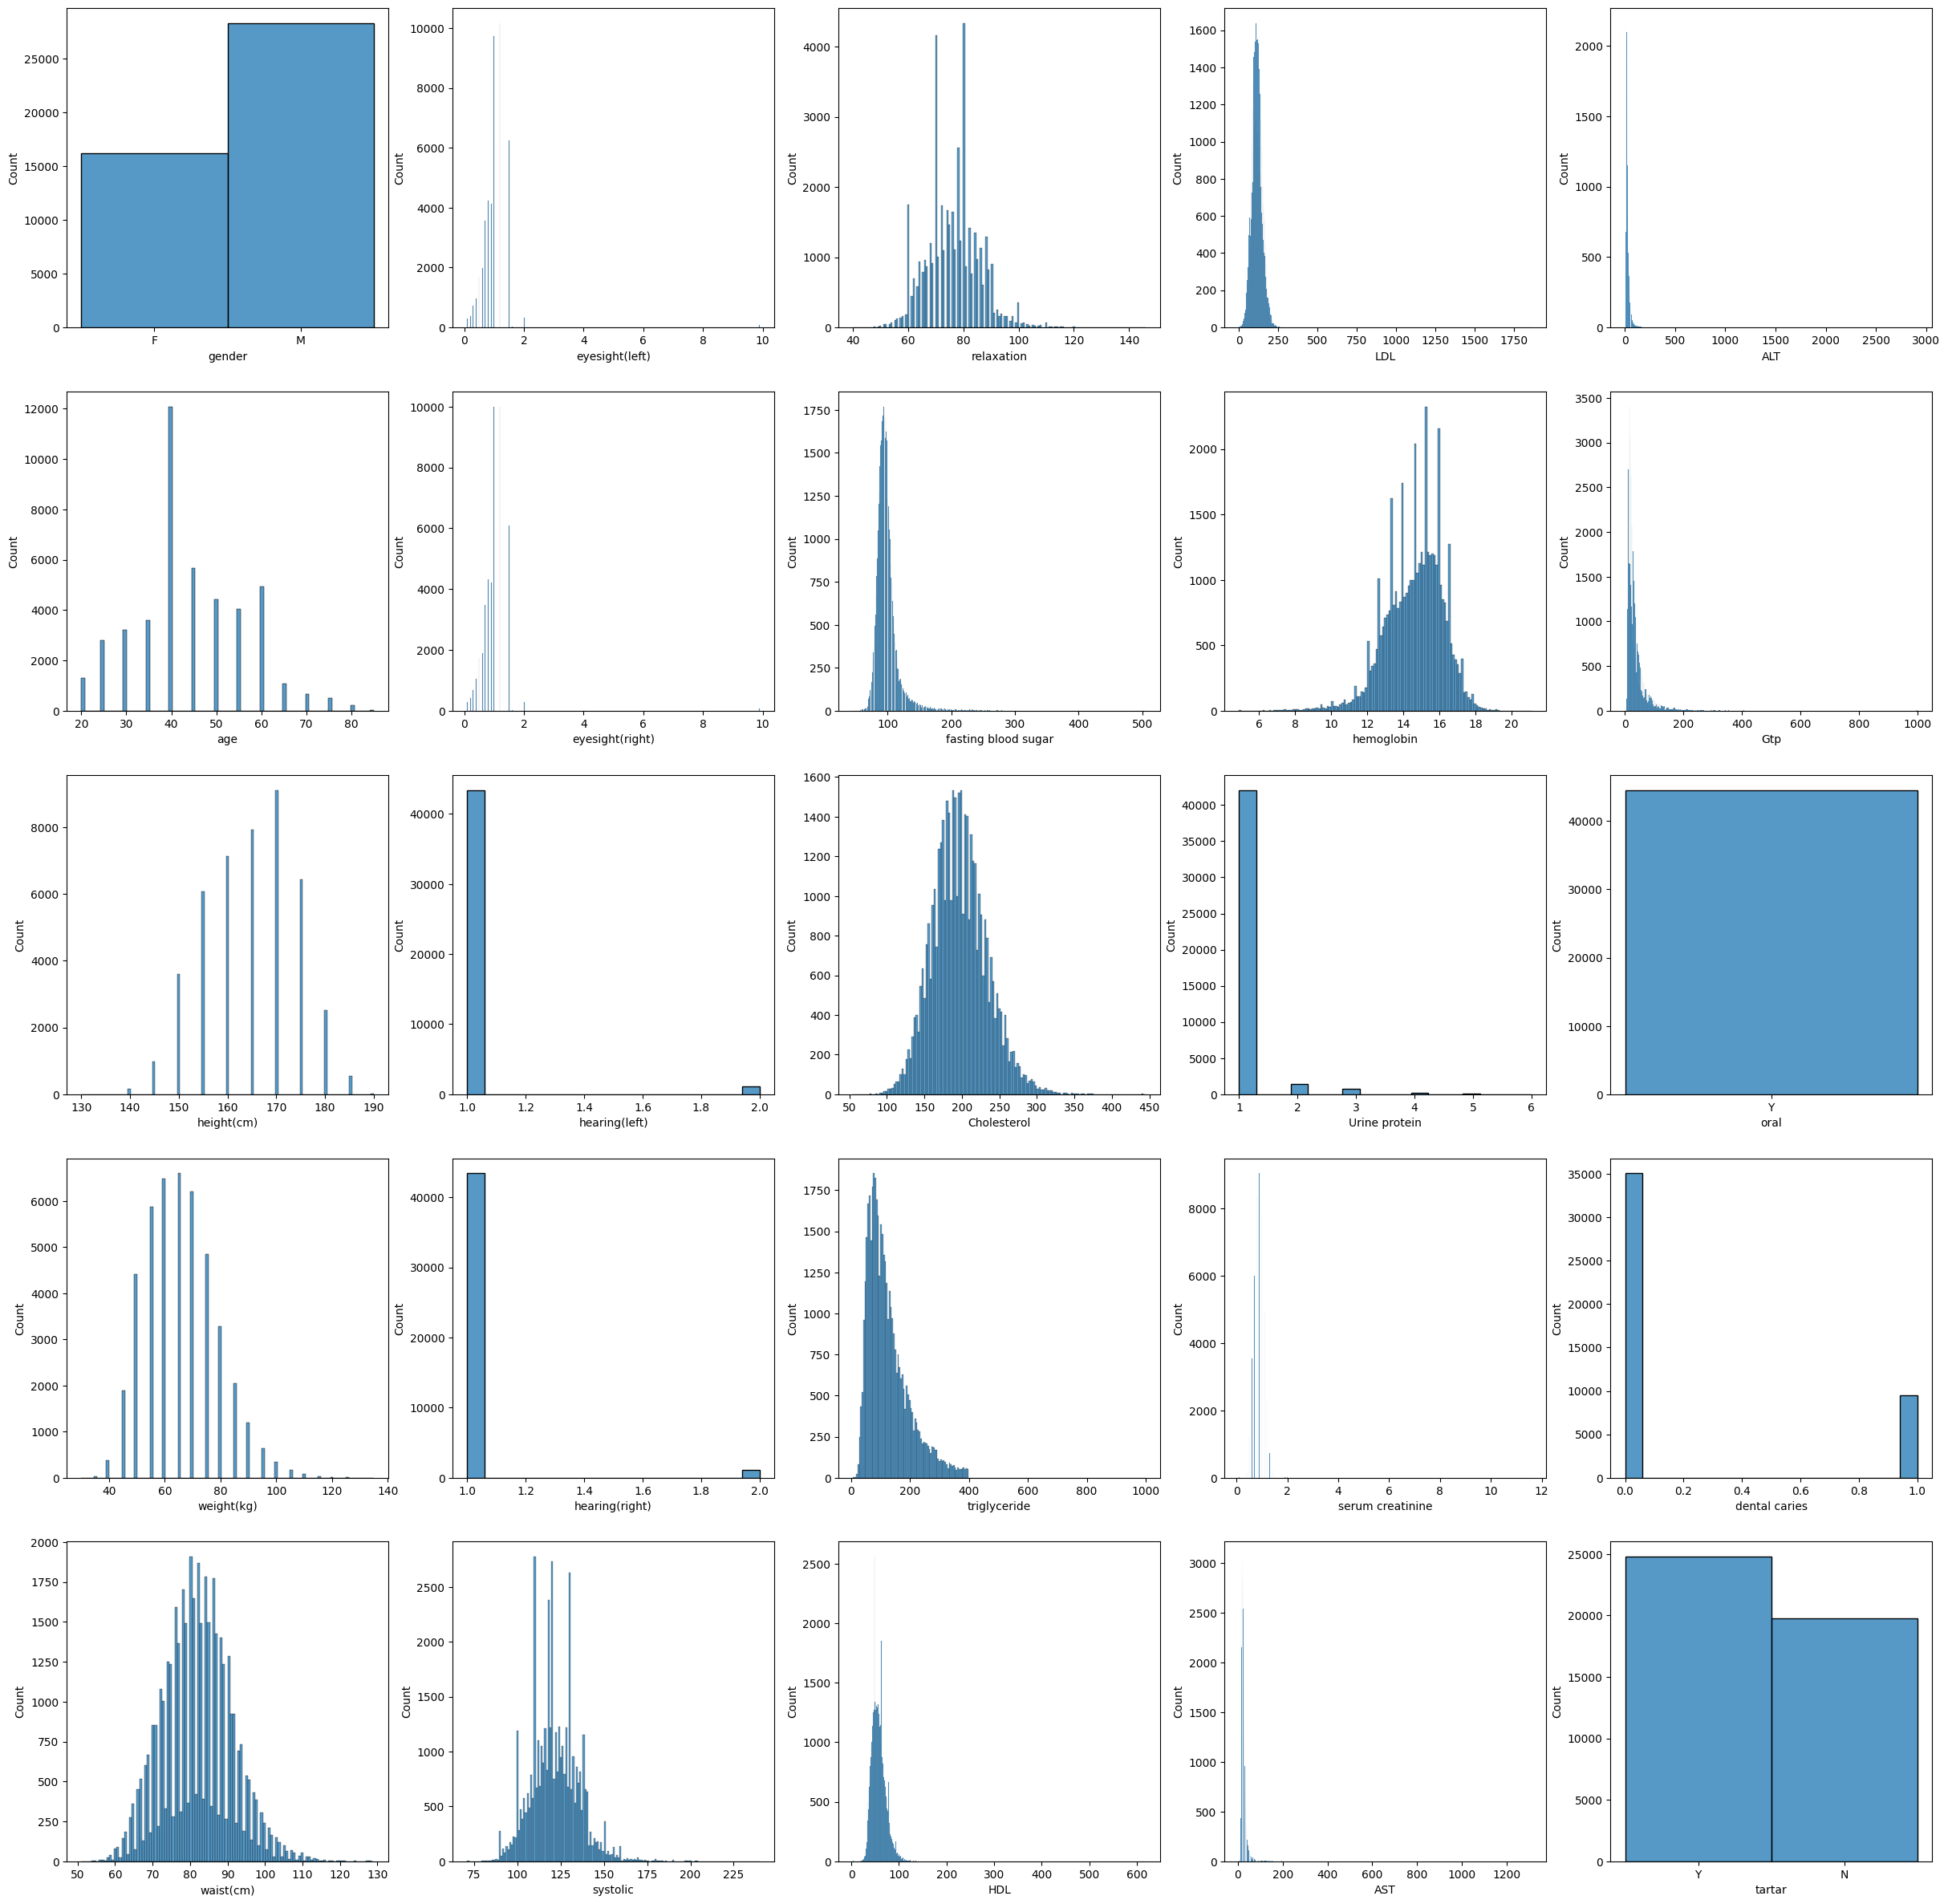

In [ ]:
column_names = df_train.columns
fig, axes = plt.subplots(5, 5, figsize=(30, 30))
i = 0
j = 0
for feature in column_names[1:]:
  sns.histplot(ax=axes[i, j], data=df_train, x=feature)
  i+=1
  if i == 5:
    i = 0
    j+=1

### Tratando features inúteis

In [ ]:
for col in df_train.columns:
  print(col)

ID
gender
age
height(cm)
weight(kg)
waist(cm)
eyesight(left)
eyesight(right)
hearing(left)
hearing(right)
systolic
relaxation
fasting blood sugar
Cholesterol
triglyceride
HDL
LDL
hemoglobin
Urine protein
serum creatinine
AST
ALT
Gtp
oral
dental caries
tartar


In [ ]:
# Como pode se observar no histograma, a feature oral só possui um valor, 0, para todos os dados, não trazendo mais informações para os dados, por isso será removida
# ID é removido tambem por não prover nenhuma informação
df_train = df_train.drop(["ID", "oral"], axis=1)
df_test = df_test.drop(["ID", "oral"], axis=1)

Assim, por hora, temos as seguintes features numéricas e categóricas

In [ ]:
num_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp' , 'dental caries']
cat_feat = ['gender', 'tartar']

## Informações Estatísticas:
Estudando as propriedades e relações presentes no conjunto de dados.

### Descrição Inicial

In [ ]:
df_train.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  44553.000000  44553.000000  44553.000000  44553.000000    44553.000000   
mean      44.210603    164.657038     65.883442     82.077247        1.011734   
std       12.089077      9.198571     12.823676      9.278288        0.488131   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     44553.000000    44553.00000    44553.000000  44553.000000   
mean          1.008134        1.02561        1.026036    121.529055   
std           0.488762        0.15797        0.159245     13.688748   
min           0.100000        1.00000        1.000000     71.000000   
25%           0.800000        1.00000        1.000000    112.000000   
50%           1.000000        1.00000        1.000000    120.000000   
75%           1.200000        1.00000        1.000000    130.000000   
max           9.900000        2.00000        2.000000    240.000000   

         relaxation  ...  triglyceride           HDL           LDL  \
count  44553.000000  ...  44553.000000  44553.000000  44553.000000   
mean      76.043454  ...    126.721770     57.288421    115.037663   
std        9.695288  ...     71.611991     14.795235     40.937878   
min       40.000000  ...      8.000000      4.000000      1.000000   
25%       70.000000  ...     74.000000     47.000000     92.000000   
50%       76.000000  ...    108.000000     55.000000    113.000000   
75%       82.000000  ...    160.000000     66.000000    136.000000   
max      146.000000  ...    999.000000    618.000000   1860.000000   

         hemoglobin  Urine protein  serum creatinine           AST  \
count  44553.000000   44553.000000      44553.000000  44553.000000   
mean      14.622194       1.087020          0.886097     26.213678   
std        1.564872       0.404944          0.226092     19.087106   
min        4.900000       1.000000          0.100000      6.000000   
25%       13.600000       1.000000          0.800000     19.000000   
50%       14.800000       1.000000          0.900000     23.000000   
75%       15.700000       1.000000          1.000000     29.000000   
max       21.100000       6.000000         11.600000   1311.000000   

                ALT           Gtp  dental caries  
count  44553.000000  44553.000000   44553.000000  
mean      27.084731     40.065517       0.213521  
std       31.754805     50.723521       0.409797  
min        1.000000      1.000000       0.000000  
25%       15.000000     17.000000       0.000000  
50%       21.000000     26.000000       0.000000  
75%       31.000000     44.000000       0.000000  
max     2914.000000    999.000000       1.000000  

[8 rows x 22 columns]

### Estudo de Correlação

Inicialmente, podemos plotar uma matriz de correlação nos dados de treino para explorar a amplitude das correlações lineares (Correlação de Pearson) e alguns destaques mais explícitos.

<ipython-input-15-b0c0cd0d5d67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


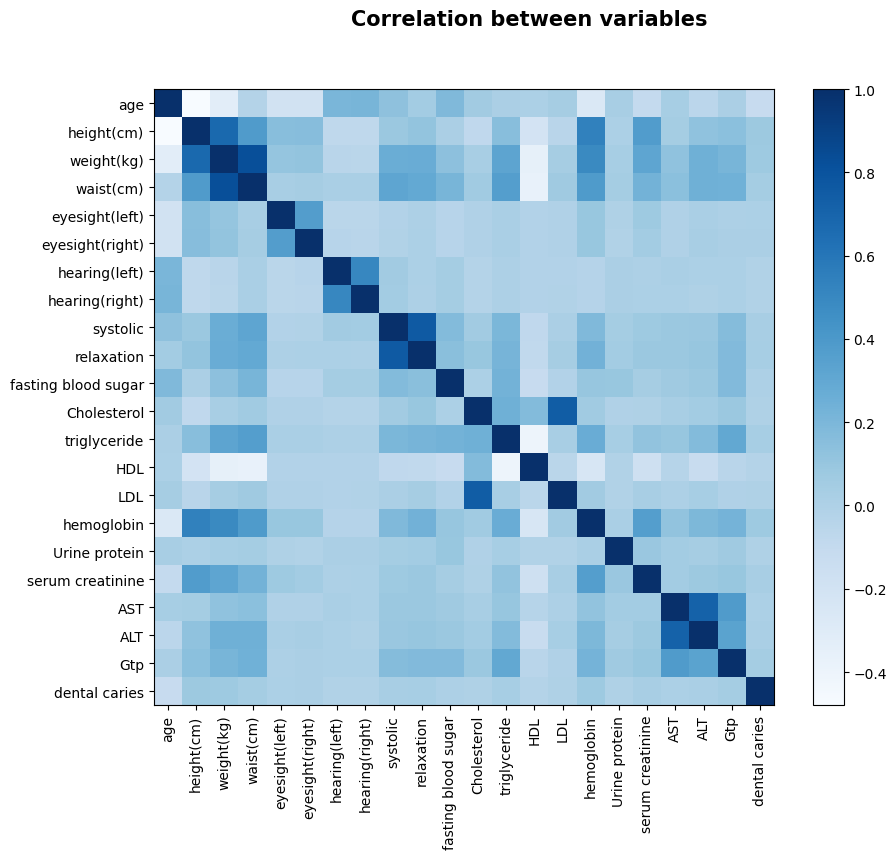

In [ ]:
corr = df_train.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')

plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Podemos concluir que não existem correlações negativas tão impactantes.
A olho nú, destaca-se que dados relacionados a medidas corporais - tamanho, peso e cintura - têm uma correlação positiva. E também como algumas medidas biológicas se relacionam ao fenômeno acima - (HDL, triglycerides.
Existem também algumas correlações entre dados biológicos que podem ser significativas, como dados de escuta, dados de visão, AST e ALT, LDL e Cholesterol.

Para verificar nossas hipóteses, vamos estudar as maiores correlações de Pearson e também de Spearman para verificar se essas proposições.

Selecionando maiores correlações de Pearson

In [ ]:
p_corr = corr
top_p_correlations = p_corr.unstack().sort_values(ascending=False).drop_duplicates()[1:8]

top_p_correlation_df = pd.DataFrame(top_p_correlations, columns=['Correlation'])
top_p_correlation_df.reset_index(inplace=True)
top_p_correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

Selecionando maiores correlações de Spearman

In [ ]:
s_corr = df_train.corr(method='spearman')
top_s_correlations = s_corr.unstack().sort_values(ascending=False).drop_duplicates()[1:8]

top_s_correlation_df = pd.DataFrame(top_s_correlations, columns=['Correlation'])
top_s_correlation_df.reset_index(inplace=True)
top_s_correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

<ipython-input-17-462c8a035d91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s_corr = df_train.corr(method='spearman')


Plotando ambas em comparação

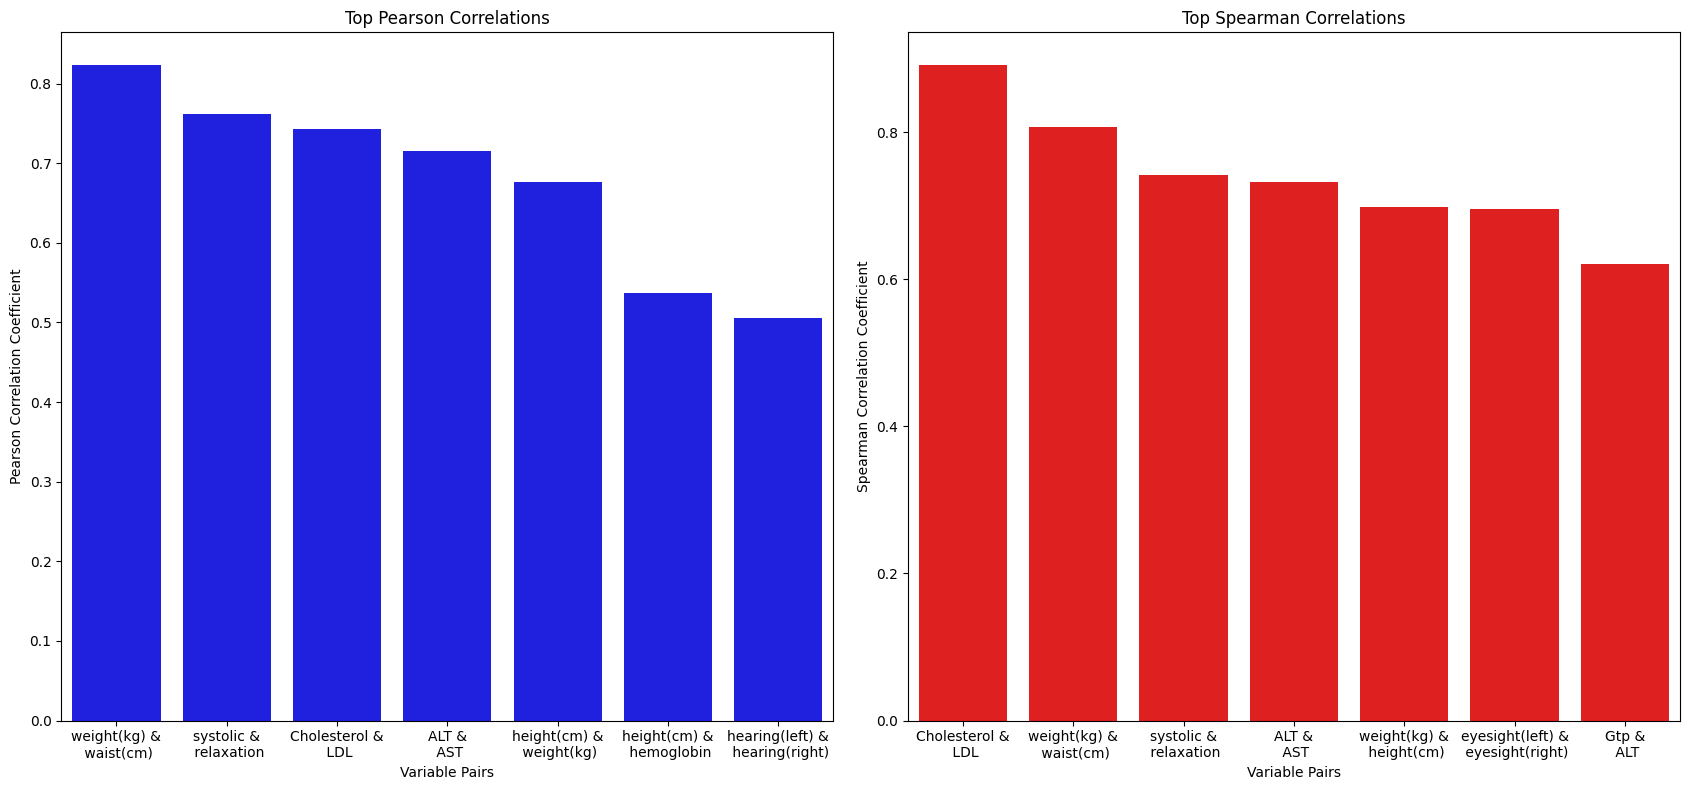

In [ ]:
plt.figure(figsize=(17, 8))
plt.subplot(1, 2, 1)  # 1 i, 2 j, pos 1
sns.barplot(x=top_p_correlation_df['Variable 1'] + ' &\n ' + top_p_correlation_df['Variable 2'],
            y=top_p_correlation_df['Correlation'], color='blue')
plt.title('Top Pearson Correlations')
plt.xlabel('Variable Pairs')
plt.ylabel('Pearson Correlation Coefficient')


plt.subplot(1, 2, 2)  # 1 i, 2 j, pos 2
sns.barplot(x=top_s_correlation_df['Variable 1'] + ' &\n ' + top_s_correlation_df['Variable 2'],
            y=top_s_correlation_df['Correlation'], color='red')
plt.title('Top Spearman Correlations')
plt.xlabel('Variable Pairs')
plt.ylabel('Spearman Correlation Coefficient')

plt.tight_layout()
plt.show()

Como podemos ver, algumas hipóteses se confirmam de fato em ambas as correlações, para valores significativos:
* waist, weight e height
* relaxation e systolic
* LDL e Cholesterol
* AST e ALT

Além disso, existe uma correlação de Pearson - que indica linearidade - entre as escutas, enquanto existe uma correlação de Spearman  - que pode indicar correlação não linear - entre as vistas.

Ainda chama-se atenção para a correlação de Spearman entre Gpt e ALT.
Logo, o que podemos fazer é analisar a distribuição entre Gpt e ALT para verificar como essa relação está se demonstrando.

In [ ]:
p_gpt_alt = p_corr["Gtp"]["ALT"]
s_gpt_alt = s_corr["Gtp"]["ALT"]

print(p_gpt_alt)
print(s_gpt_alt)

0.33249185939260884
0.6208807934811961


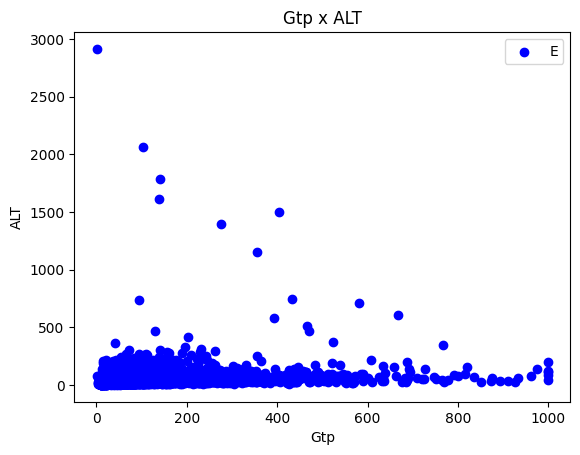

In [ ]:
plt.scatter(df_train['Gtp'], df_train['ALT'], marker='o', color='b', label='Points in (Gtp, ALT)')

plt.xlabel('Gtp')
plt.ylabel('ALT')
plt.title('Gtp x ALT')

# Adicionando uma legenda
plt.legend("Estudo dos pontos no plano formado pelo produto cartesiano das features, para estudar correlação")

# Exibindo o gráfico
plt.show()

Como podemos ver, ainda não podemos concluir muita coisa. Enquanto a correlação de Spearman nos dá sinal de algo, a de Spearman - junto ao gráfico - não nos revela algo positivo.
Conhecendo a distribuição dessas features: concentrada e exponencial, um estudo possível seria utilizar uma transformação para um melhor estudo das correlações.

Utilizemos um mapeamento dos dados aplicando a função logarítimica na tentativa de linearizar essa correlação, verificando se o coeficiente de Pearson acompanhará o de Spearman.

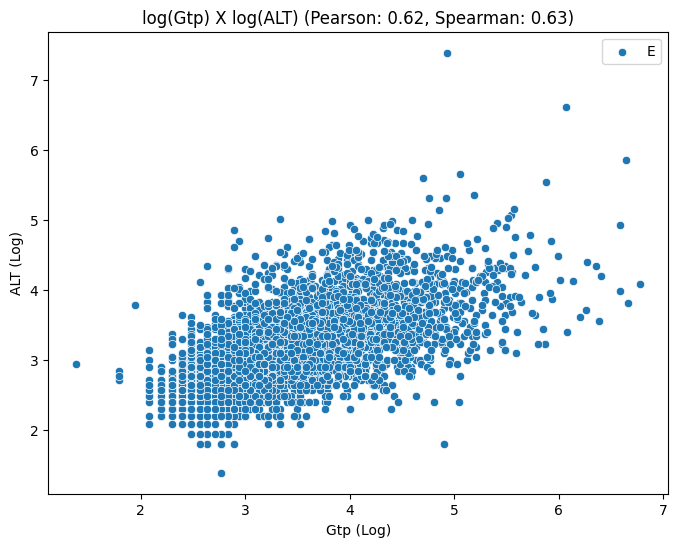

0.619390958842521  (Pearson)
0.6280717068995223  (Spearman)


In [ ]:
df_testecorr = pd.DataFrame()

# Fazendo a transformação para log
df_testecorr['Gtp'] = np.log1p(df_train['Gtp'].sample(n=5000, replace=False, random_state=42))
df_testecorr['ALT'] = np.log1p(df_train['ALT'].sample(n=5000, replace=False, random_state=42))

# Calculando a correlação entre as variáveis transformadas
correlacao_p = df_testecorr[['Gtp', 'ALT']].corr().iloc[0, 1]
correlacao_s = df_testecorr[['Gtp', 'ALT']].corr(method='spearman').iloc[0, 1]

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gtp', y='ALT', data=df_testecorr)
plt.title(f'log(Gtp) X log(ALT) (Pearson: {correlacao_p:.2f}, Spearman: {correlacao_s:.2f})')
plt.legend("Estudo dos pontos no plano formado pelo produto cartesiano das features, para estudar correlação, sobre a aplicação da transformação.")
plt.xlabel('Gtp (Log)')
plt.ylabel('ALT (Log)')
plt.show()
print(correlacao_p, " (Pearson)")
print(correlacao_s, " (Spearman)")

Como vês, transformação ajudou a evidenciar a correlação que antes tinha sido revelado somente pela de spearman. Levando ambos os coeficientes ao valor de, aproximadamente, 0,62.
Logo, Conclui-se que ALT e Gtp possuem uma correlação não linear entre si.
Vamos ver agora em relação à transformação box-cox

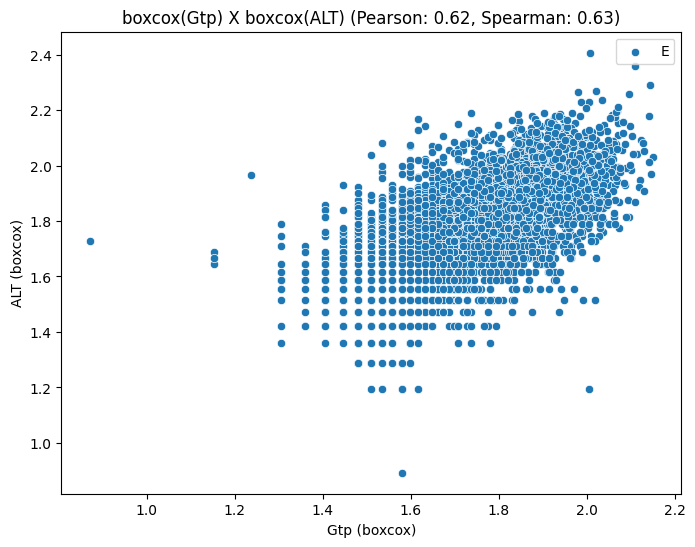

0.6192211461675513  (Pearson)
0.6280717068995223  (Spearman)


In [ ]:
from scipy.stats import boxcox
df_testecorr = pd.DataFrame()

df_testecorr['Gtp'], _ = boxcox(df_train['Gtp'].sample(n=5000, replace=False, random_state=42))
df_testecorr['ALT'], _ = boxcox(df_train['ALT'].sample(n=5000, replace=False, random_state=42))


# Calculando a correlação entre as variáveis transformadas
correlacao_p = df_testecorr[['Gtp', 'ALT']].corr().iloc[0, 1]
correlacao_s = df_testecorr[['Gtp', 'ALT']].corr(method='spearman').iloc[0, 1]

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gtp', y='ALT', data=df_testecorr)
plt.title(f'boxcox(Gtp) X boxcox(ALT) (Pearson: {correlacao_p:.2f}, Spearman: {correlacao_s:.2f})')
plt.legend("Estudo dos pontos no plano formado pelo produto cartesiano das features, para estudar correlação, sobre a aplicação da transformação.")
plt.xlabel('Gtp (boxcox)')
plt.ylabel('ALT (boxcox)')
plt.show()
print(correlacao_p, " (Pearson)")
print(correlacao_s, " (Spearman)")

Para ambas as transformações, o mesmo se conclui, portanto, no âmbito da correlação, são equivalentes.

Enfim, temos:

* waist, weight e height - correlação linear forte ,
* relaxation e systolic - correlação linear forte ,
* LDL e Cholesterol -  correlação linear forte ,
* AST e ALT - correlação não linear de 0,62 ;



## Visualização da amostra

Para fins analíticos, juntemos as parcelas de treino e teste em um dataset, adicionando uma categoroa 'test'para indicar sua origem.
Faremos isso para estudar as distribuições e se existe algum viés ou anormalidade em cada uma das seções em relação à outra.


In [ ]:
df_trainD = df_train
df_testD = df_test
df_trainD['test'] = 0
df_testD['test'] = 1
df_all = pd.concat([df_trainD, df_testD], ignore_index=True)
df_all

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          F   40         155          60       81.3             1.2   
1          F   40         160          60       81.0             0.8   
2          M   55         170          60       80.0             0.8   
3          M   40         165          70       88.0             1.5   
4          F   40         155          60       86.0             1.0   
...      ...  ...         ...         ...        ...             ...   
55687      F   40         170          65       75.0             0.9   
55688      F   45         160          50       70.0             1.2   
55689      F   55         160          50       68.5             1.0   
55690      M   60         165          60       78.0             0.8   
55691      M   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
0                  1.0            1.0             1.0     114.0  ...  126.0   
1                  0.6            1.0             1.0     119.0  ...  127.0   
2                  0.8            1.0             1.0     138.0  ...  151.0   
3                  1.5            1.0             1.0     100.0  ...  226.0   
4                  1.0            1.0             1.0     120.0  ...  107.0   
...                ...            ...             ...       ...  ...    ...   
55687              0.9            1.0             1.0     110.0  ...  118.0   
55688              1.2            1.0             1.0     101.0  ...   79.0   
55689              1.2            1.0             1.0     117.0  ...   63.0   
55690              1.0            1.0             1.0     133.0  ...  146.0   
55691              0.7            1.0             1.0     124.0  ...  150.0   

       hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0            12.9            1.0               0.7  18.0  19.0  27.0   
1            12.7            1.0               0.6  22.0  19.0  18.0   
2            15.8            1.0               1.0  21.0  16.0  22.0   
3            14.7            1.0               1.0  19.0  26.0  18.0   
4            12.5            1.0               0.6  16.0  14.0  22.0   
...           ...            ...               ...   ...   ...   ...   
55687        12.3            1.0               0.6  14.0   7.0  10.0   
55688        14.0            1.0               0.9  20.0  12.0  14.0   
55689        12.4            1.0               0.5  17.0  11.0  12.0   
55690        14.4            1.0               0.7  20.0  19.0  18.0   
55691        15.0            1.0               0.8  26.0  29.0  41.0   

       dental caries  tartar  test  
0                0.0       Y     0  
1                0.0       Y     0  
2                0.0       N     0  
3                0.0       Y     0  
4                0.0       N     0  
...              ...     ...   ...  
55687            1.0       Y     1  
55688            0.0       Y     1  
55689            0.0       N     1  
55690            0.0       N     1  
55691            0.0       Y     1  

[55692 rows x 25 columns]

In [ ]:
num_featuresD = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp' , 'dental caries']
cat_featD = ['gender', 'tartar', 'test']

Para visualizá-los, vamos justapor um boxplot e as distribuições, sensibilizando-os conforme a origem de cada dado.

Nesse caso, estamos utilizando um boxplot mais conservador quanto aos outleris (Boxplot de Tukey) em que os limites superiores e inferiores consideram o intervalo interquartil multiplicado por 3, não 1,5. Essa decisão nasce em virtude da concentração de dados em algumas das distribuições.

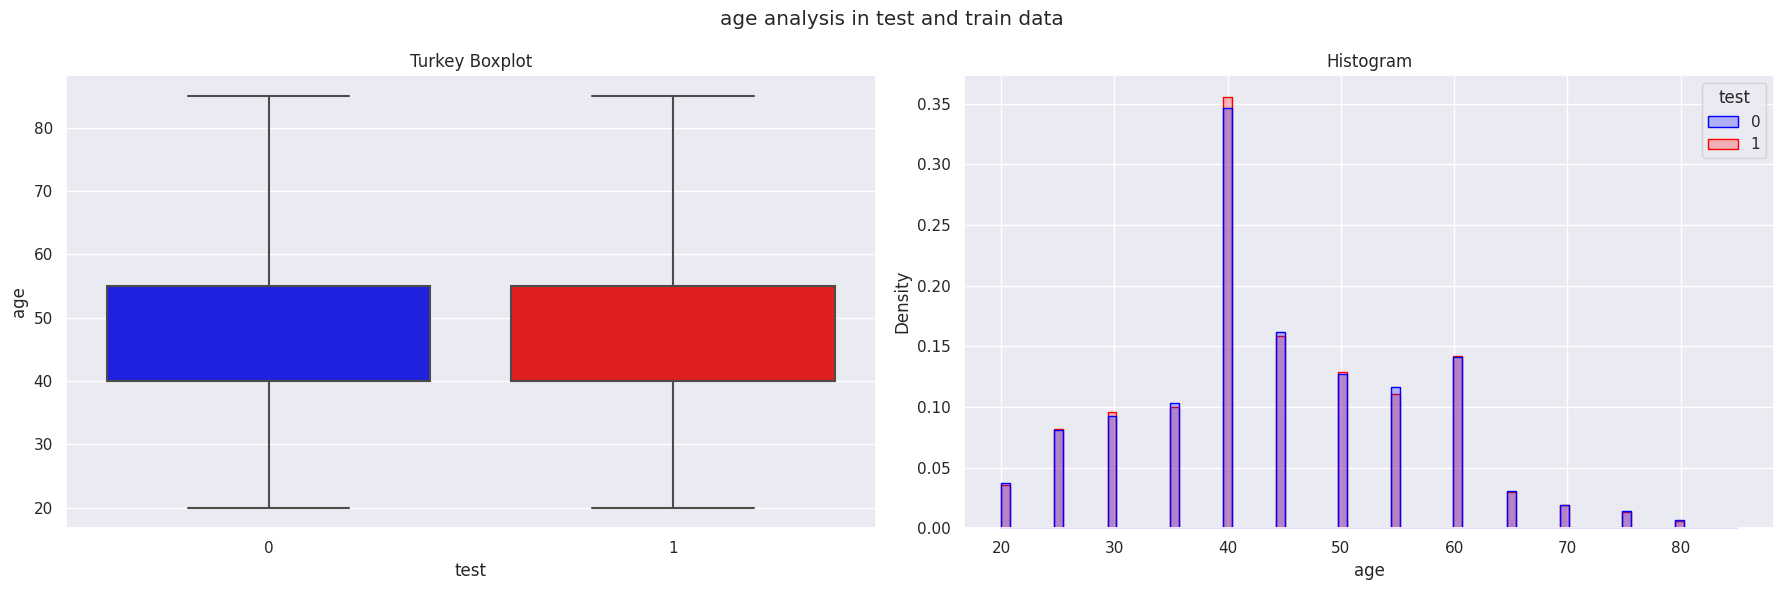

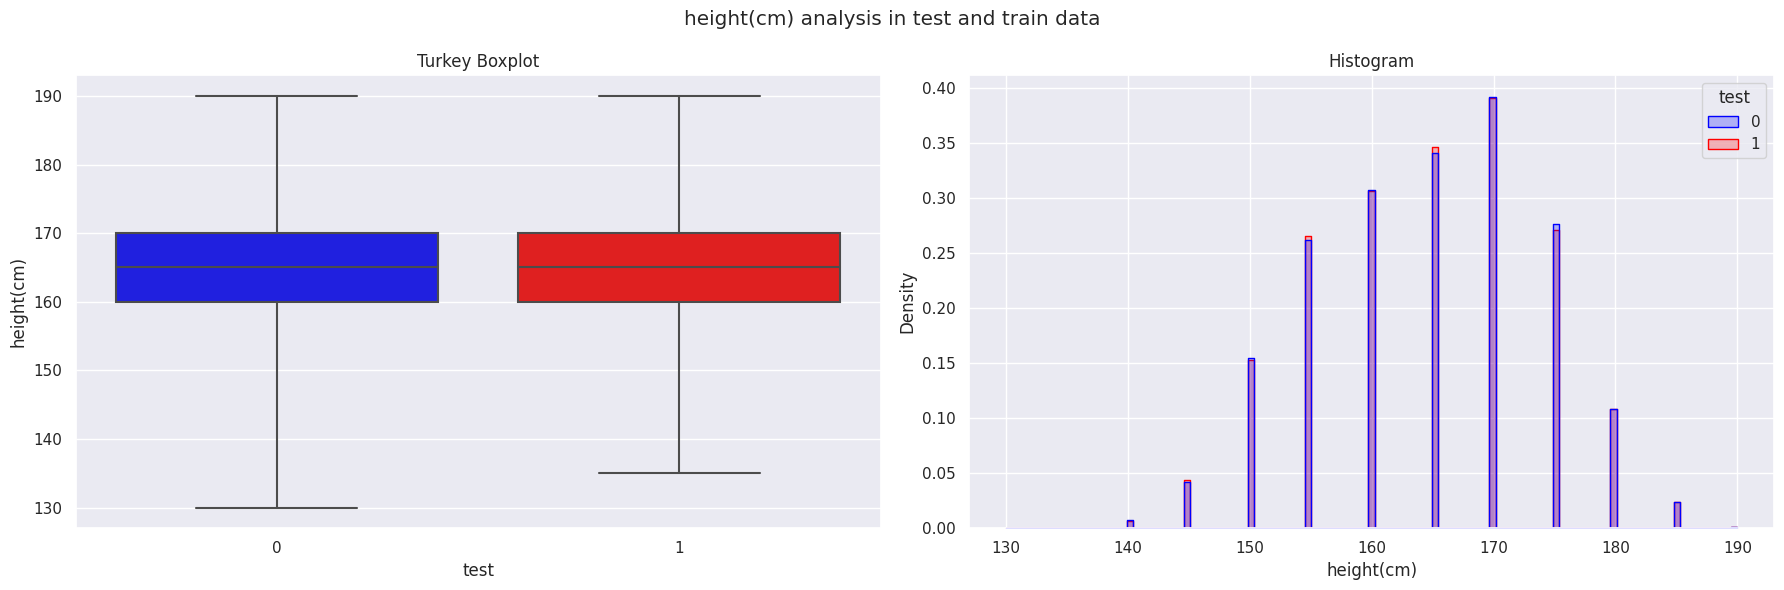

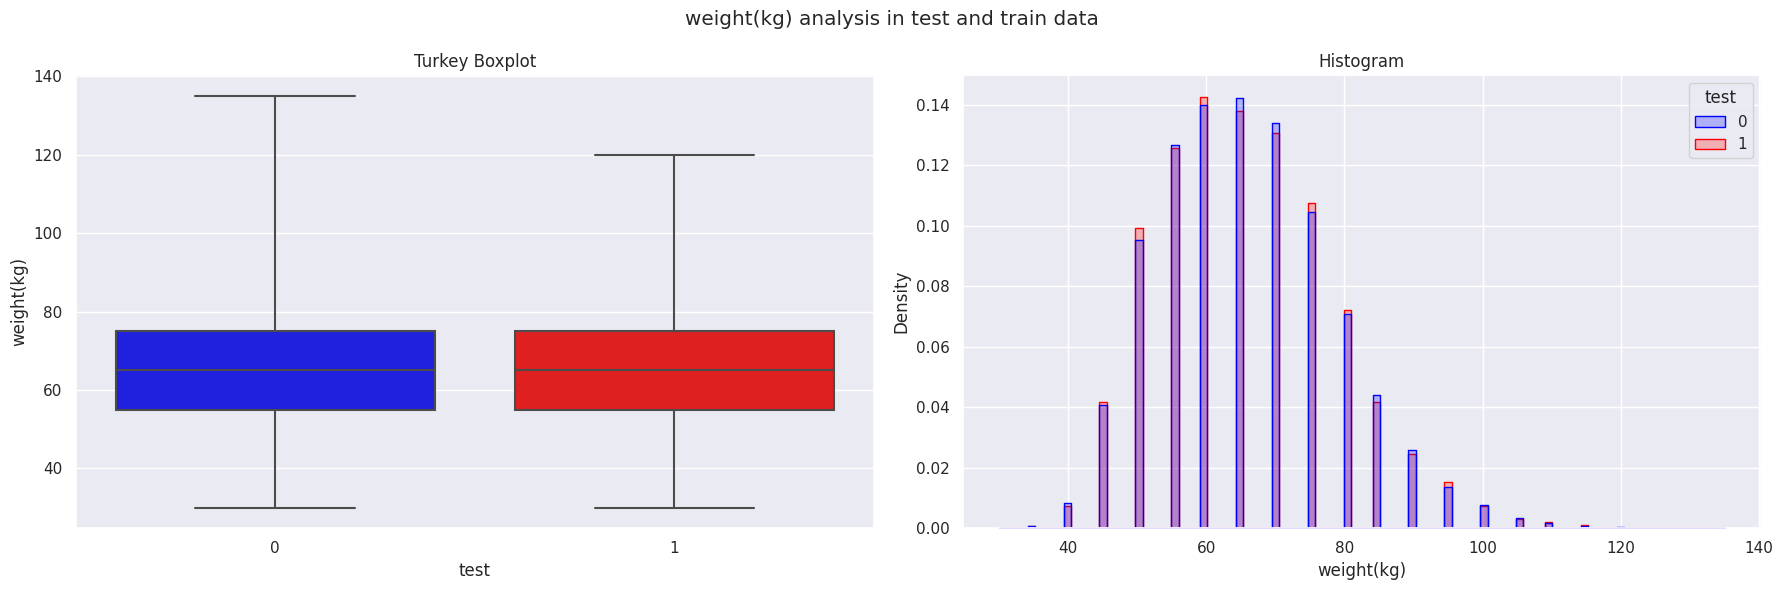

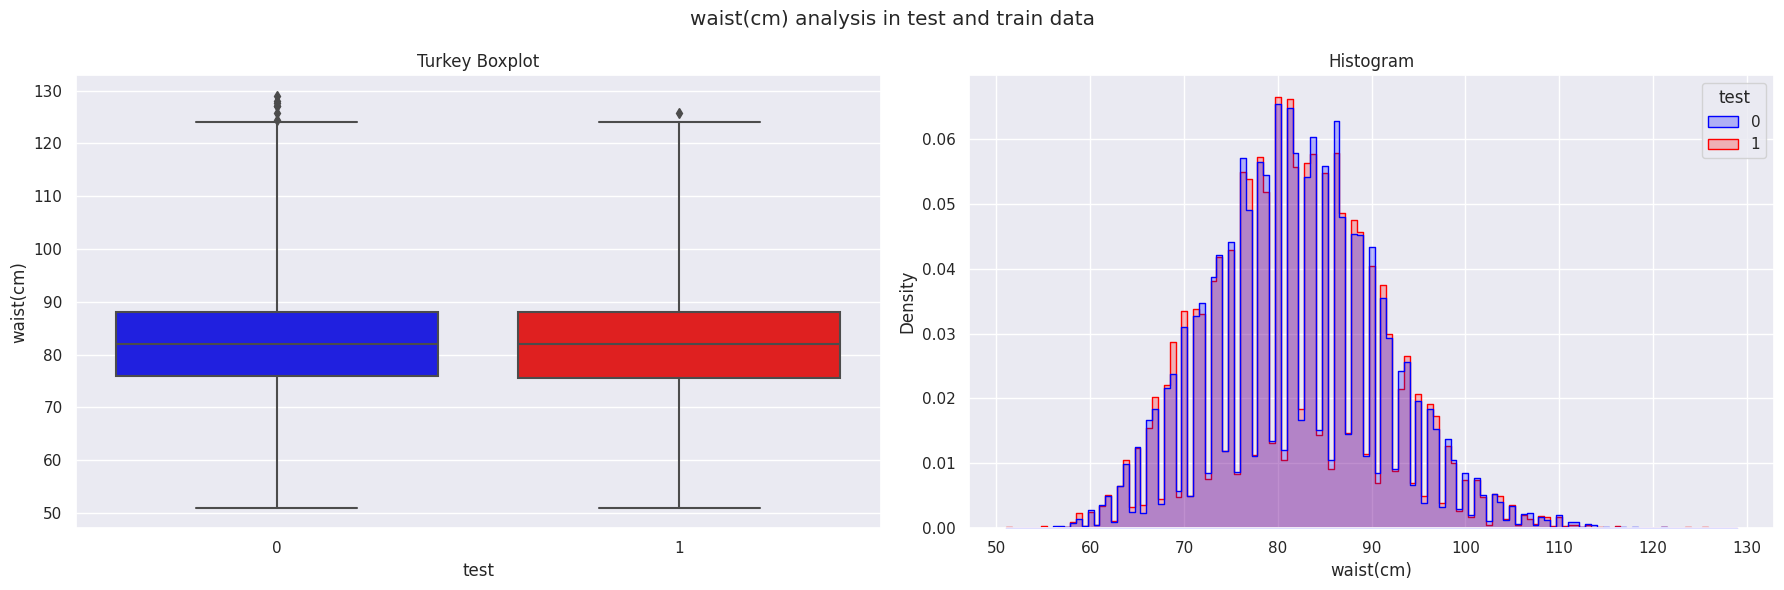

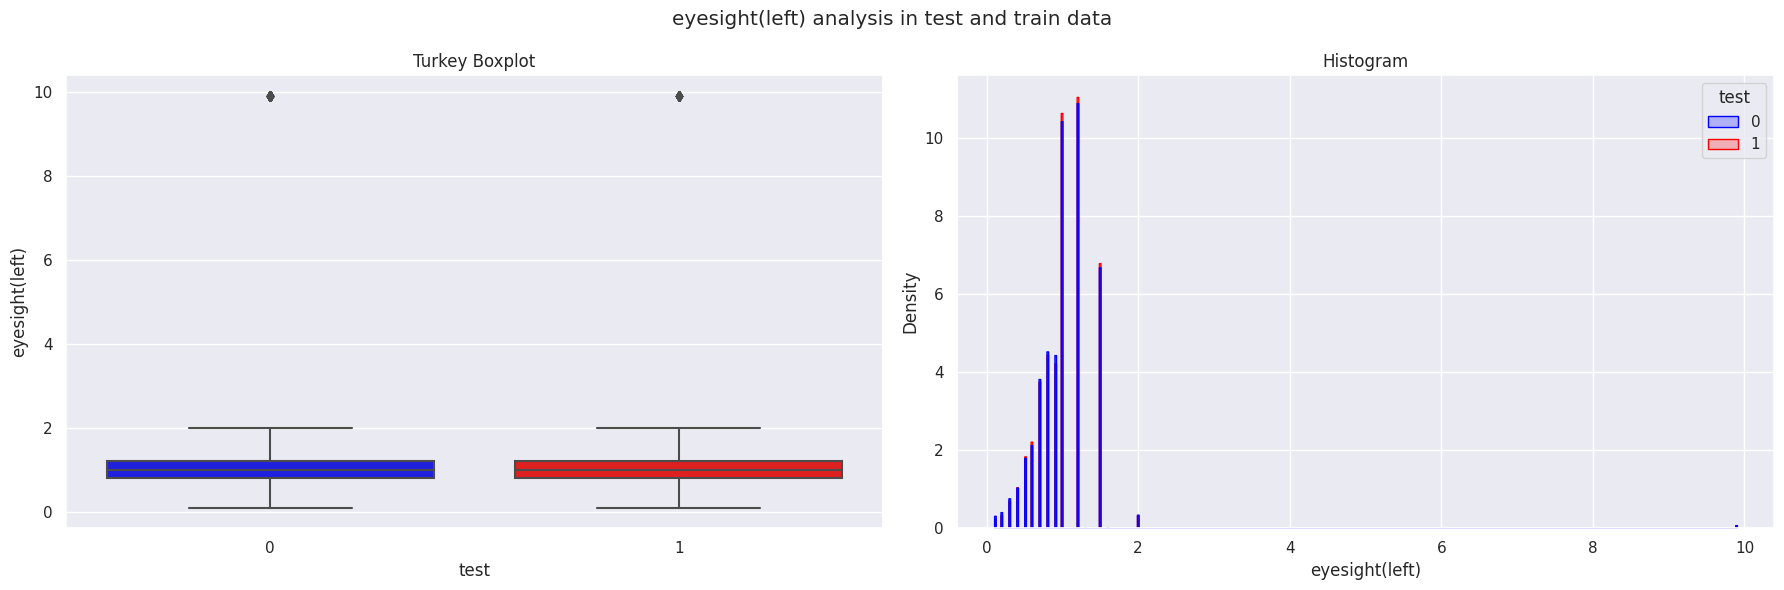

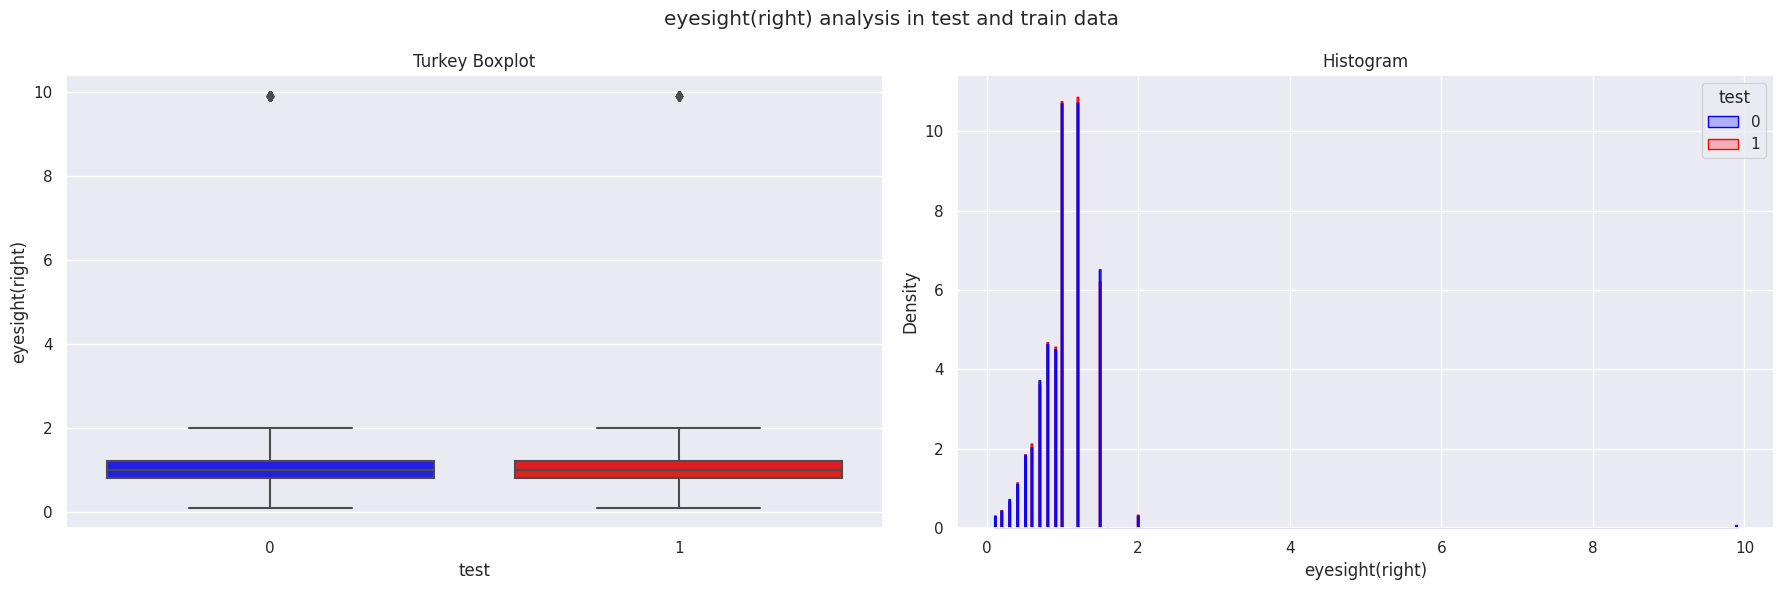

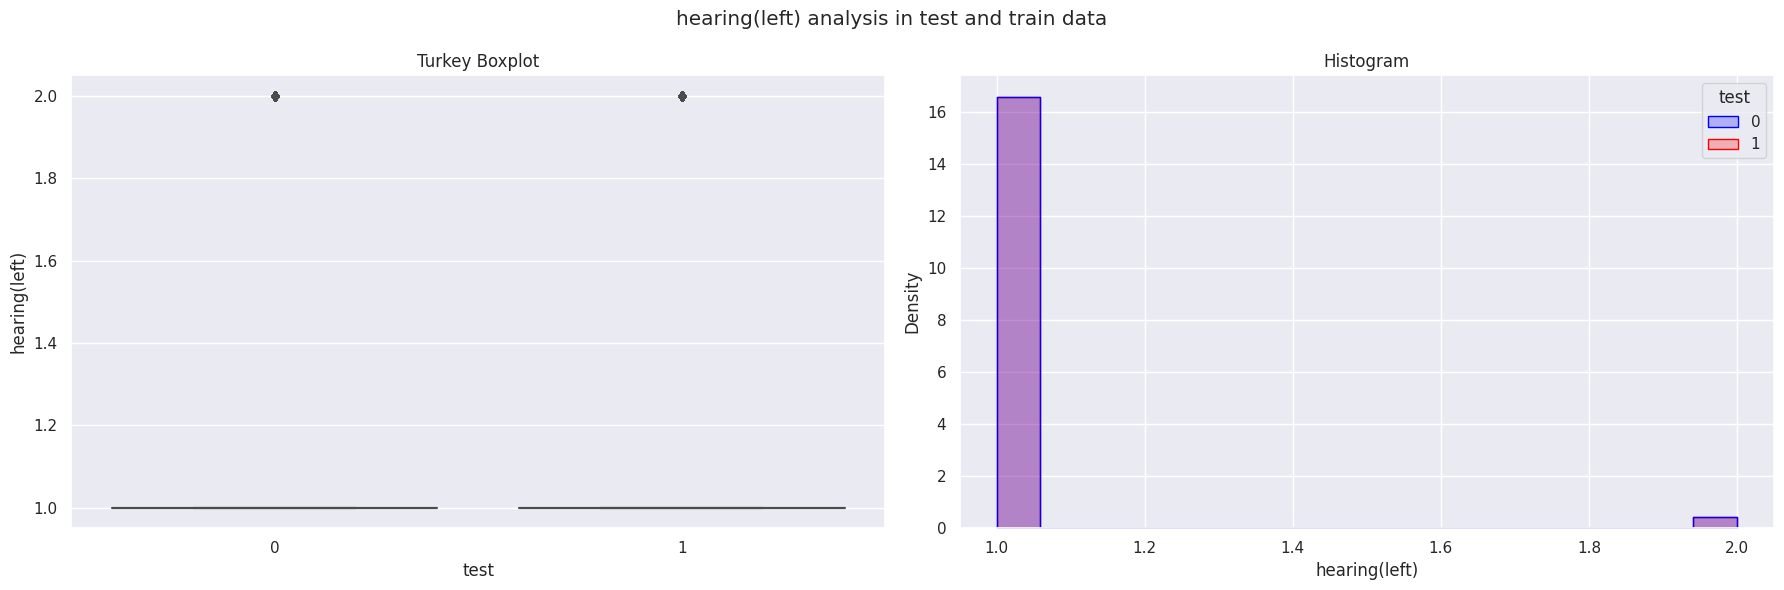

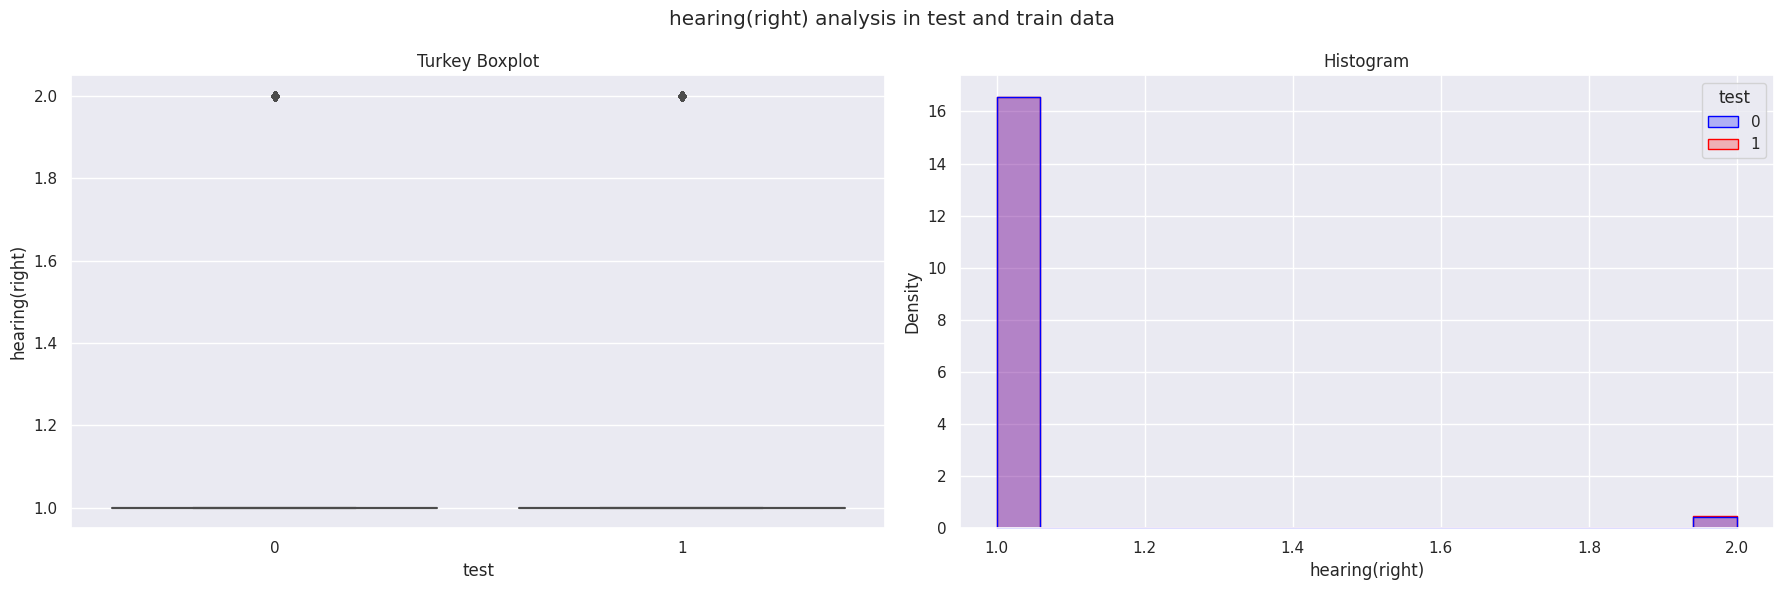

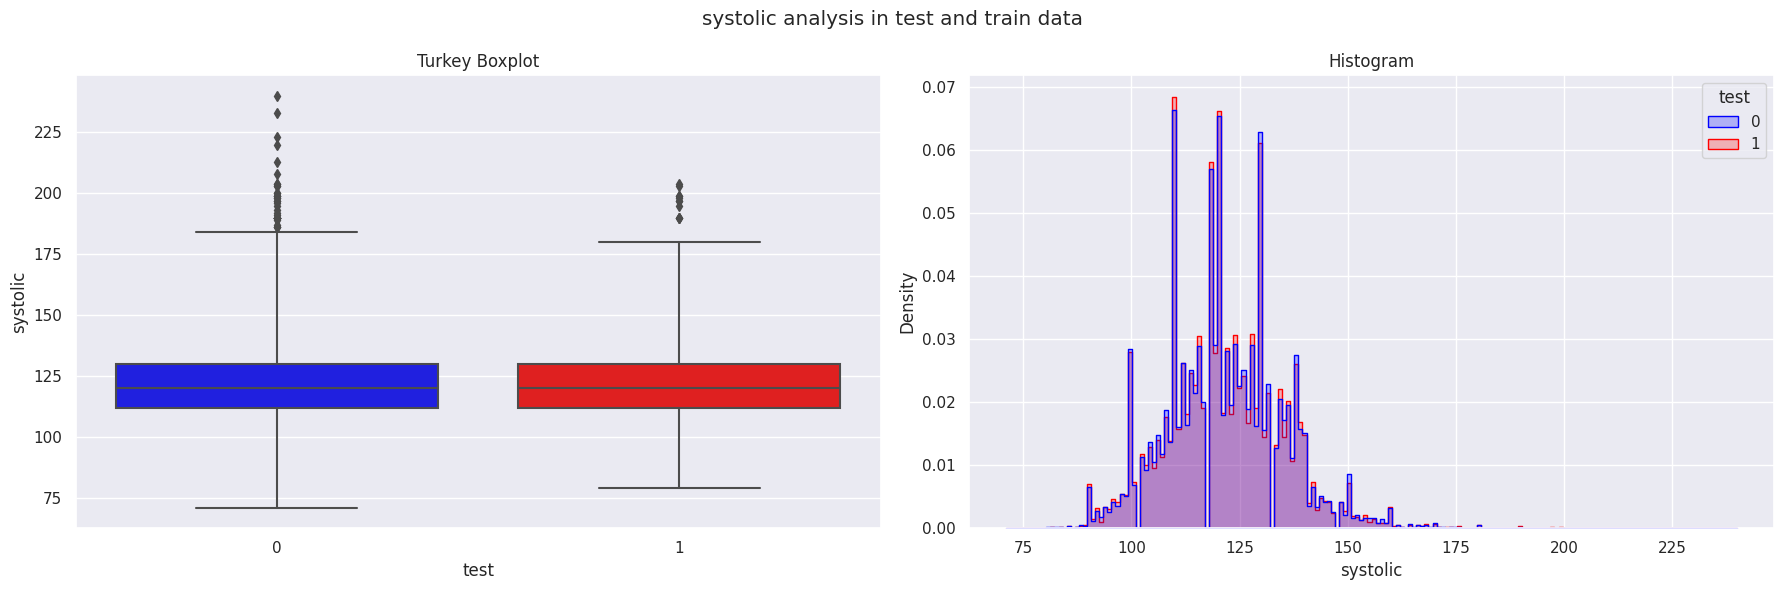

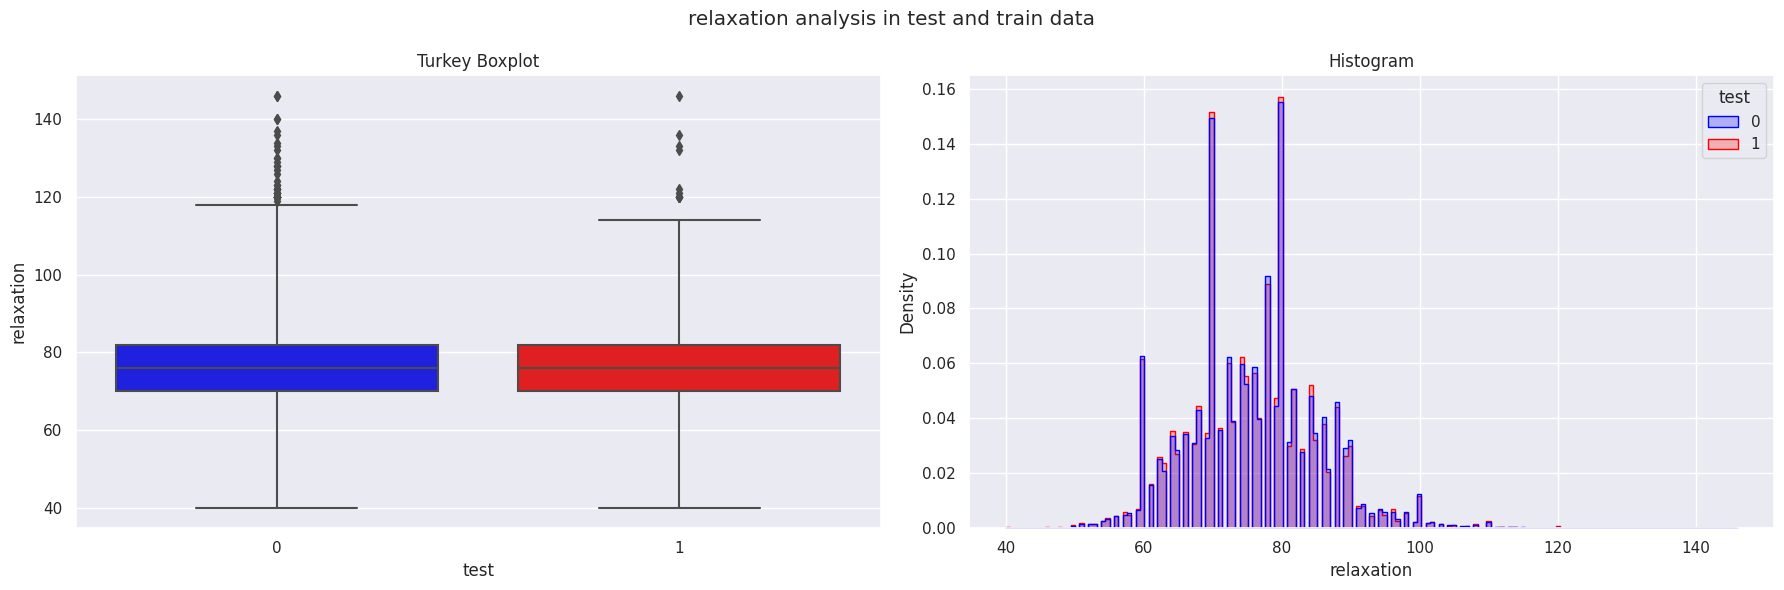

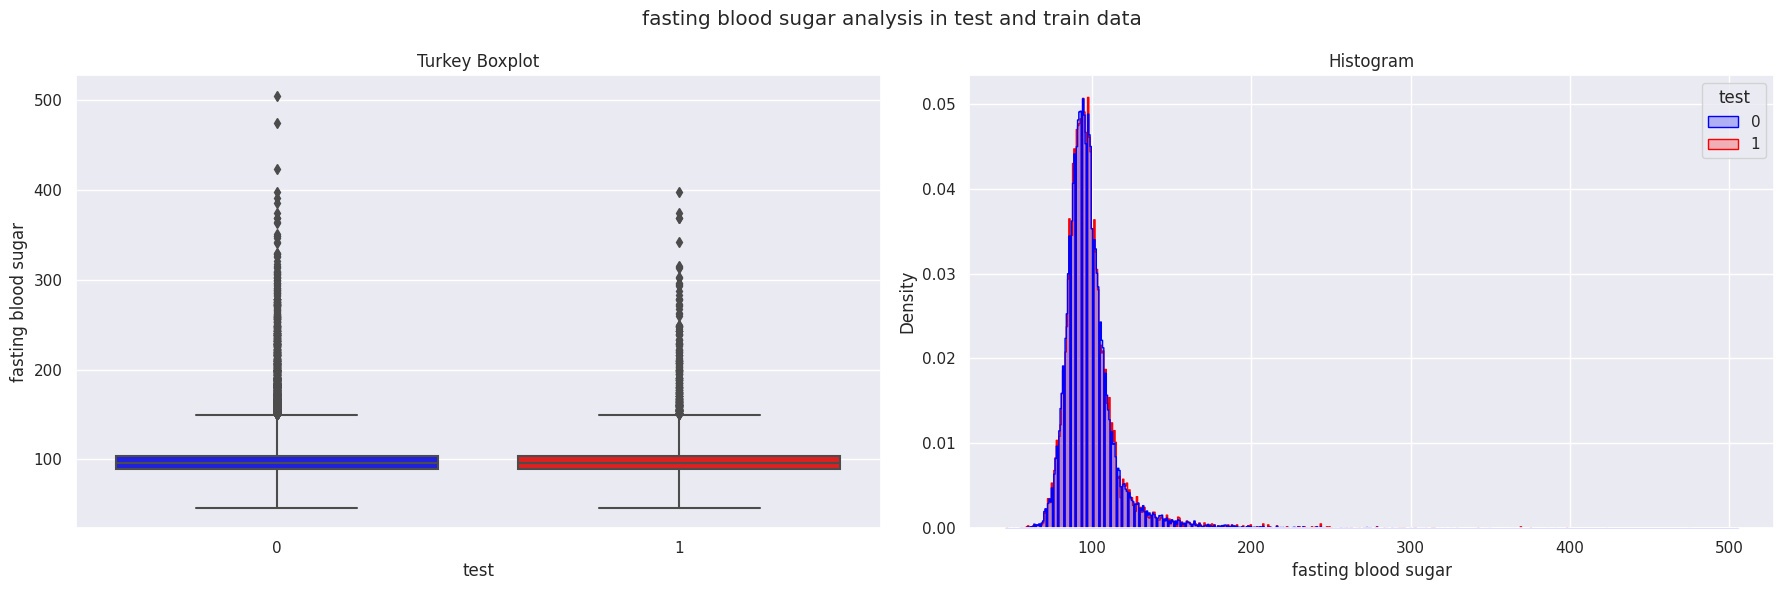

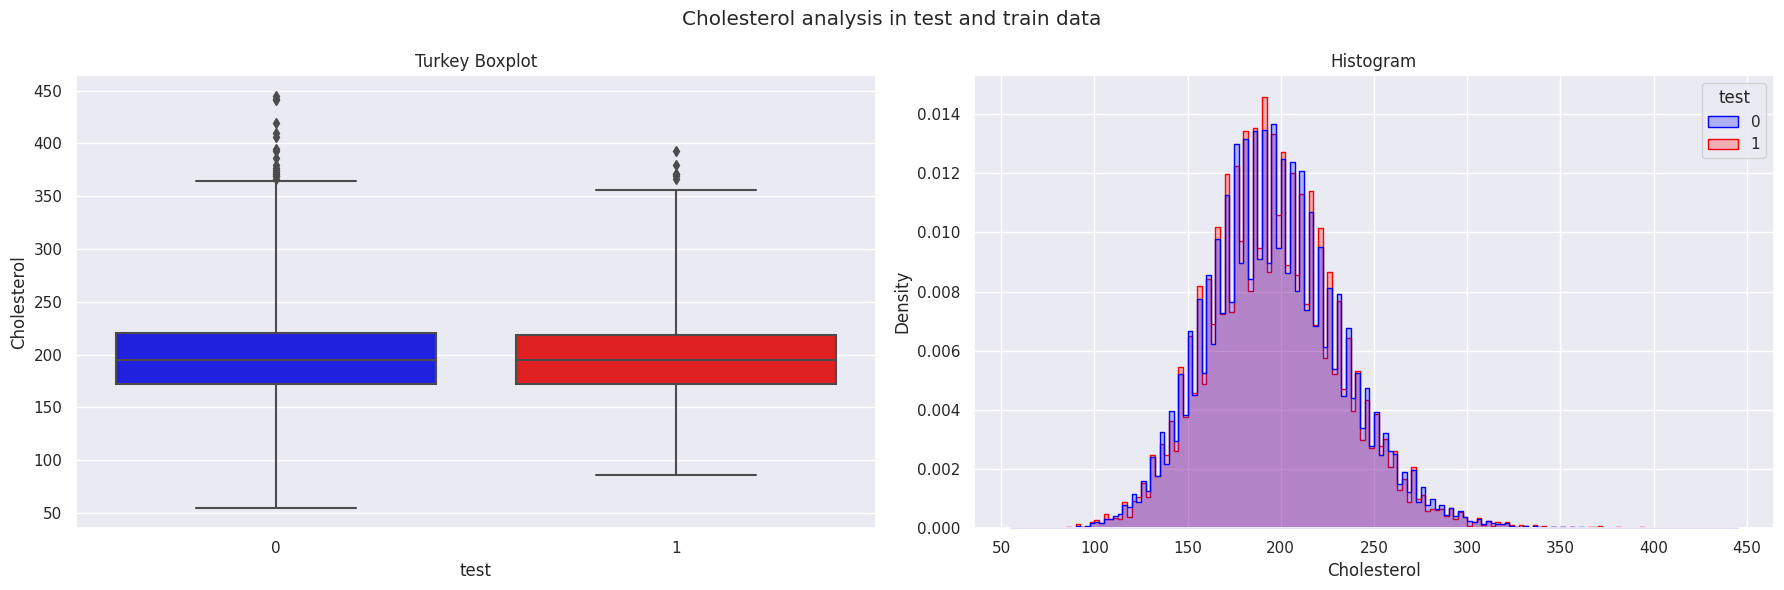

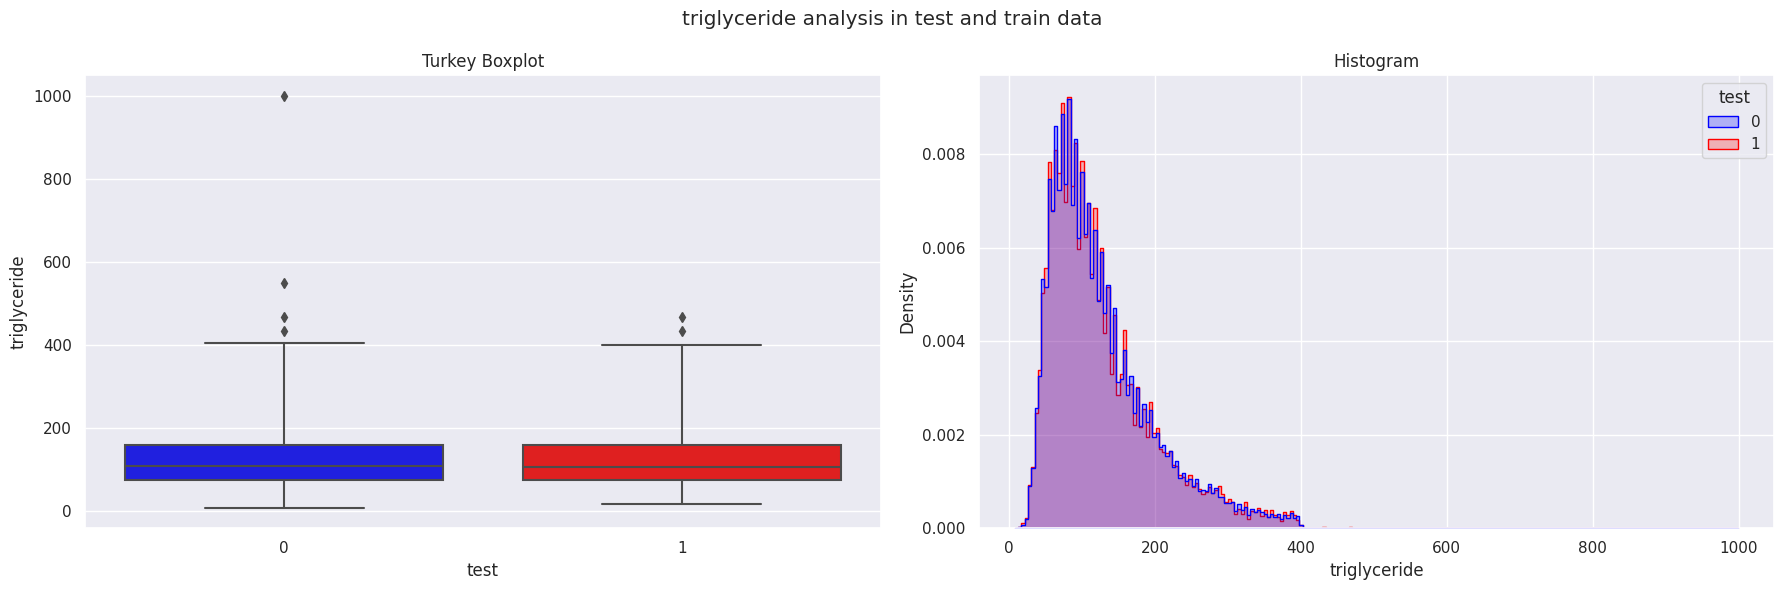

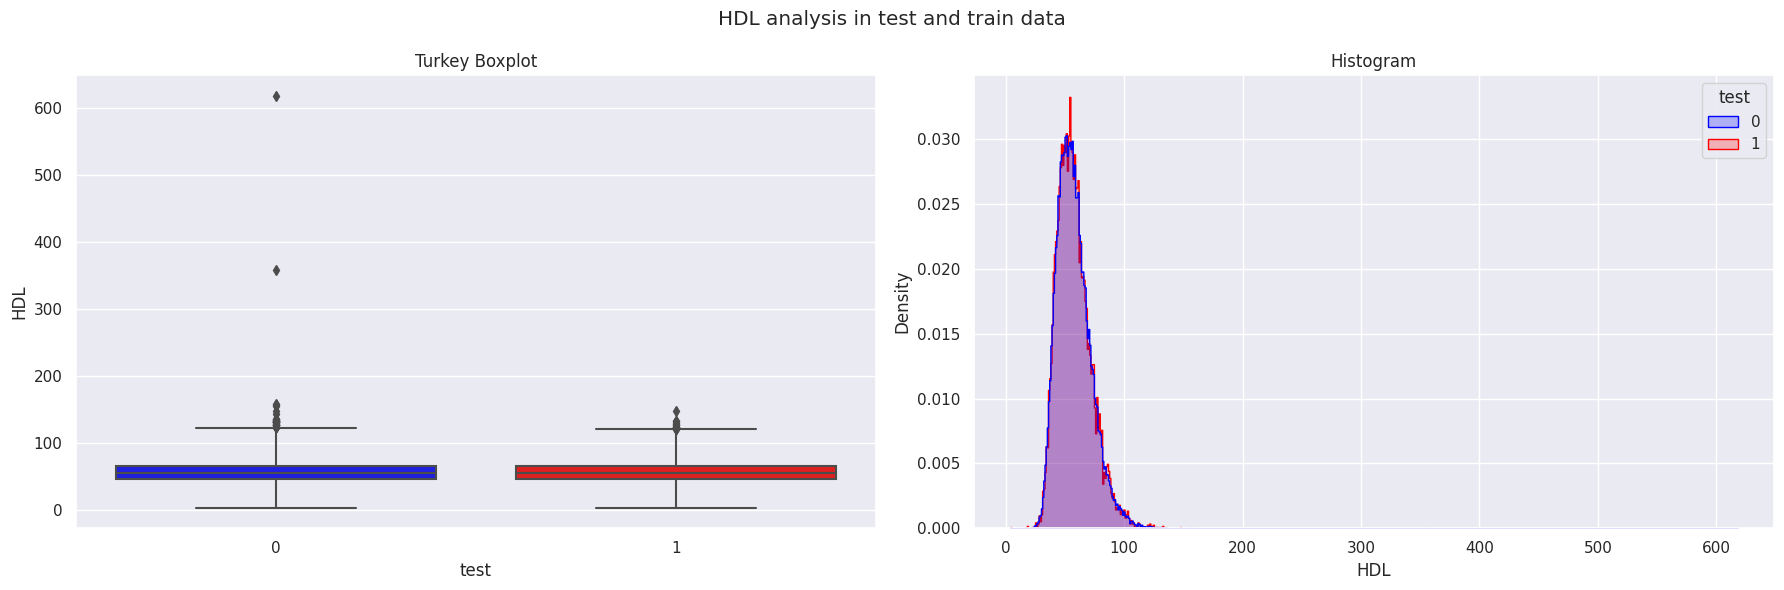

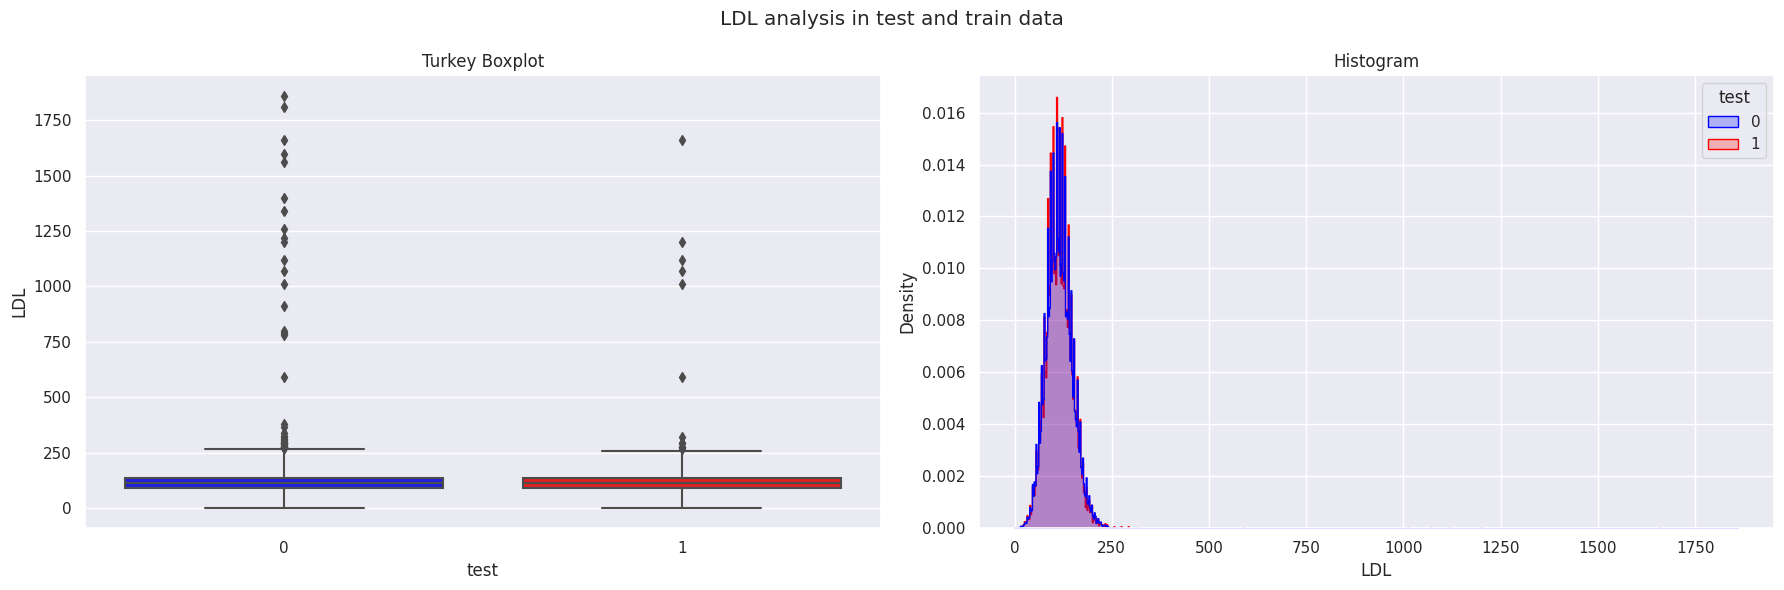

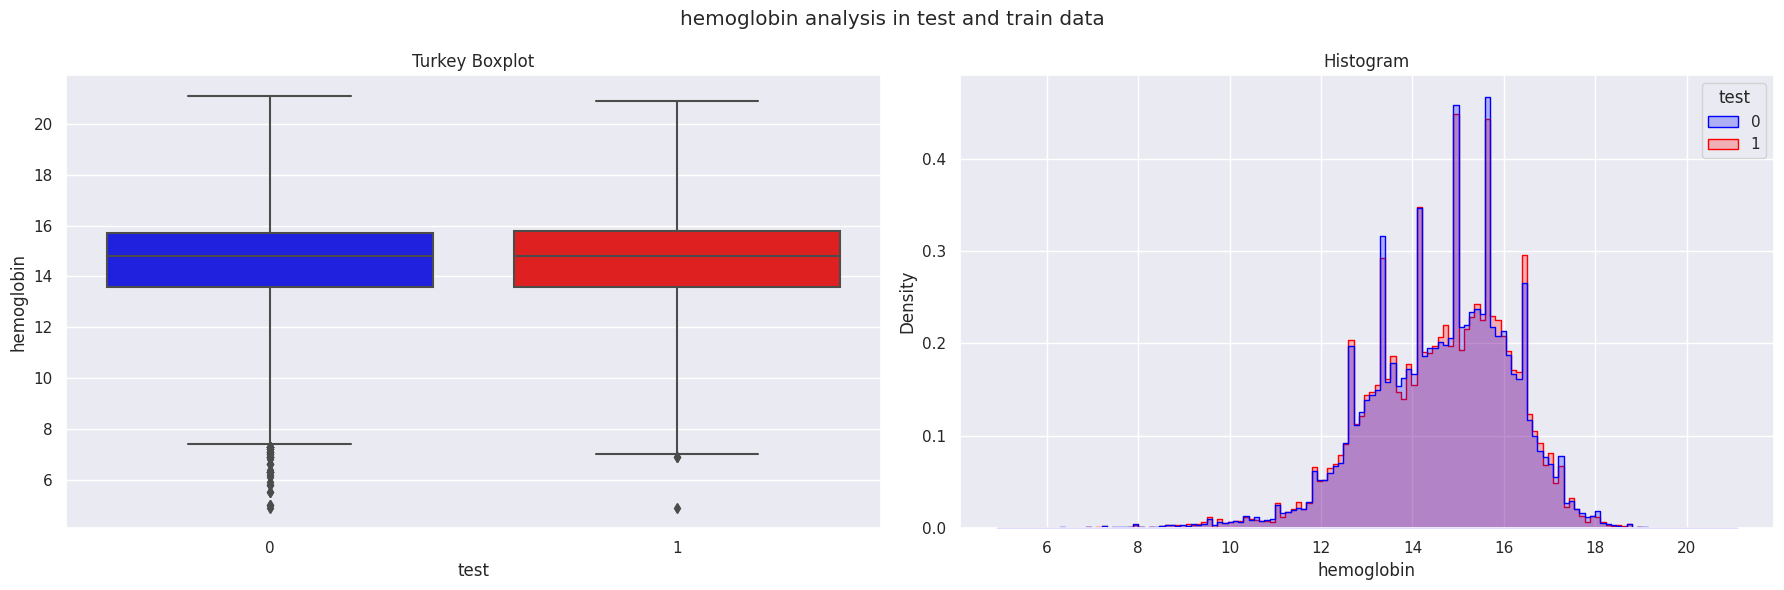

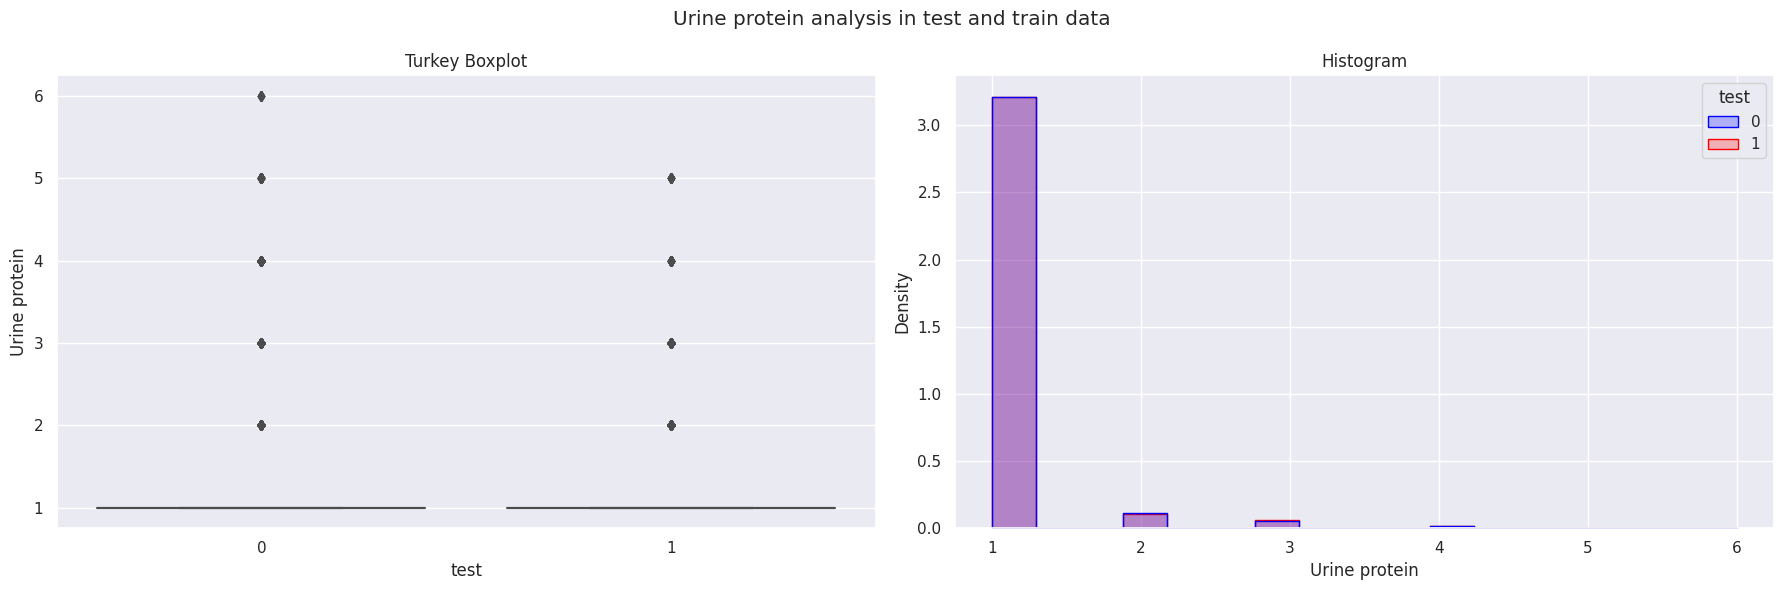

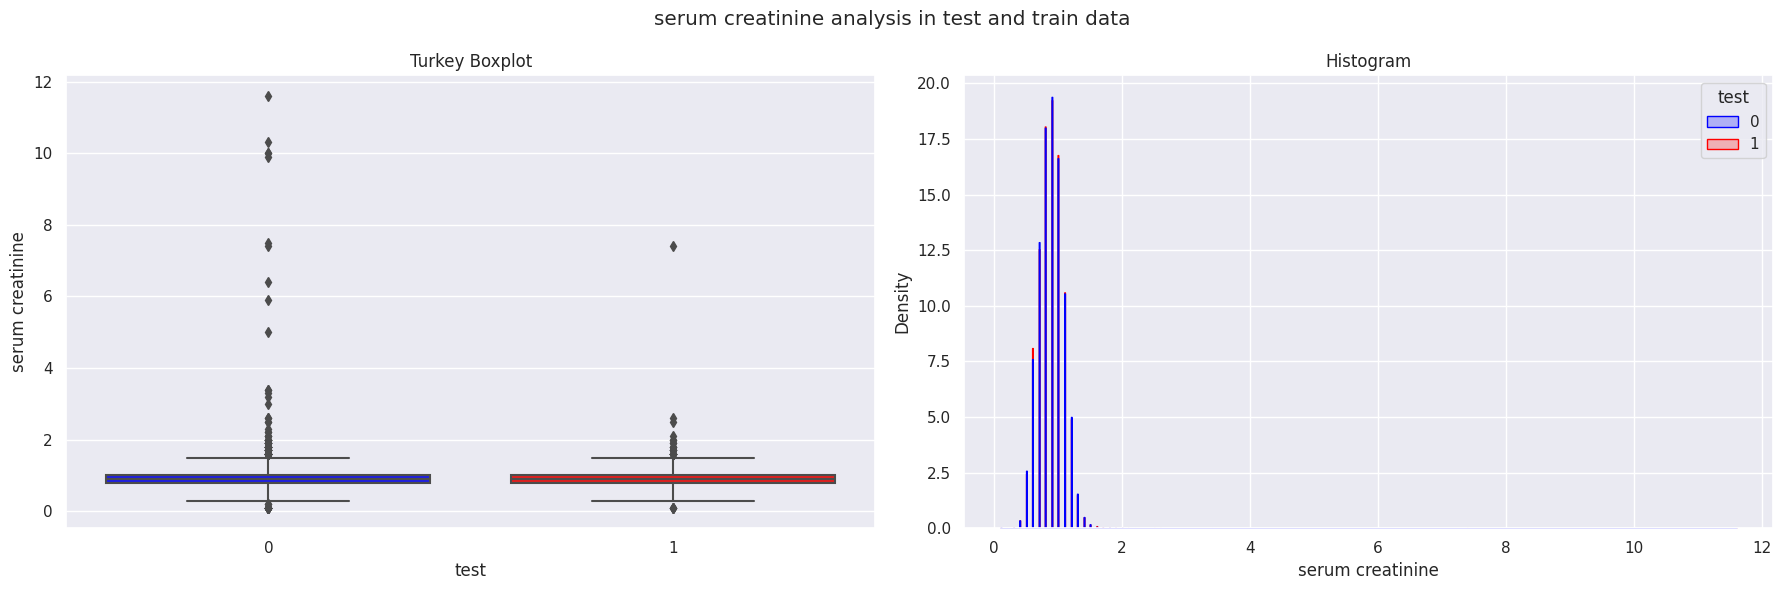

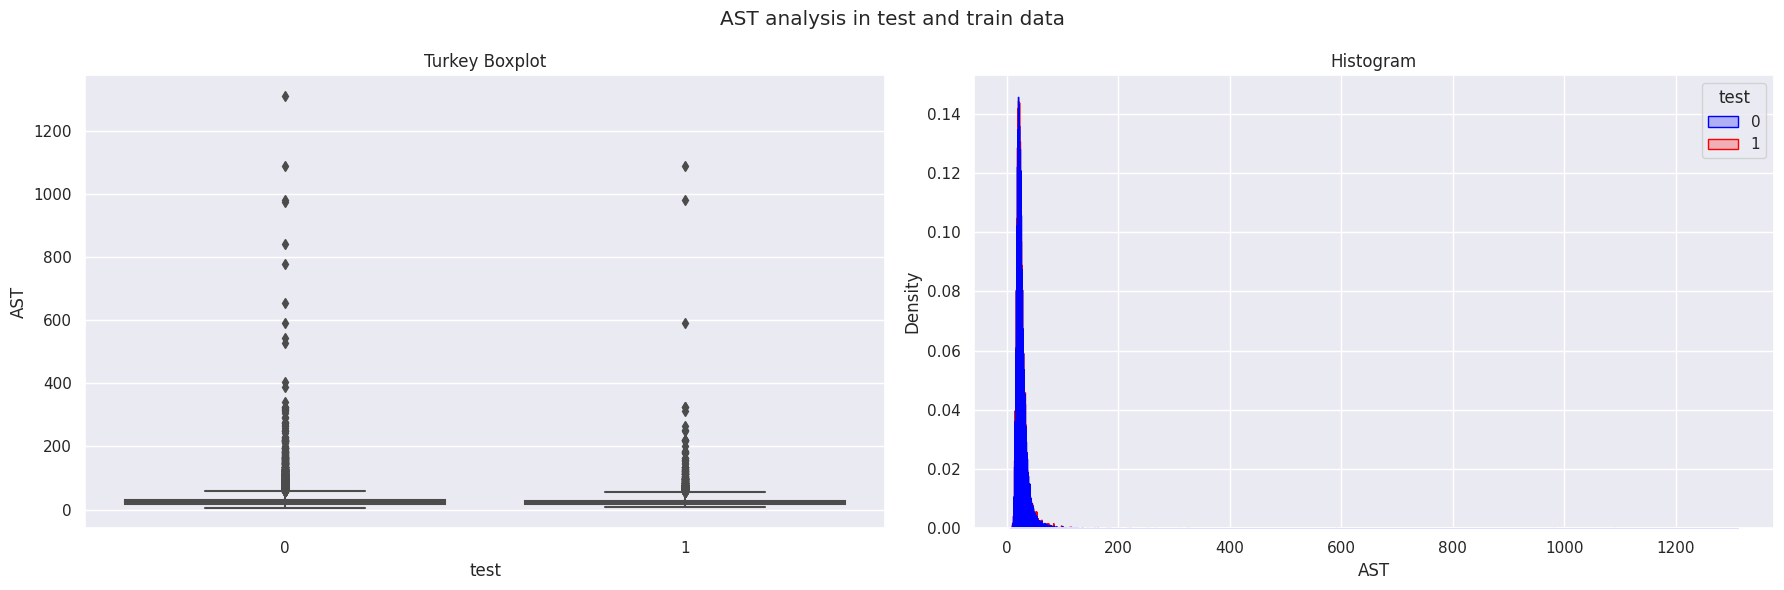

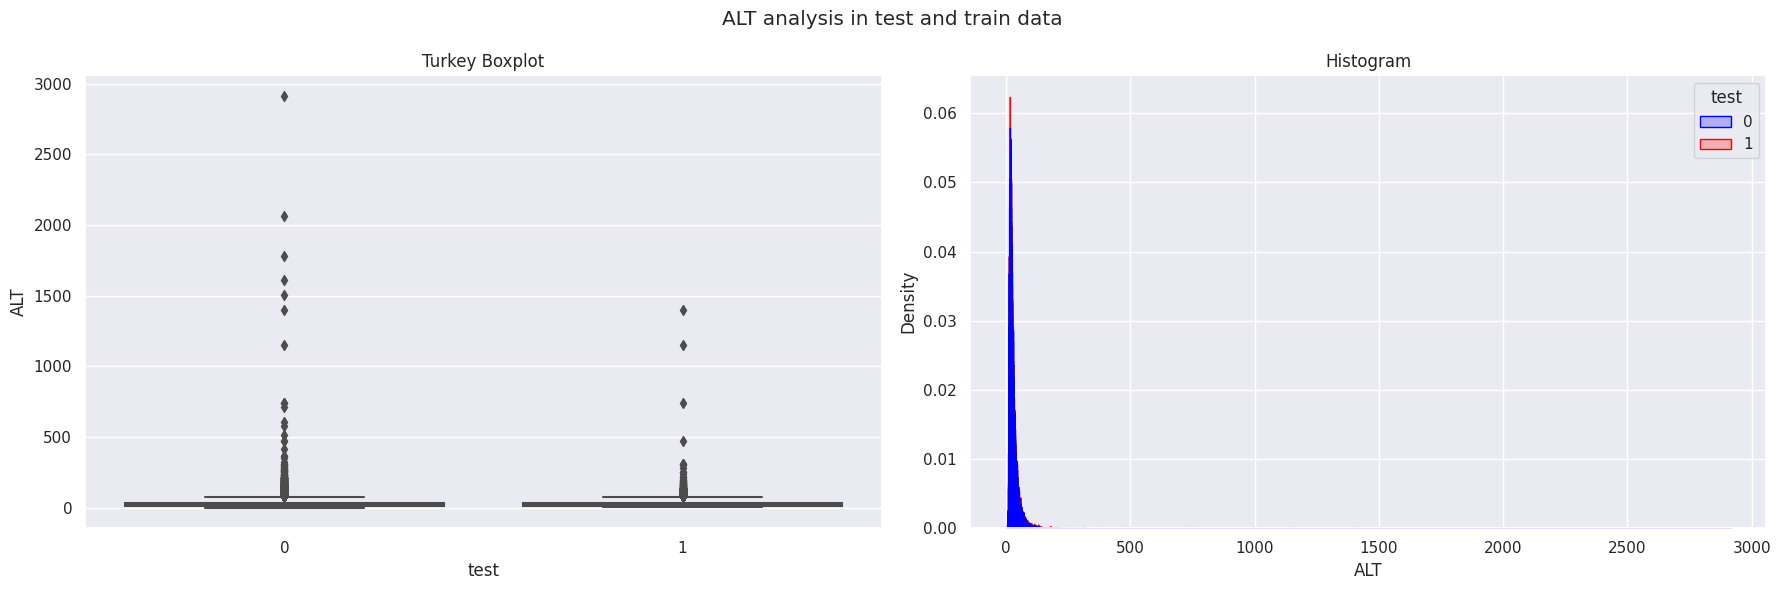

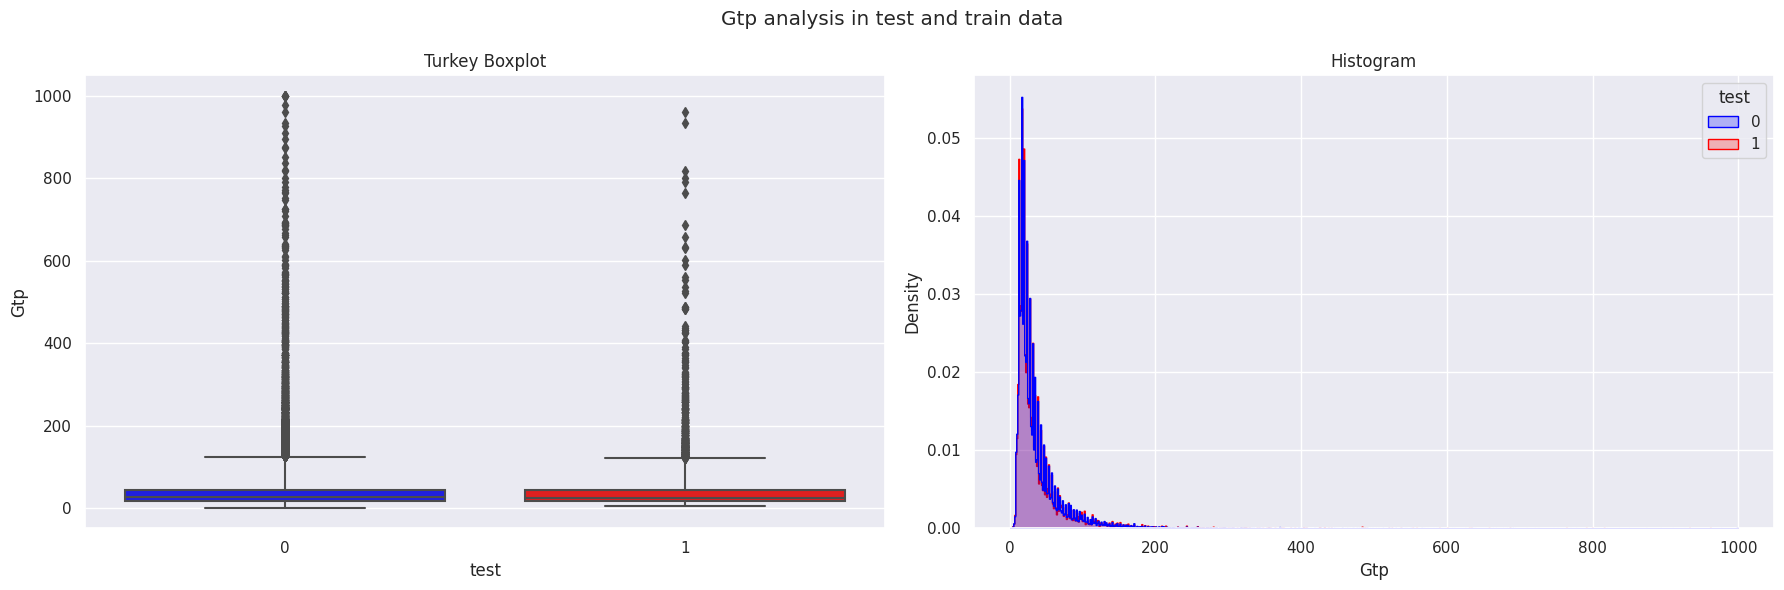

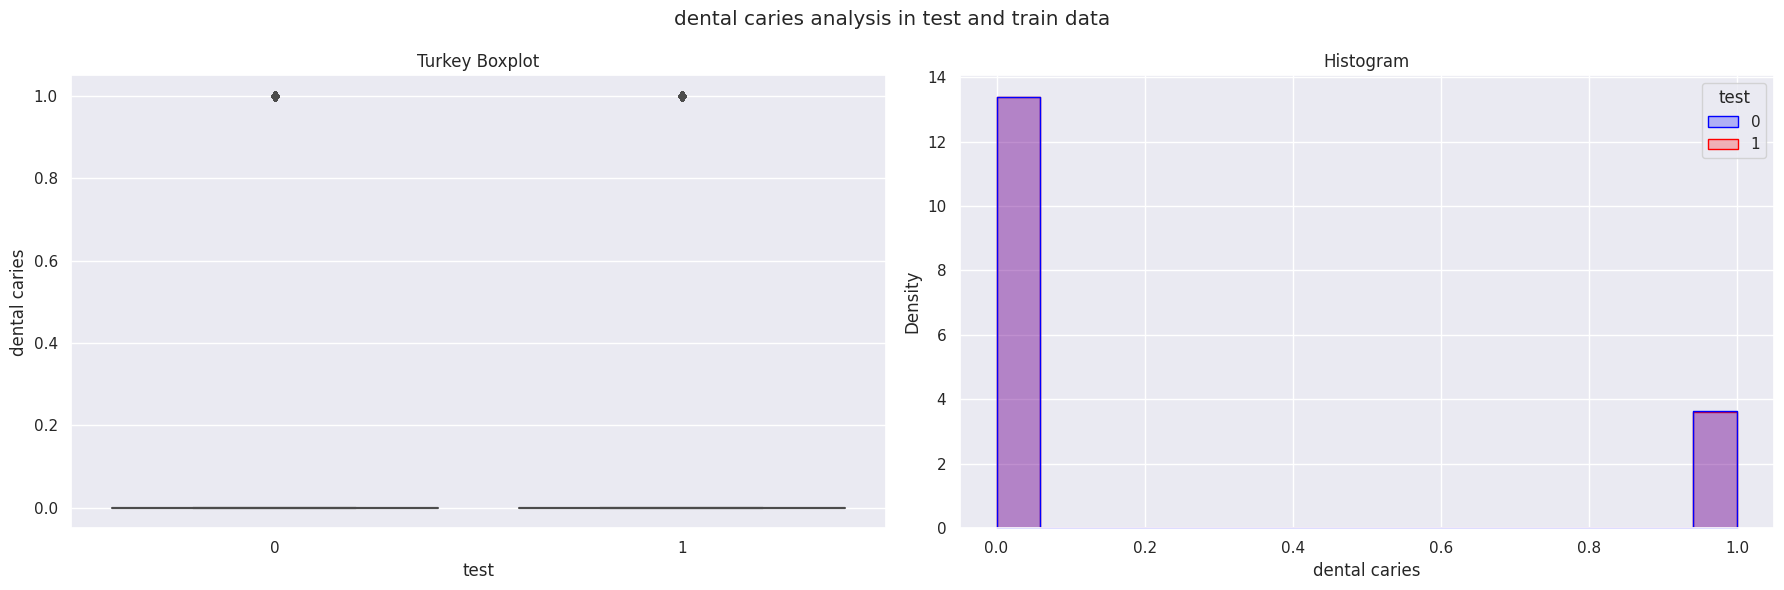

In [ ]:
sns.set(style="darkgrid")

for feature in num_featuresD:

  fig, axs = plt.subplots(1, 2, figsize=(18, 6))

  sns.boxplot(x=df_all["test"], y=df_all[feature], palette={0: "blue", 1: "red"}, ax=axs[0], whis=3)
  axs[0].set_title('Turkey Boxplot')
  axs[0].set_ylabel(feature)

  sns.histplot(data=df_all, x=feature, hue="test", element="step", stat="density", common_norm=False, palette={0: "blue", 1: "red"}, ax=axs[1])
  axs[1].set_title('Histogram')
  axs[1].set_ylabel('Density')

  plt.suptitle(f'{feature} analysis in test and train data')
  plt.tight_layout()
  plt.show()

In [ ]:
df_all.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  55692.000000  55692.000000  55692.000000  55692.000000    55692.000000   
mean      44.182917    164.649321     65.864936     82.046418        1.012623   
std       12.071418      9.194597     12.820306      9.274223        0.486873   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     55692.000000   55692.000000    55692.000000  55692.000000   
mean          1.007443       1.025587        1.026144    121.494218   
std           0.485964       0.157902        0.159564     13.675989   
min           0.100000       1.000000        1.000000     71.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    240.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  55692.000000  ...  55692.000000  55692.000000  55692.000000   
mean      76.004830  ...     57.290347    114.964501     14.622592   
std        9.679278  ...     14.738963     40.926476      1.564498   
min       40.000000  ...      4.000000      1.000000      4.900000   
25%       70.000000  ...     47.000000     92.000000     13.600000   
50%       76.000000  ...     55.000000    113.000000     14.800000   
75%       82.000000  ...     66.000000    136.000000     15.800000   
max      146.000000  ...    618.000000   1860.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   55692.000000      55692.000000  55692.000000  55692.000000   
mean        1.087212          0.885738     26.182935     27.036037   
std         0.404882          0.221524     19.355460     30.947853   
min         1.000000          0.100000      6.000000      1.000000   
25%         1.000000          0.800000     19.000000     15.000000   
50%         1.000000          0.900000     23.000000     21.000000   
75%         1.000000          1.000000     28.000000     31.000000   
max         6.000000         11.600000   1311.000000   2914.000000   

                Gtp  dental caries          test  
count  55692.000000   55692.000000  55692.000000  
mean      39.952201       0.213334      0.200011  
std       50.290539       0.409665      0.400012  
min        1.000000       0.000000      0.000000  
25%       17.000000       0.000000      0.000000  
50%       25.000000       0.000000      0.000000  
75%       43.000000       0.000000      0.000000  
max      999.000000       1.000000      1.000000  

[8 rows x 23 columns]

Analisando cada distribuição e a quantidade de outliers presente, percebe-se que algumas observações podem ser feitas quanto algumas features:

* Blood Sugar, AST, ALT, GTP apresentam uma distribuição concentrada à esquerda, com uma taxa de descrescimento acentuada - aparentemente exponencial.

* Creatinine e LDL apresentam alguns outliers mais externos no conjunto de treino do que em relação ao conjunto de dados


Antes de propor soluções, vamos analisar a variância das features numéricas. Essa informação será útil futuramente.
Para isso, usaremos o coeficiente de variância, que vai nos fornescer um valor percentual de variância em relação ao intervalo da distribuição.

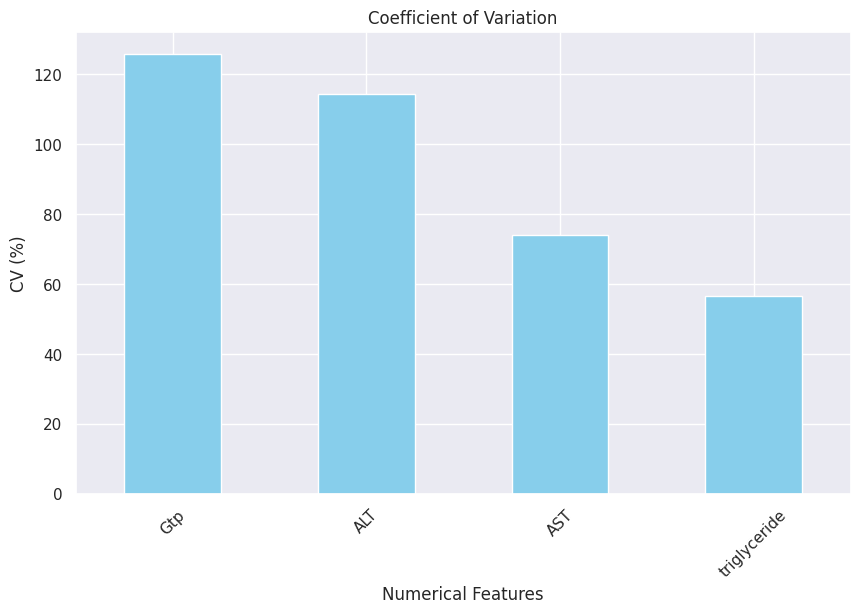

In [ ]:
num_features = [f for f in df_all.columns if f not in (cat_featD + ['age', 'ID', 'dental caries'])]


cv_por_feature = (df_all[num_features].std() / df_all[num_features].mean()) * 100

cv_por_feature = cv_por_feature.sort_values(ascending=False)

sete_maiores = cv_por_feature.head(4)

plt.figure(figsize=(10, 6))
sete_maiores.plot(kind='bar', color='skyblue')
plt.title('Coefficient of Variation')
plt.xlabel('Numerical Features')
plt.ylabel('CV (%)')
plt.xticks(rotation=45)
plt.show()


Agora, analisemos a distribuição dessas variáveis concentradas. Para isso, utilizemos o qqplot, que mostra visualmente a proximidade da distribuição à normal.

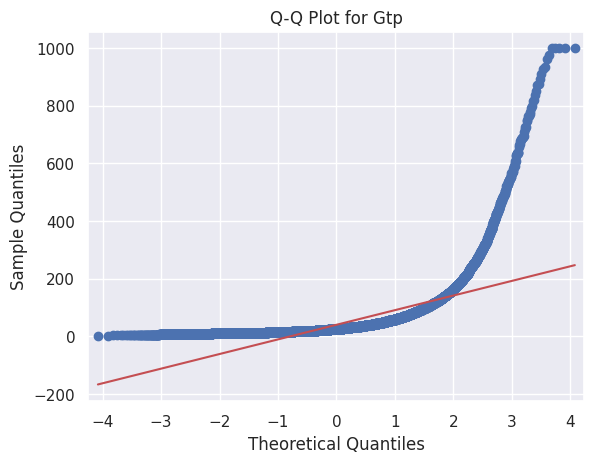

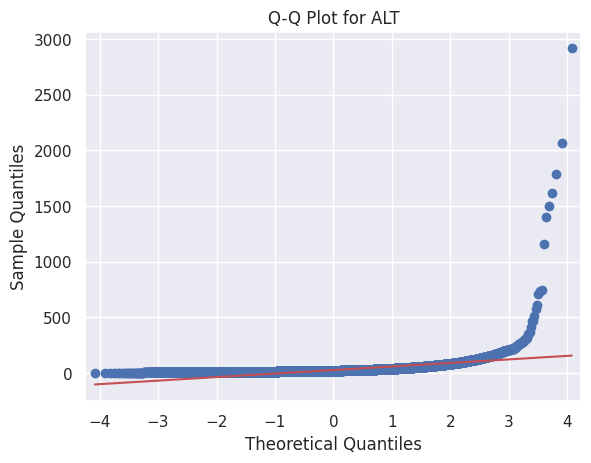

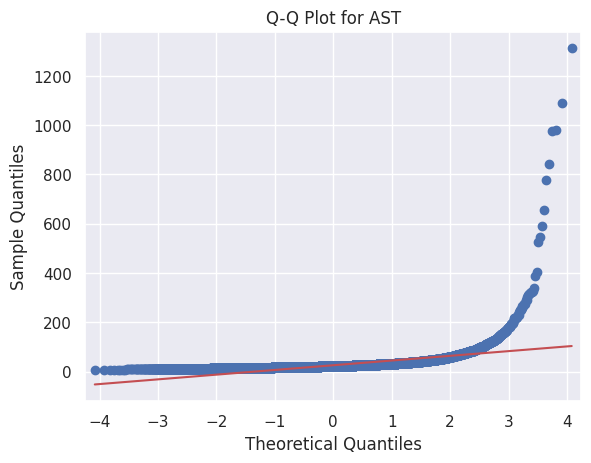

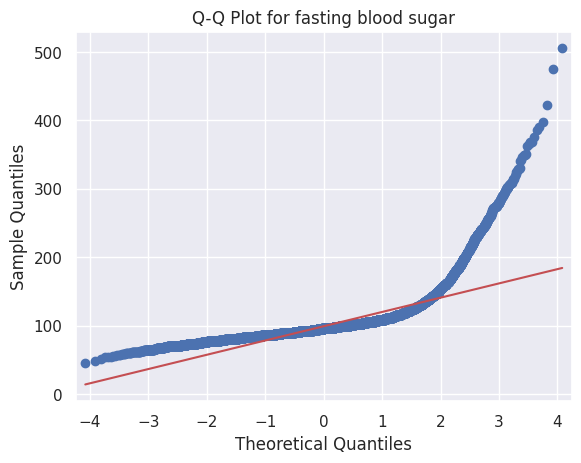

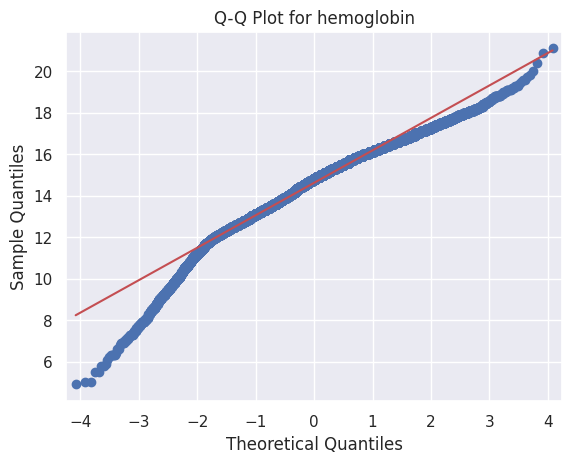

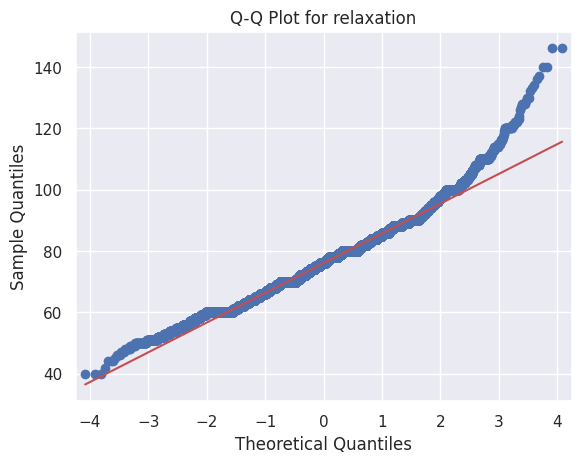

In [ ]:
import statsmodels.api as sm

plot_list = ['Gtp', 'ALT', 'AST', 'fasting blood sugar', 'hemoglobin', 'relaxation']

for feature in plot_list:
  sm.qqplot(df_train[feature], line='s')
  plt.title(f'Q-Q Plot for {feature}')
  plt.show()

Nos gráficos acima, podemos entender que as três (AST, ALT, Gtp e blood sugar) primeiras features se assemelham à uma distribuição concentrada com variação abrupta (talvez exponencial).
Já as últimas, hemoglobin e relaxation, parecem distribuições mais normais. Porém, com um aumento e um decrescimento - respectivamente - na taxa de crescimento em seus polos de concentração.

Uma vez que se esclarece essa diferença, podemos aplicar algumas transformações de variáveis nesses dados, visando esclarecer melhor seu funcionamento e amortizar suas condições anormais. Para isso, ossíveis tranformações são:

* Logarítimica
* Raiz quadrada
* Box cox

Vamos observar como o histograma e o boxplot dessas variáveis se comportam em relação às transformações citadas, com o objetivo de verificar se tais técnicas serão capazes de melhorar nossas distribuições. Tomemos a feature Gtp como exemplo.

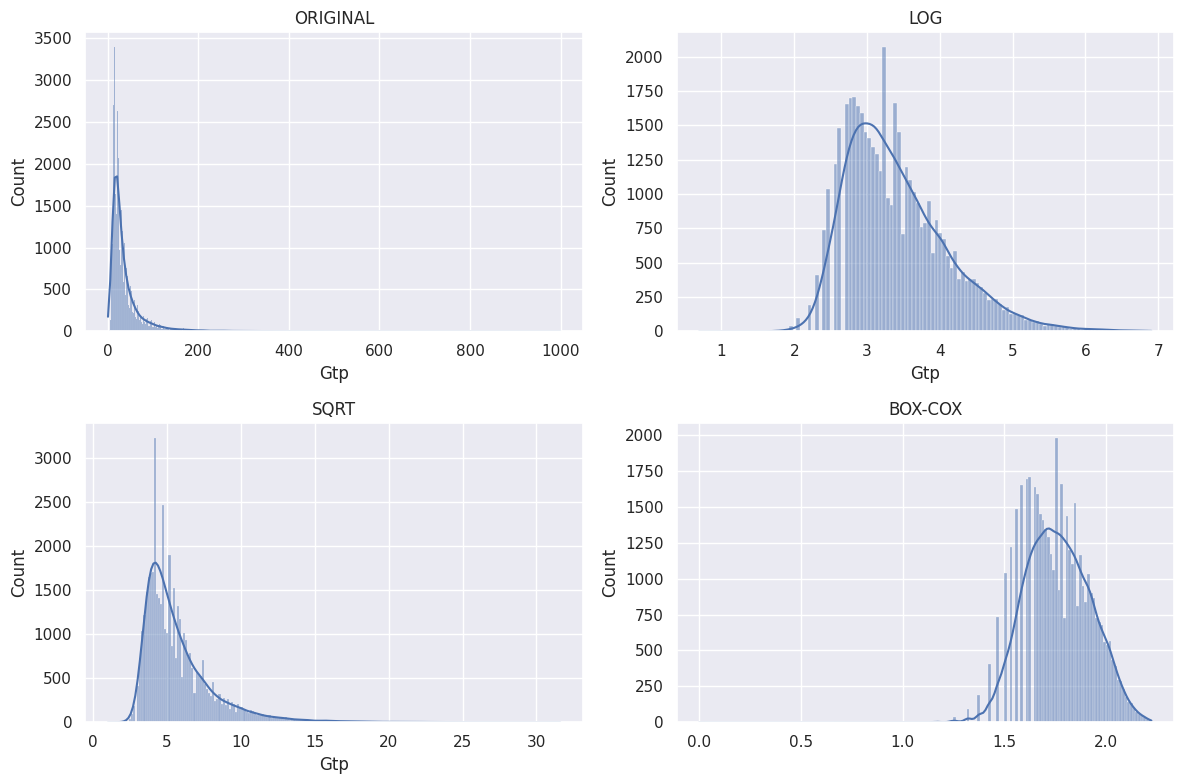

Text(0.5, 1.0, 'BOX-COX Boxplot')

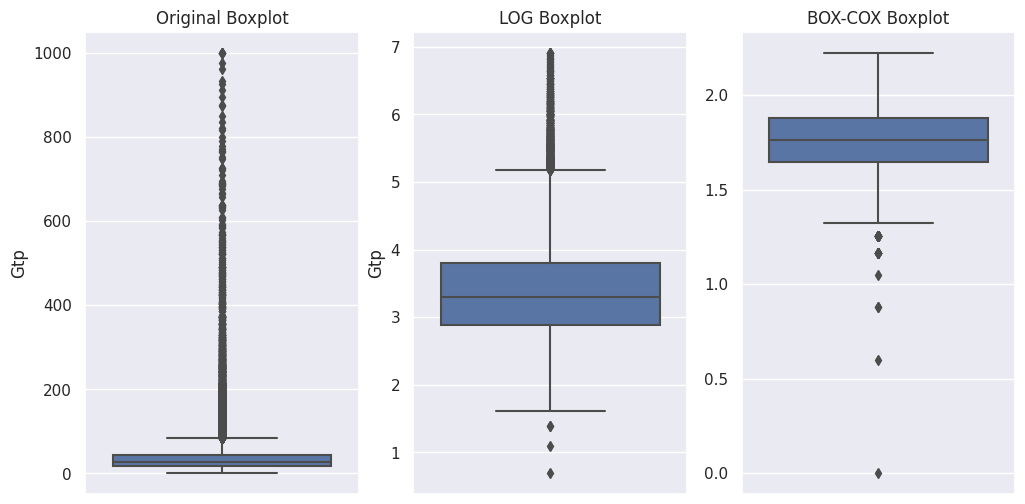

In [ ]:
from scipy.stats import boxcox

dados = df_train['Gtp']


dados_log = np.log1p(dados)
dados_sqrt = np.sqrt(dados)
dados_boxcox, _ = boxcox(abs(dados))


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.histplot(dados, kde=True)
plt.title('ORIGINAL')

plt.subplot(2, 2, 2)
sns.histplot(dados_log, kde=True)
plt.title('LOG')

plt.subplot(2, 2, 3)
sns.histplot(dados_sqrt, kde=True)
plt.title('SQRT')

plt.subplot(2, 2, 4)
sns.histplot(dados_boxcox, kde=True)
plt.title('BOX-COX')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=dados)
plt.title('Original Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=dados_log)
plt.title('LOG Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=dados_boxcox)
plt.title('BOX-COX Boxplot')

Agora, vamos estudar esses resultados com o exemplo da feature hemoglobin:

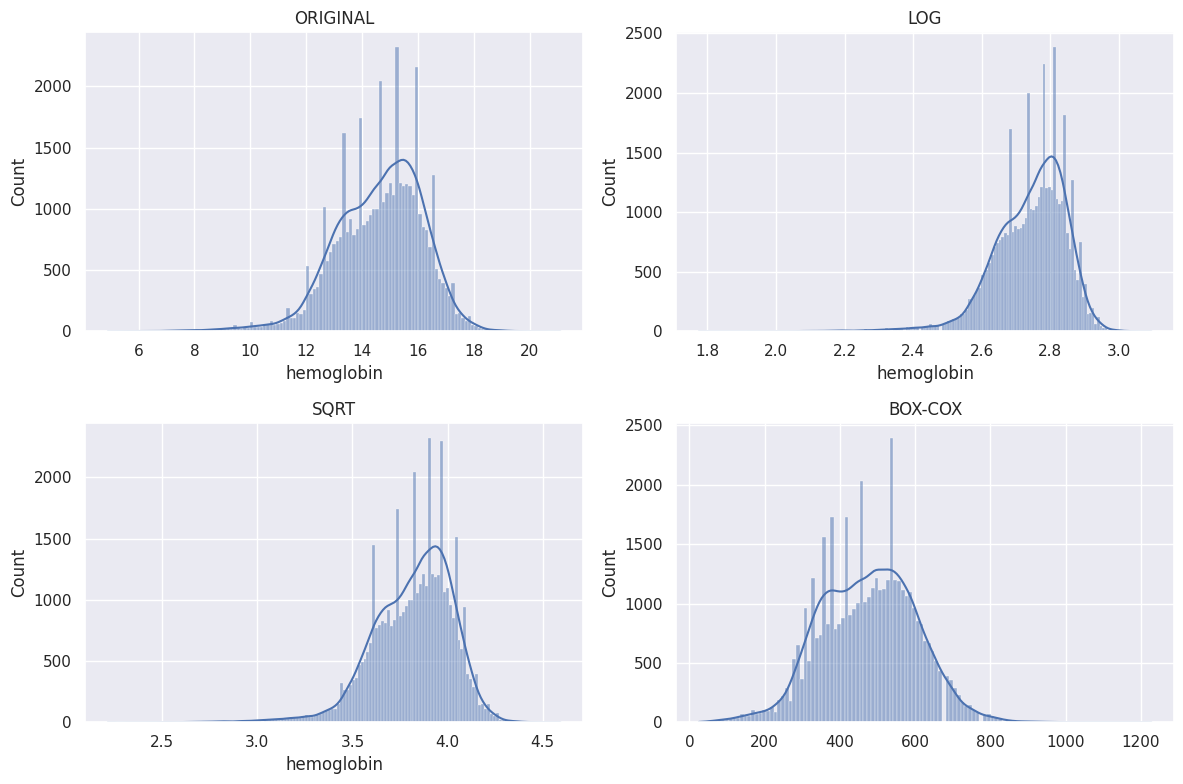

Text(0.5, 1.0, 'BOX-COX Boxplot')

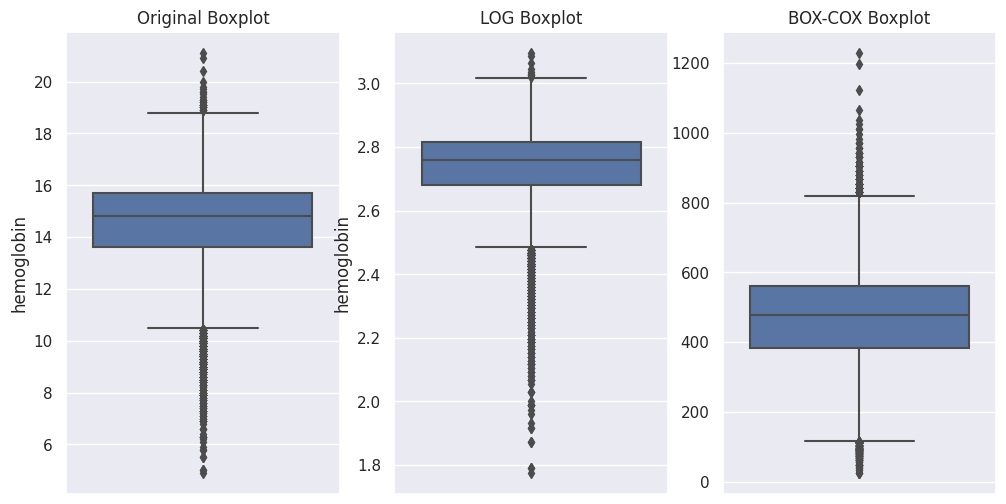

In [ ]:
from scipy.stats import boxcox

dados = df_train['hemoglobin']


dados_log = np.log1p(dados)
dados_sqrt = np.sqrt(dados)
dados_boxcox, _ = boxcox(abs(dados))


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.histplot(dados, kde=True)
plt.title('ORIGINAL')

plt.subplot(2, 2, 2)
sns.histplot(dados_log, kde=True)
plt.title('LOG')

plt.subplot(2, 2, 3)
sns.histplot(dados_sqrt, kde=True)
plt.title('SQRT')

plt.subplot(2, 2, 4)
sns.histplot(dados_boxcox, kde=True)
plt.title('BOX-COX')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=dados)
plt.title('Original Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=dados_log)
plt.title('LOG Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=dados_boxcox)
plt.title('BOX-COX Boxplot')

Com os gráficos acima, podemos concluir algumas observações:
* Para dados como o Gtp, uma transformação logarítmica ou box-cox pode ser benéfica (como evidenciado anteriormente - vide correlação)
* Para dados como Hemoglobin e relaxation, as transformações não surtem efeitos significativos.


## Visualizando resultados com diferenciação
Nessa seção, fazemos os plots mostrando como o target fumante se distribui em cada histograma das features. Para isso usa um dataset df_ana que contém os dados do treino + a categoria fumante tirada de y_train. Nesses plots analisamos a relação entre as features e o target de fumar ou não, além de podermos visualizar se a distribuição dos dados no treino e no teste se mantém

In [ ]:
df_ana = df_train
df_ana['smoking'] = y_train['smoking']

Fomos variando o j para visualizar os plots, ao longo de todos, notamos que a proporção entre o teste e o treino se manteve semelhante, além de termos encontrados algumas features interessantes, mostradas abaixo

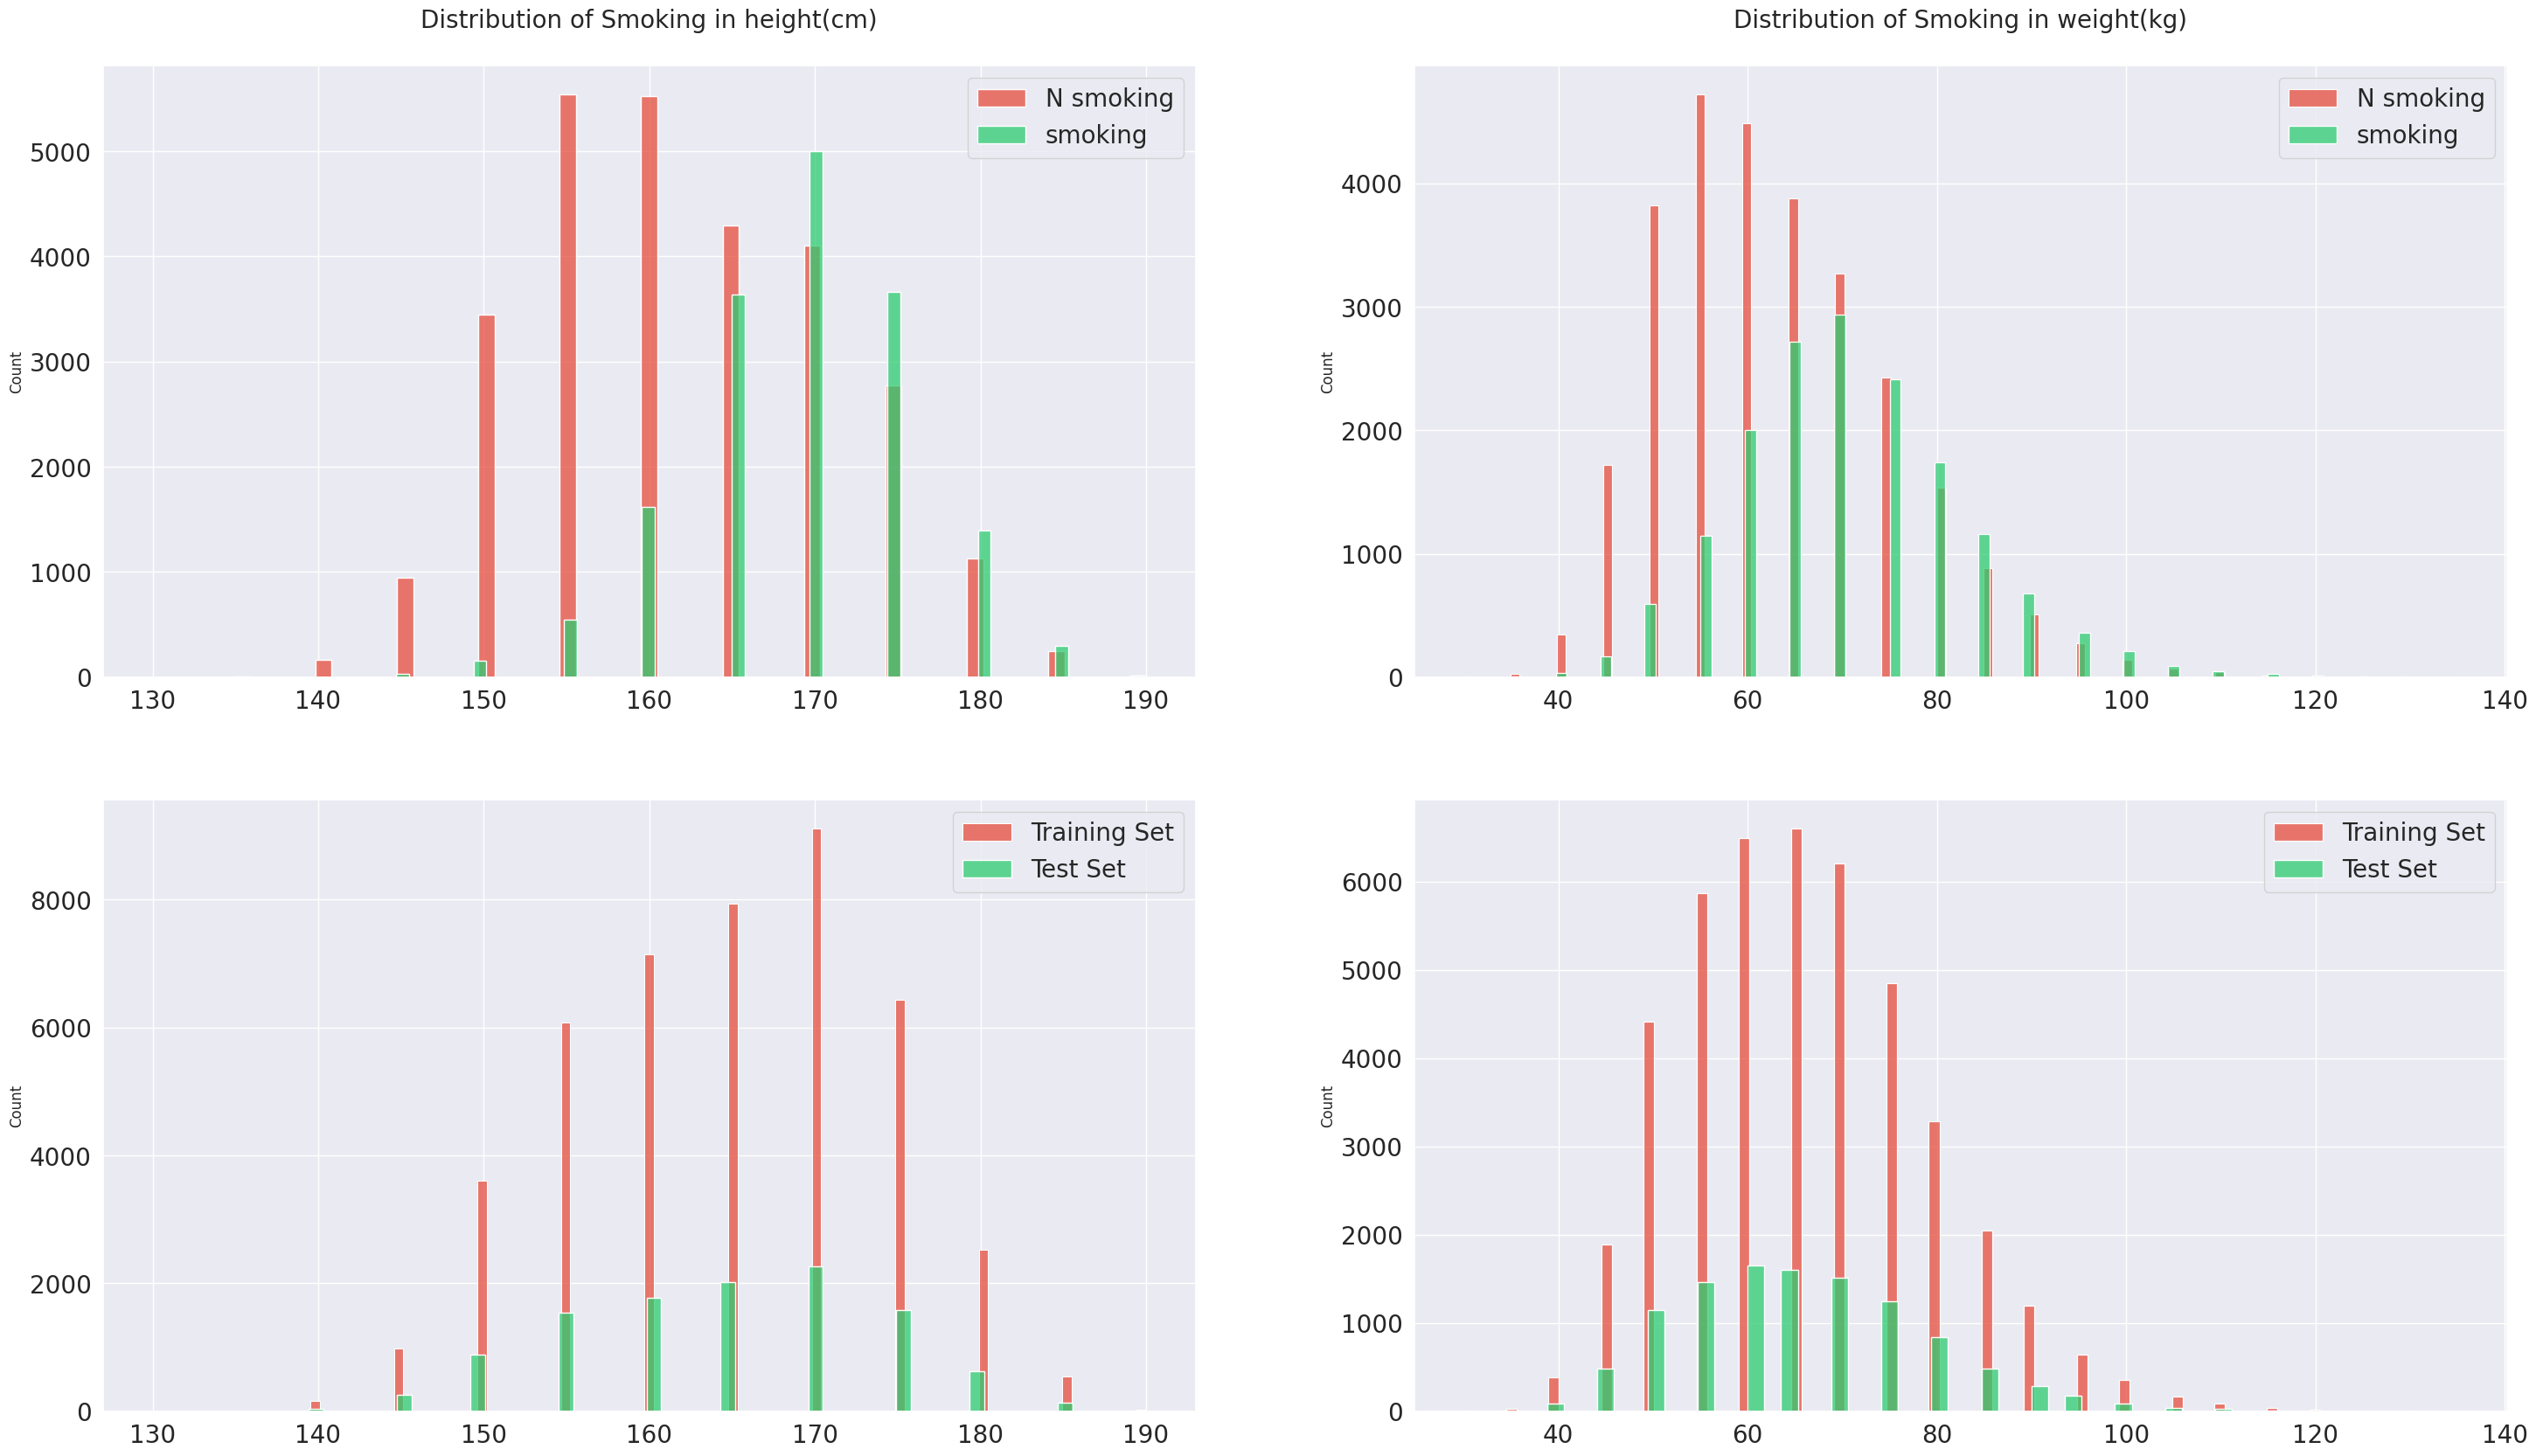

In [ ]:
j = 0
cont_features = num_features[j:j+2]
smoking = df_ana['smoking'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_ana[~smoking][feature], label='N smoking', color='#e74c3c', ax=axs[0][i])
    sns.histplot(df_ana[smoking][feature], label='smoking', color='#2ecc71', ax=axs[0][i])

    # Distribution of feature in dataset
    sns.histplot(df_ana[feature], label='Training Set', color='#e74c3c', ax=axs[1][i])
    sns.histplot(df_test[feature], label='Test Set', color='#2ecc71', ax=axs[1][i])

    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')

    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)

    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

Primeira feature interessante, hemoglobina.

Esta se destaca por apresentar uma grande distinção entre percentual de fumantes e não fumantes ao variar o valor do eixo x, com um grande predomínio de fumantes para hemoglobina menor que 15. Devido à essa discrepância, essa feature provavelmente vai ser de grande importância para o modelo diferenciar as classes

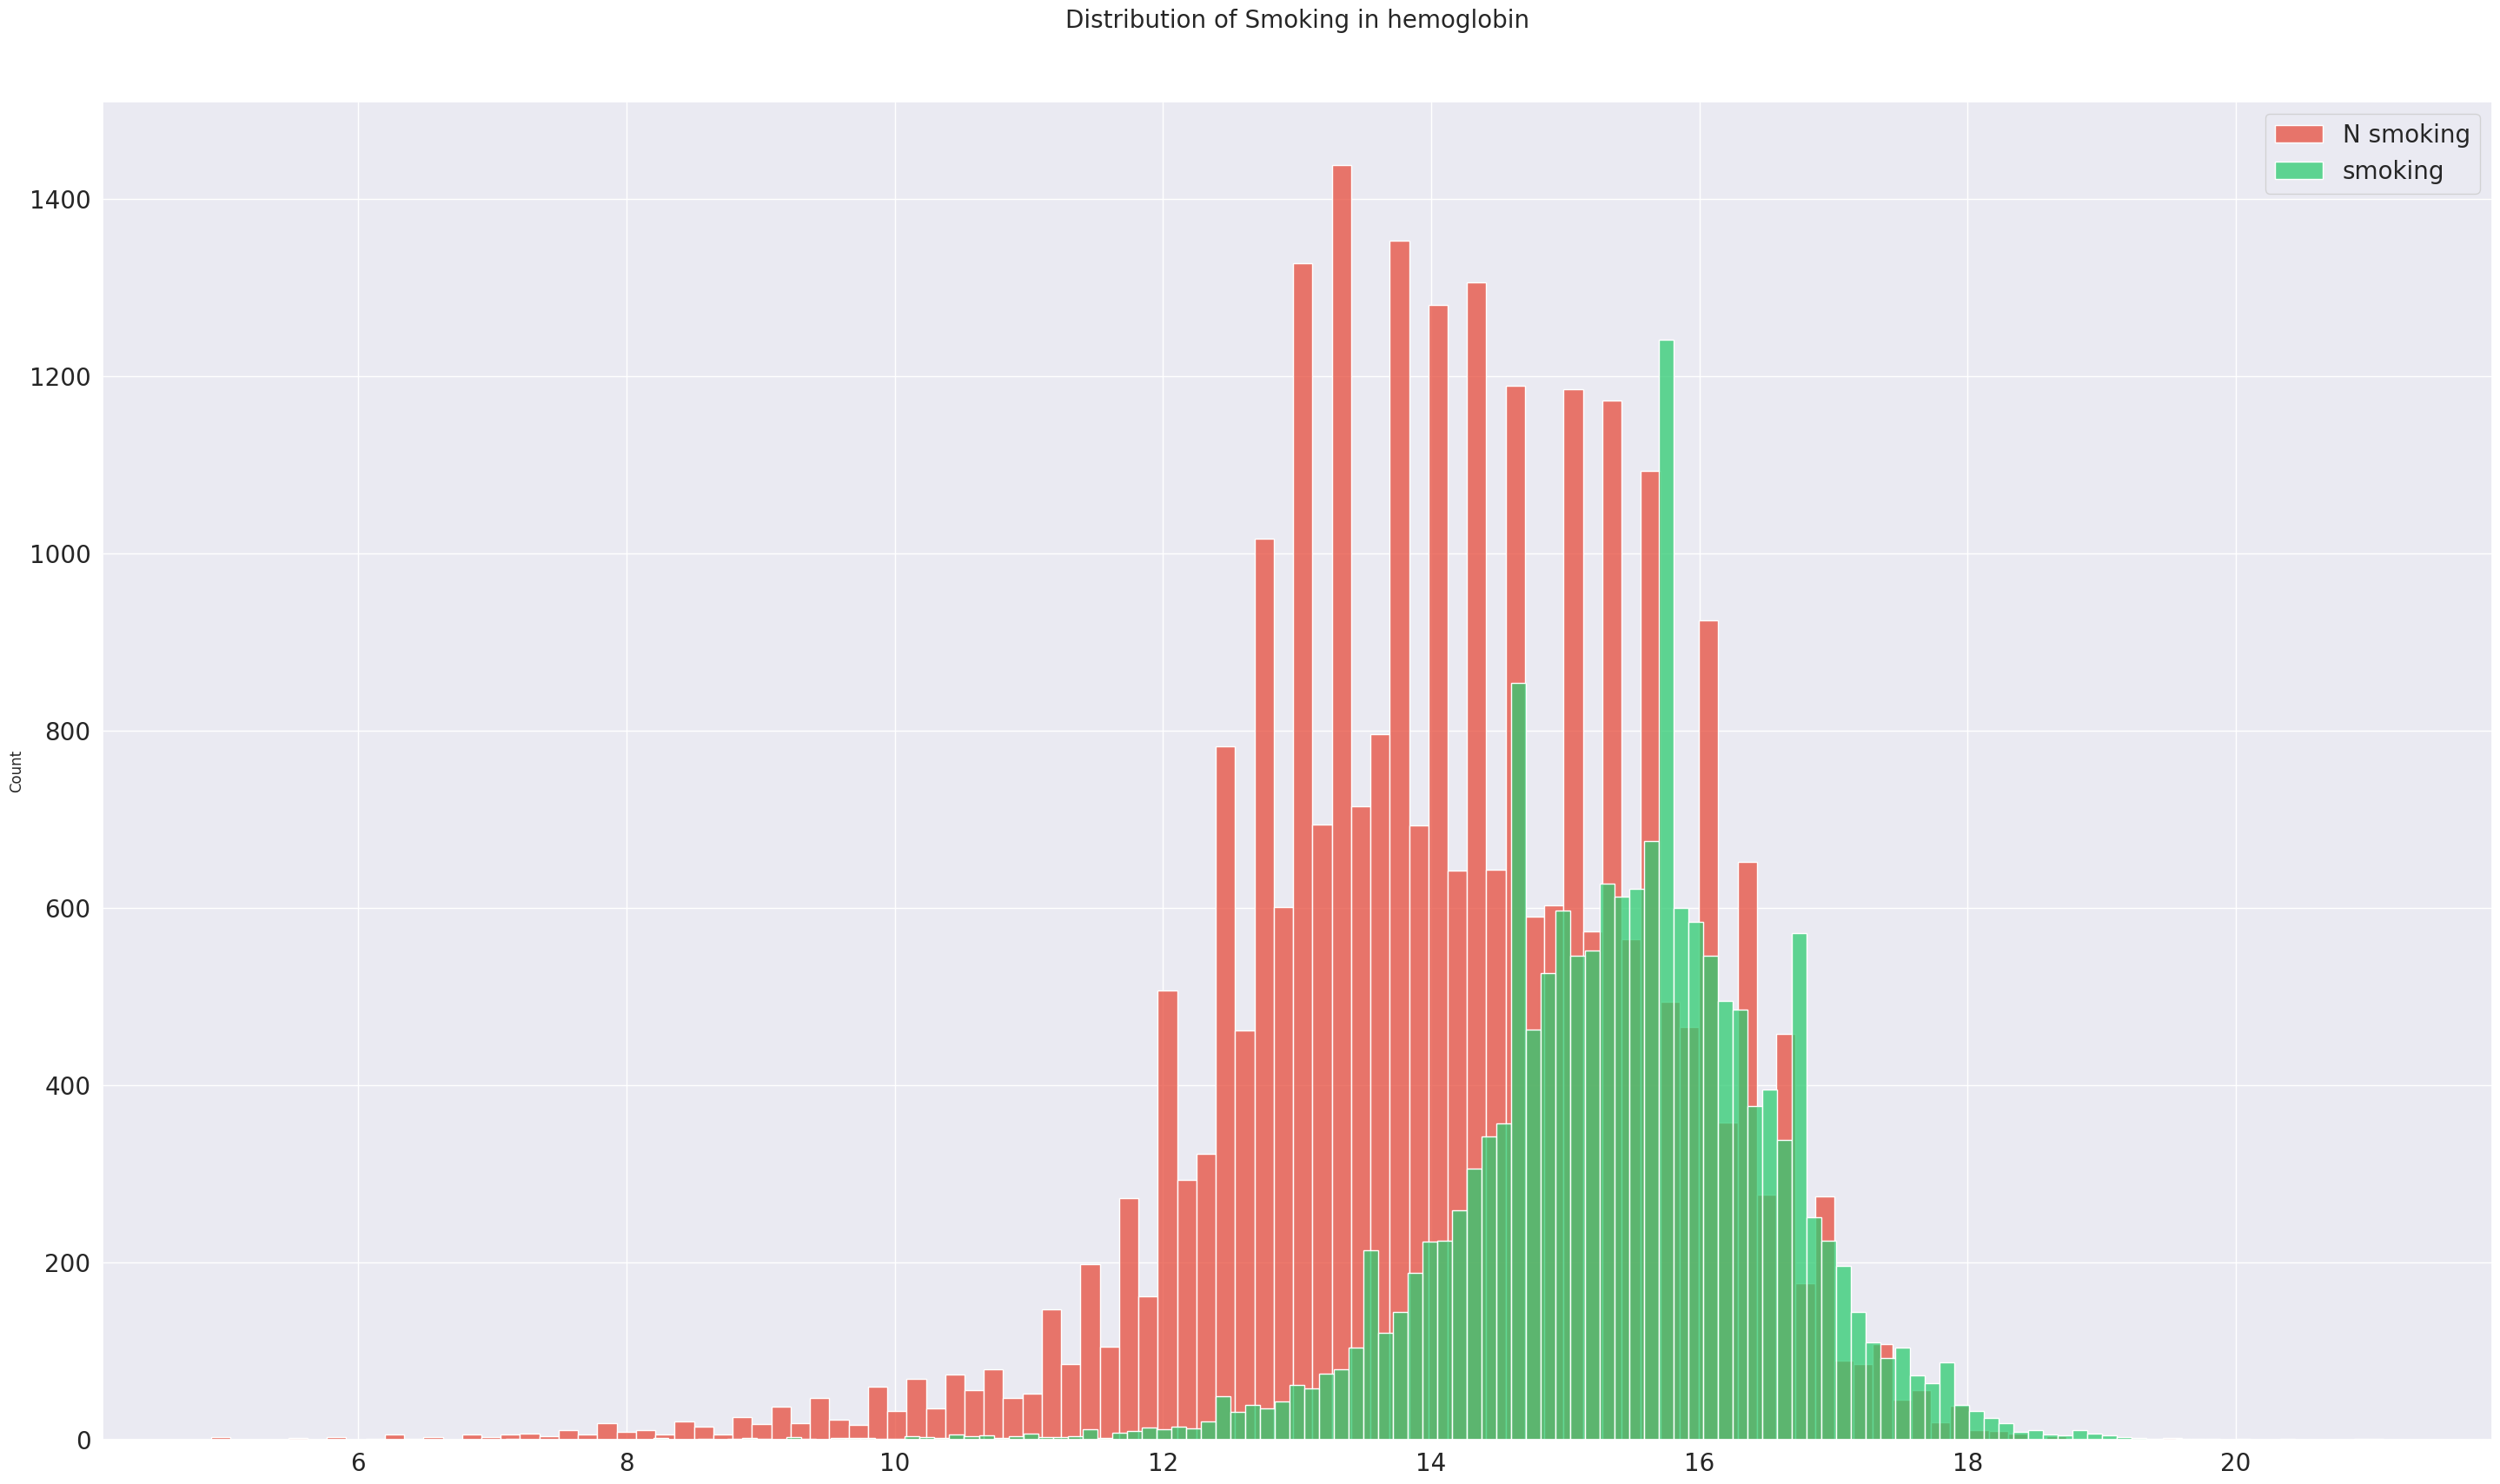

In [ ]:
df_plot = df_ana.copy()
df_plot['smoking'] = y_train['smoking']

j = df_plot.columns.get_loc('systolic')
cont_features = ['hemoglobin']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c')
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71')

    axs.set_xlabel('')

    for j in range(2):
        axs.tick_params(axis='x', labelsize=20)
        axs.tick_params(axis='y', labelsize=20)

    axs.legend(loc='upper right', prop={'size': 20})
    axs.set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

Agora temos height, weight e waist.

De forma semelhante a hemoglobina estas se destacam por apresentar uma grande distinção entre percentual de fumantes e não fumantes ao variar o valor do eixo x, com um grande predomínio de não fumantes entre os baixinhos, magros e de cintura fina. Devido à essa discrepância, essas features provavelmente vão ser de grande importância para o modelo diferenciar as classes, e devido à certa semelhança entre elas, junto à correlação, tivemos a ideia de tentar juntá-las em IMC e IAC

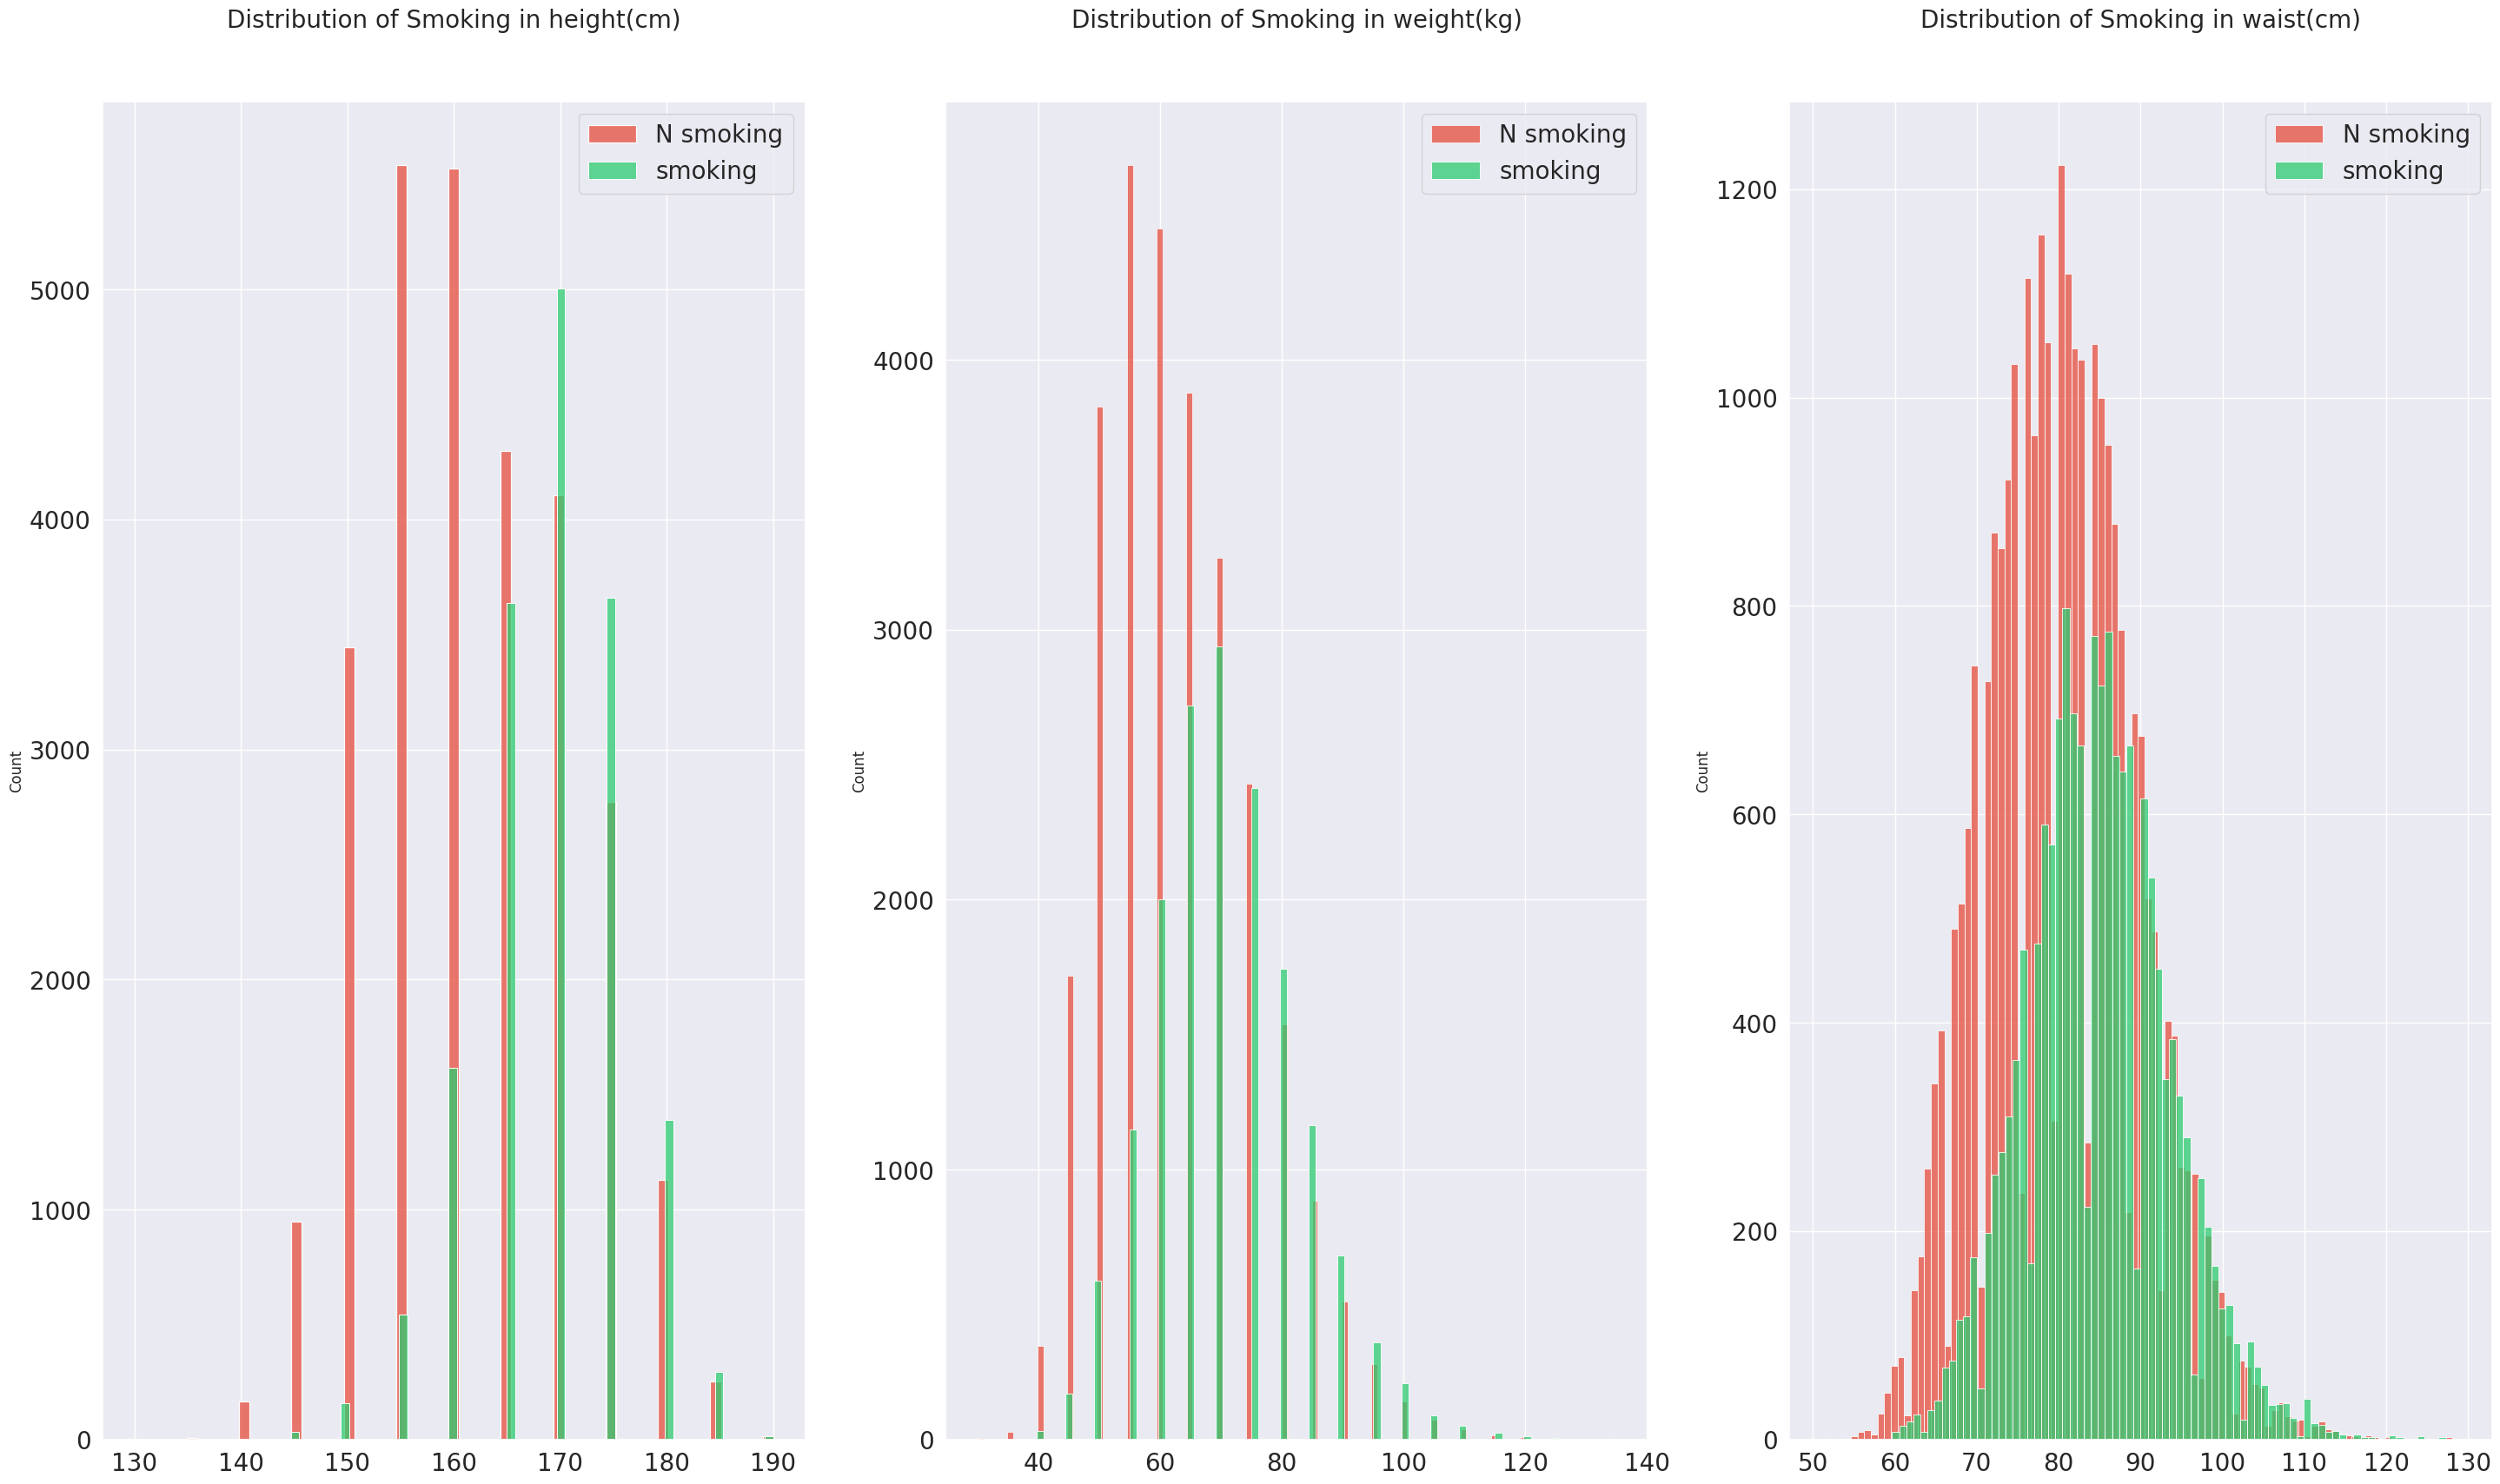

In [ ]:
df_plot = df_ana.copy()
df_plot['smoking'] = y_train['smoking']

cont_features = ['height(cm)','weight(kg)','waist(cm)']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c',ax=axs[i])
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71',ax=axs[i])

    axs[i].set_xlabel('')

    for j in range(3):
        axs[j].tick_params(axis='x', labelsize=20)
        axs[j].tick_params(axis='y', labelsize=20)

    axs[i].legend(loc='upper right', prop={'size': 20})
    axs[i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

Passando para as features categóricas(ou quase) notamos que cárie e gênero também apresentaram uma significante distinção entre as classes, com pouquissimas mulhereres fumantes e muitas pessoas que não fumam e não tem cárie

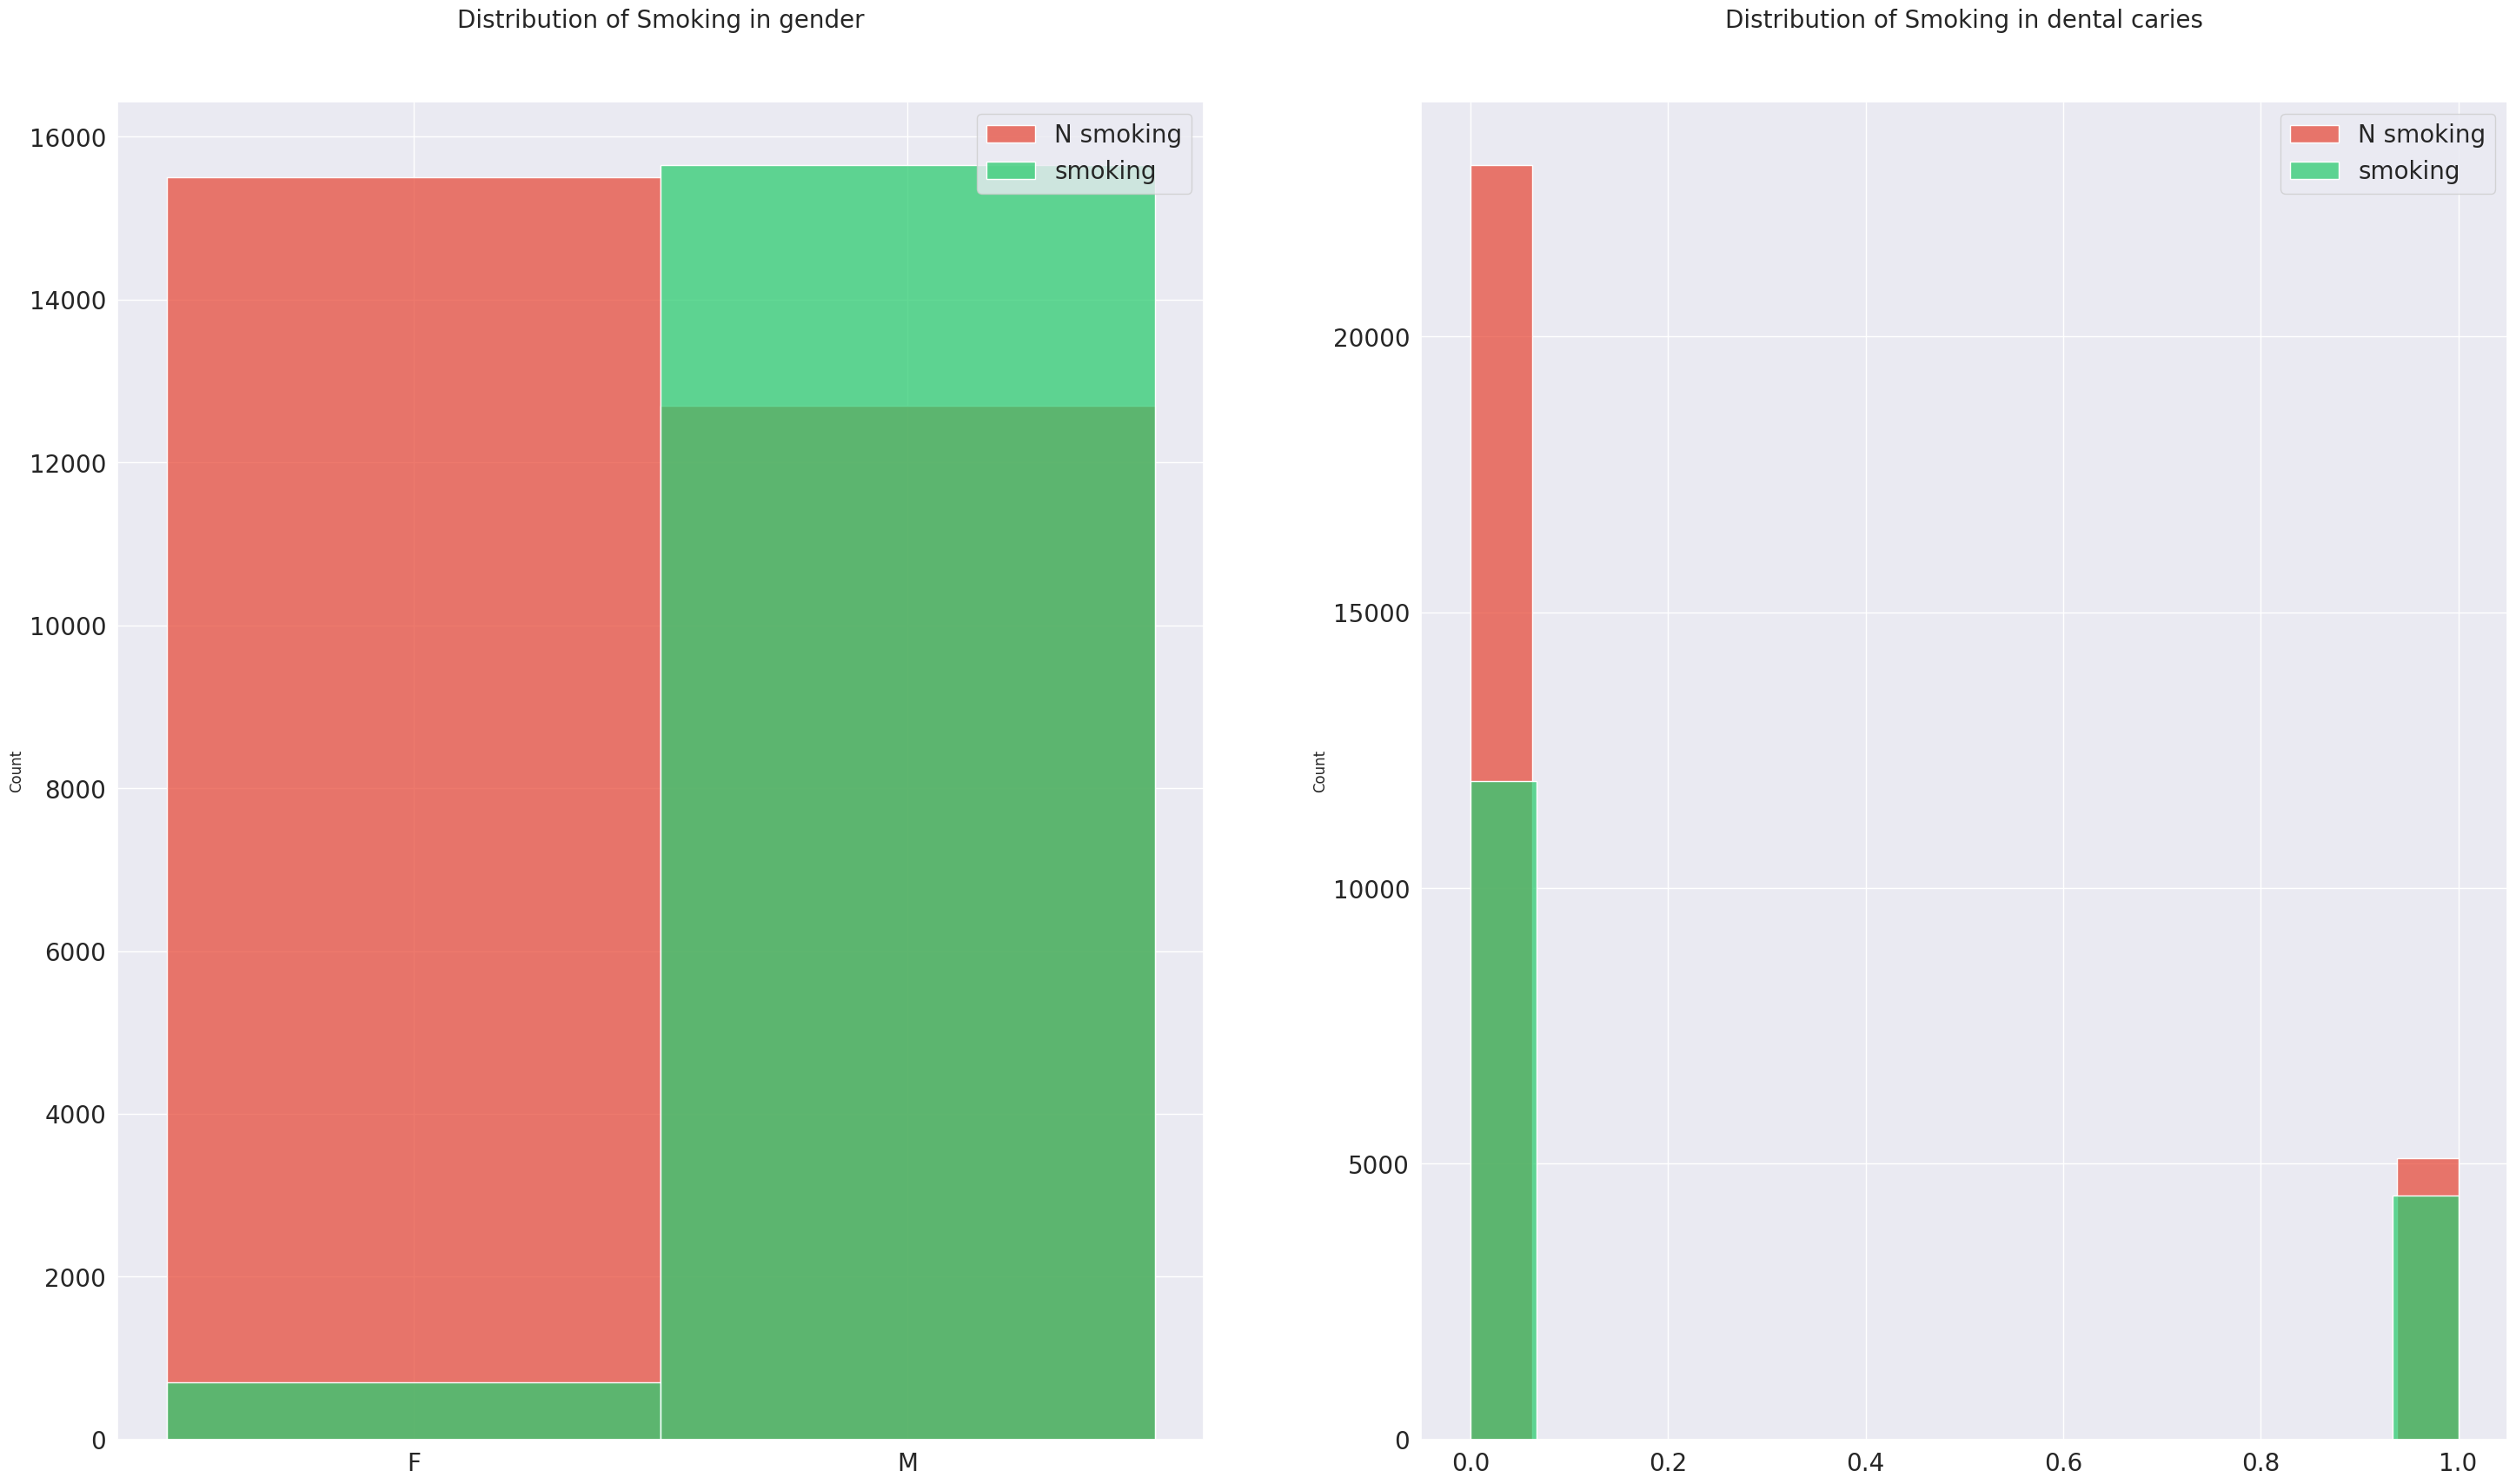

In [ ]:
df_plot = df_ana.copy()
df_plot['smoking'] = y_train['smoking']

cont_features = ['gender','dental caries']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c',ax=axs[i])
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71',ax=axs[i])

    axs[i].set_xlabel('')

    for j in range(2):
        axs[j].tick_params(axis='x', labelsize=20)
        axs[j].tick_params(axis='y', labelsize=20)

    axs[i].legend(loc='upper right', prop={'size': 20})
    axs[i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

Essa parte foi importante para termos uma noção melhor dos nossos dados e talvez até prever um pouco do que a feature importance vai nos mostrar, além de nos ajudar a inspirar algumas junções de features

## Transformando Variáveis
Aplicando transformações sobre alguns dos dados para obter melhores estatísticas e visualizações das distribuições. Além disso, utilizaremos o método de PCA para avaliar a eficiência das modificações no formato dos dados.


### Análise de influência das variáveis originais

In [ ]:
df_train_transformed = df_train.copy()
df_test_transformed = df_test.copy()
df_train_PCA_cp = df_train.copy() # cópia dos dados de treino para testar PCA
df_teste_PCA_cp = df_test.copy() # cópia dos dados de teste para testar PCA

Agora, vamos rodar o PCA sobre os dados do treino para avaliar quais são as features mais influentes.

In [ ]:
# Antes de rodar o PCA, deve-se preparar os dados para tal
df_train_PCA_cp = pd.get_dummies(df_train_PCA_cp)
for col in df_train_PCA_cp.columns:
    print(col)

df_train_PCA_cp

age
height(cm)
weight(kg)
waist(cm)
eyesight(left)
eyesight(right)
hearing(left)
hearing(right)
systolic
relaxation
fasting blood sugar
Cholesterol
triglyceride
HDL
LDL
hemoglobin
Urine protein
serum creatinine
AST
ALT
Gtp
dental caries
gender_F
gender_M
tartar_N
tartar_Y


age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       40         155          60       81.3             1.2   
1       40         160          60       81.0             0.8   
2       55         170          60       80.0             0.8   
3       40         165          70       88.0             1.5   
4       40         155          60       86.0             1.0   
...    ...         ...         ...        ...             ...   
44548   50         170          65       88.0             1.2   
44549   35         175          70       84.0             0.6   
44550   35         175          70       70.9             1.5   
44551   50         165          90      106.8             0.8   
44552   25         175          80       93.2             1.2   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  1.0            1.0             1.0     114.0        73.0   
1                  0.6            1.0             1.0     119.0        70.0   
2                  0.8            1.0             1.0     138.0        86.0   
3                  1.5            1.0             1.0     100.0        60.0   
4                  1.0            1.0             1.0     120.0        74.0   
...                ...            ...             ...       ...         ...   
44548              1.2            1.0             1.0     148.0        94.0   
44549              0.7            1.0             1.0     105.0        74.0   
44550              1.5            1.0             1.0     116.0        70.0   
44551              0.5            1.0             1.0     122.0        75.0   
44552              1.5            1.0             1.0     124.0        76.0   

       ...  Urine protein  serum creatinine   AST   ALT   Gtp  dental caries  \
0      ...            1.0               0.7  18.0  19.0  27.0            0.0   
1      ...            1.0               0.6  22.0  19.0  18.0            0.0   
2      ...            1.0               1.0  21.0  16.0  22.0            0.0   
3      ...            1.0               1.0  19.0  26.0  18.0            0.0   
4      ...            1.0               0.6  16.0  14.0  22.0            0.0   
...    ...            ...               ...   ...   ...   ...            ...   
44548  ...            1.0               1.0  45.0  49.0  51.0            0.0   
44549  ...            1.0               0.9  20.0  14.0  16.0            0.0   
44550  ...            1.0               1.0  18.0  19.0  10.0            0.0   
44551  ...            1.0               0.9  30.0  49.0  40.0            0.0   
44552  ...            1.0               1.0  23.0  11.0  20.0            0.0   

       gender_F  gender_M  tartar_N  tartar_Y  
0             1         0         0         1  
1             1         0         0         1  
2             0         1         1         0  
3             0         1         0         1  
4             1         0         1         0  
...         ...       ...       ...       ...  
44548         0         1         0         1  
44549         0         1         0         1  
44550         0         1         0         1  
44551         0         1         0         1  
44552         0         1         0         1  

[44553 rows x 26 columns]

In [ ]:
# Normalizando os dados
df_train_PCA_cp = (df_train_PCA_cp - df_train_PCA_cp.mean()) / df_train_PCA_cp.std()

In [ ]:
#importando PCA
from sklearn.decomposition import PCA

#instanciando PCA
pca = PCA()
pca_result = pca.fit_transform(df_train_PCA_cp)

In [ ]:
# Traçando a razão de variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

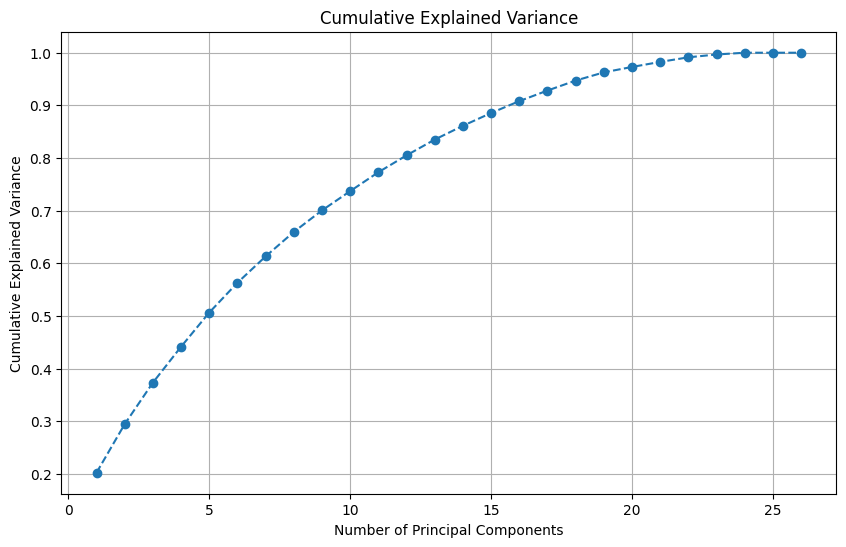

In [ ]:
# Configurando o plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Determinando o número de componentes que explicam uma certa porcentagem de variância (por exemplo, 95%)
desired_variance_explained = 0.95
n_components = (cumulative_variance_ratio < desired_variance_explained).sum() + 1
print(n_components)

19


Como visto acima, serão usados 19 componentes para testar realizar o PCA.

In [ ]:
# Rodando PCA com um número de componentes escolhido
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_train_PCA_cp)

In [ ]:
# Plotando as features mais significativas
feature_names = df_train_PCA_cp.columns
feature_importance = pca.components_[0]  # Considerando as principais componentes

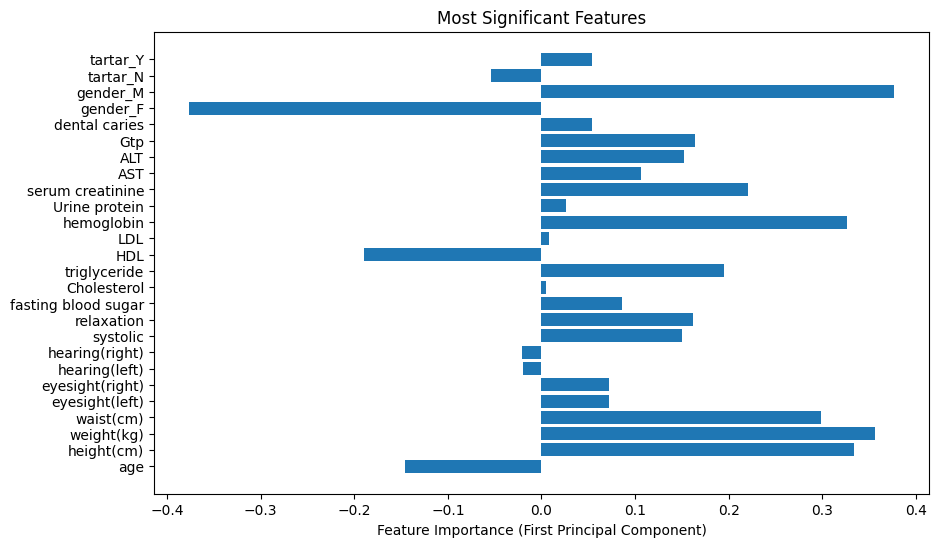

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance (First Principal Component)')
plt.title('Most Significant Features')
plt.show()

Além disso, construímos uma função para automatizar o processo de rodar o PCA

In [ ]:
# Função que roda o PCA
def run_PCA(dataFrame, n_components):
  # Preparando dados
  dataFrame = pd.get_dummies(dataFrame) #oneHot
  dataFrame = (dataFrame - dataFrame.mean()) / dataFrame.std() # Normalizando

  #Instanciando o PCA
  pca = PCA()
  pca_result = pca.fit_transform(dataFrame)

  # Rodando PCA com um número de componentes escolhido
  pca = PCA(n_components=n_components)
  pca_result = pca.fit_transform(dataFrame)

  # Plotando as features mais significativas
  feature_names = dataFrame.columns
  feature_importance = pca.components_[0]  # Considerando as principais componentes
  plt.figure(figsize=(10, 6))
  plt.barh(range(len(feature_importance)), feature_importance, align='center')
  plt.yticks(range(len(feature_importance)), feature_names)
  plt.xlabel('Feature Importance (First Principal Component)')
  plt.title('Most Significant Features')
  plt.show()

Como é possível observar existem alguns dados que pouco contribuem para a descrição geral dos dados.

Transformação Logarítmica: amortizar a taxa de variação exponencial
* Blood Sugar
* AST
* ALT
* Gtp

In [ ]:
log_transform_features = ['fasting blood sugar', 'AST', 'ALT', 'Gtp']

In [ ]:
df_train_transformed[log_transform_features] = np.log1p(df_train[log_transform_features])
#df_train_cp[log_transform_features] = np.log1p(df_train_cp[log_transform_features])
df_test_transformed[log_transform_features] = np.log1p(df_test[log_transform_features])

df_train_PCA_cp = df_train_transformed.copy()

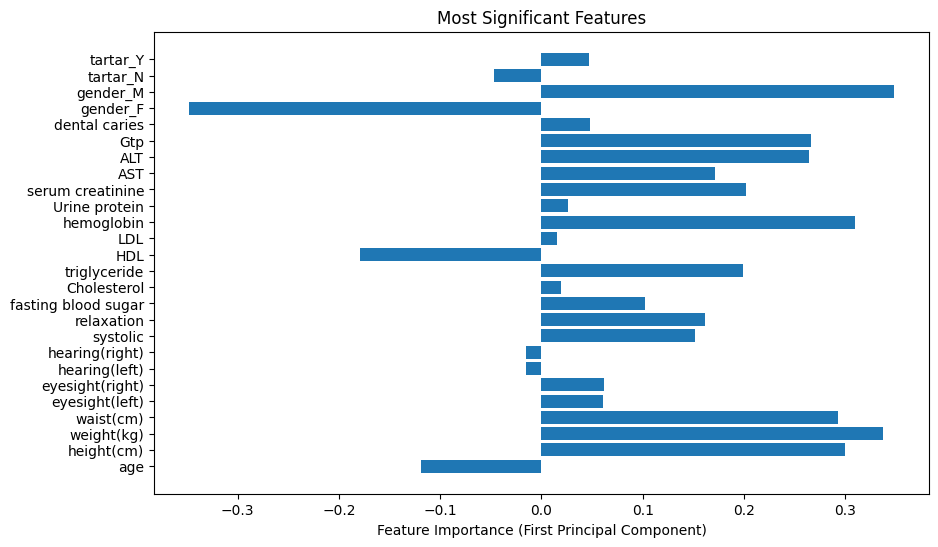

In [ ]:
# Após fazer a transformação, vou rodar o PCA para os novos dados
run_PCA(df_train_PCA_cp, 19)

Como é possível perceber, a transformação não alterou o resultado do PCA, pois só modificou o formato de distribuição de cada feature individualmente (pela transformação logarítmica).

### Análise das novas features

Feature Engeneering:

* Índice de Massa Corporal(IMC):

$$
IMC = \frac{Massa}{(Altura)^2}
$$

* Índice de Adiposidade Corporal (IAC):

$$
IAC = \frac{Cintura}{(Altura)^{1,5}} - 18
$$

* Hearing - Escuta : Média aritimética dos valores no ouvido esquerdo e direito
* Sight - Visão : Média aritimética dos valores no olho esquerdo e direito
* Índice de Perfusão (IP) : Representa a razão entre a Sístole e a Diástole. No caso de fumantes, um sintoma existente é a perda da elasticidade arterial.

* Logo, essa razão pode contribuir para a categorização pelo modelo.
$$
IP = \frac{Sístole}{Diástole}
$$

#### IMC

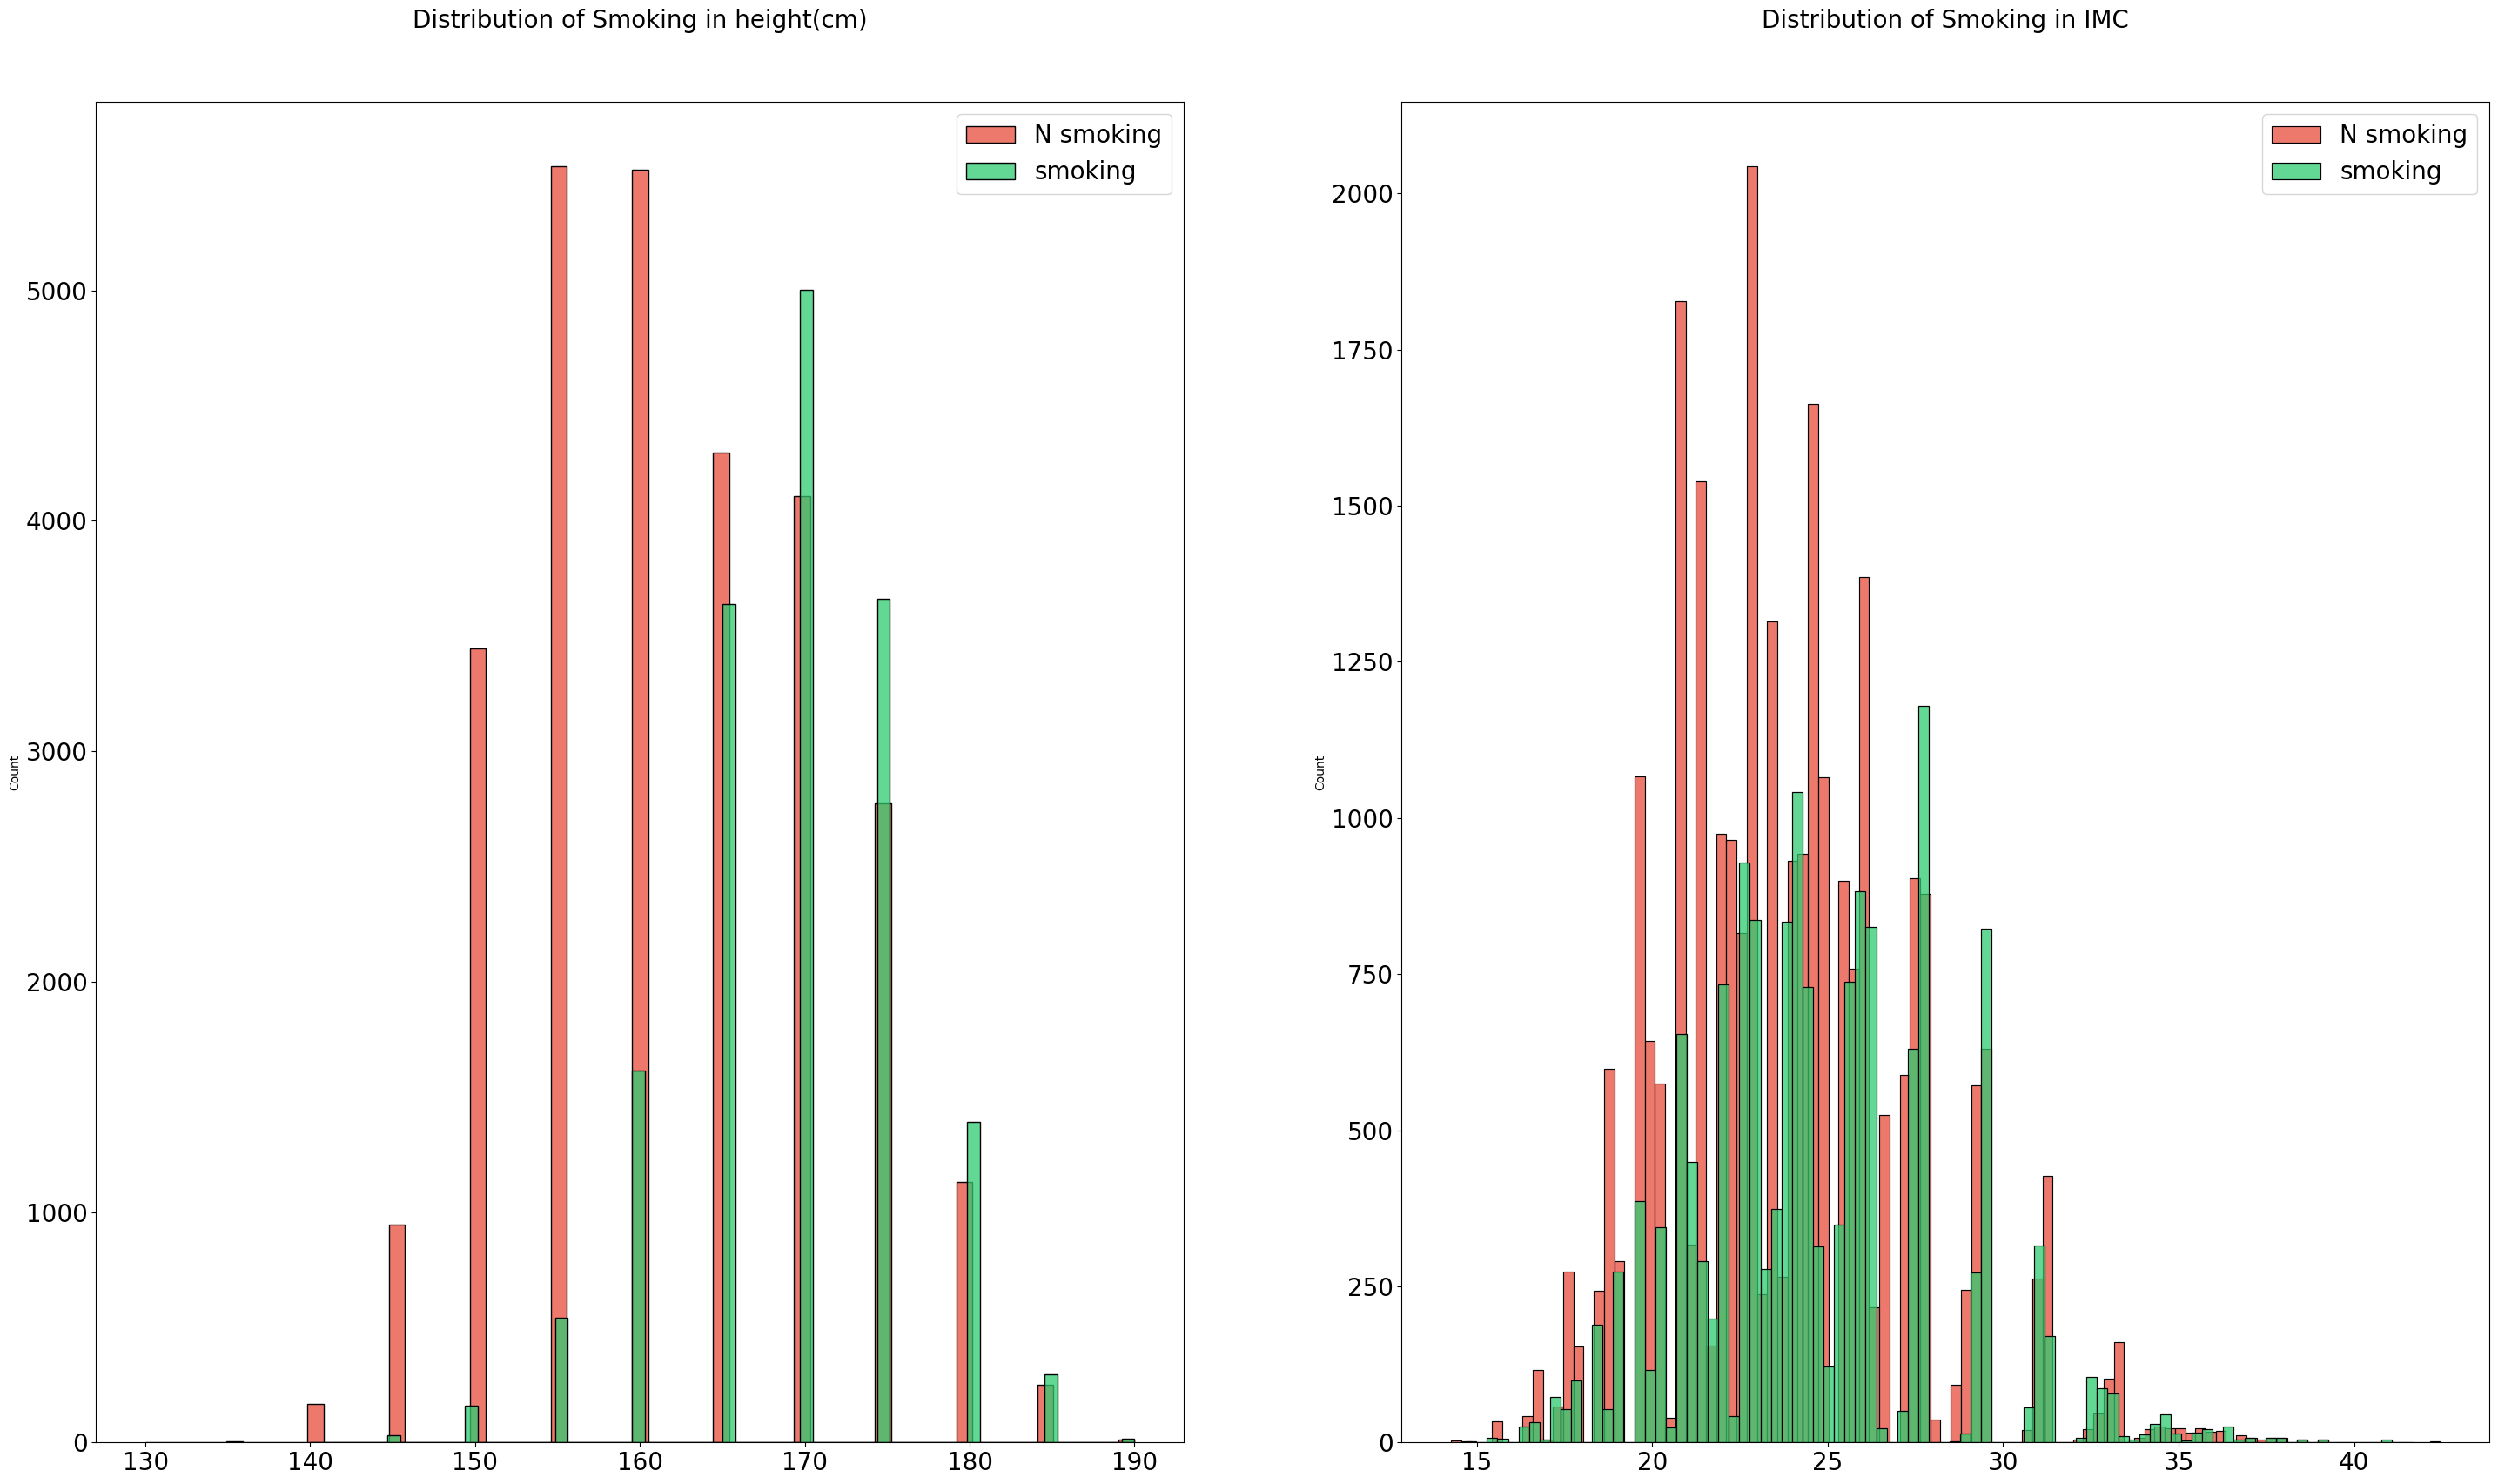

In [ ]:
# Criando a nova feature IMC
df_train_transformed['IMC'] = df_train_transformed['weight(kg)'] / ((df_train_transformed['height(cm)']/100) ** 2)
df_train_transformed['IMC'].round(2)
df_test_transformed['IMC'] = df_test_transformed['weight(kg)'] / ((df_test_transformed['height(cm)']/100) ** 2)
df_test_transformed['IMC'].round(2)

df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

j = df_plot.columns.get_loc('weight(kg)')
cont_features = ['height(cm)', 'IMC']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c', ax=axs[i])
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71', ax=axs[i])

    axs[i].set_xlabel('')

    for j in range(2):
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

    axs[i].legend(loc='upper right', prop={'size': 20})
    axs[i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

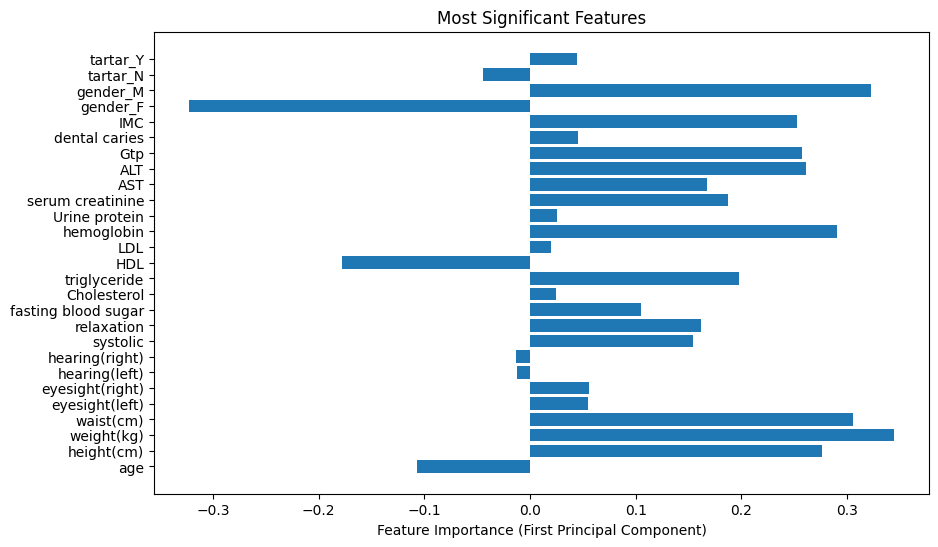

In [ ]:
# vamos verificar como ficou essa nova features IMC:
df_train_PCA_cp = df_train_transformed.copy()
run_PCA(df_train_PCA_cp, 19)

Como é possível observar, a nova feature IMC pode ser classificada visualmente como um feature significativa no que diz respeito à descrição dos dados. Portanto, manteremos a alteração devido o fato da redução de dimensionalidade.

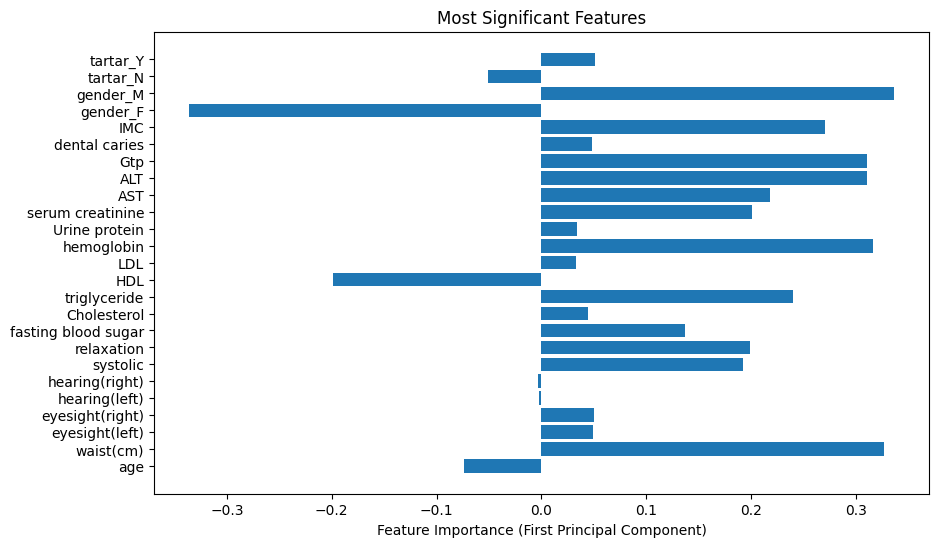

In [ ]:
# Testando o PCA com as colunas removidas
df_train_PCA_cp = df_train_transformed.copy()
df_train_PCA_cp = df_train_PCA_cp.drop(["weight(kg)", "height(cm)"],axis = 1)
run_PCA(df_train_PCA_cp, 19)

Agora, quando removemos as features weight(kg) e height(cm) percebemos o aumento da significância da nova feature IMC. Isso deve ser explicado pelo fato de que a ausência das features weight(kg) e height(cm) foi preenchida pela nova importância da feature IMC (que agora compila a informação outrora contida nas antigas features.

#### IAC

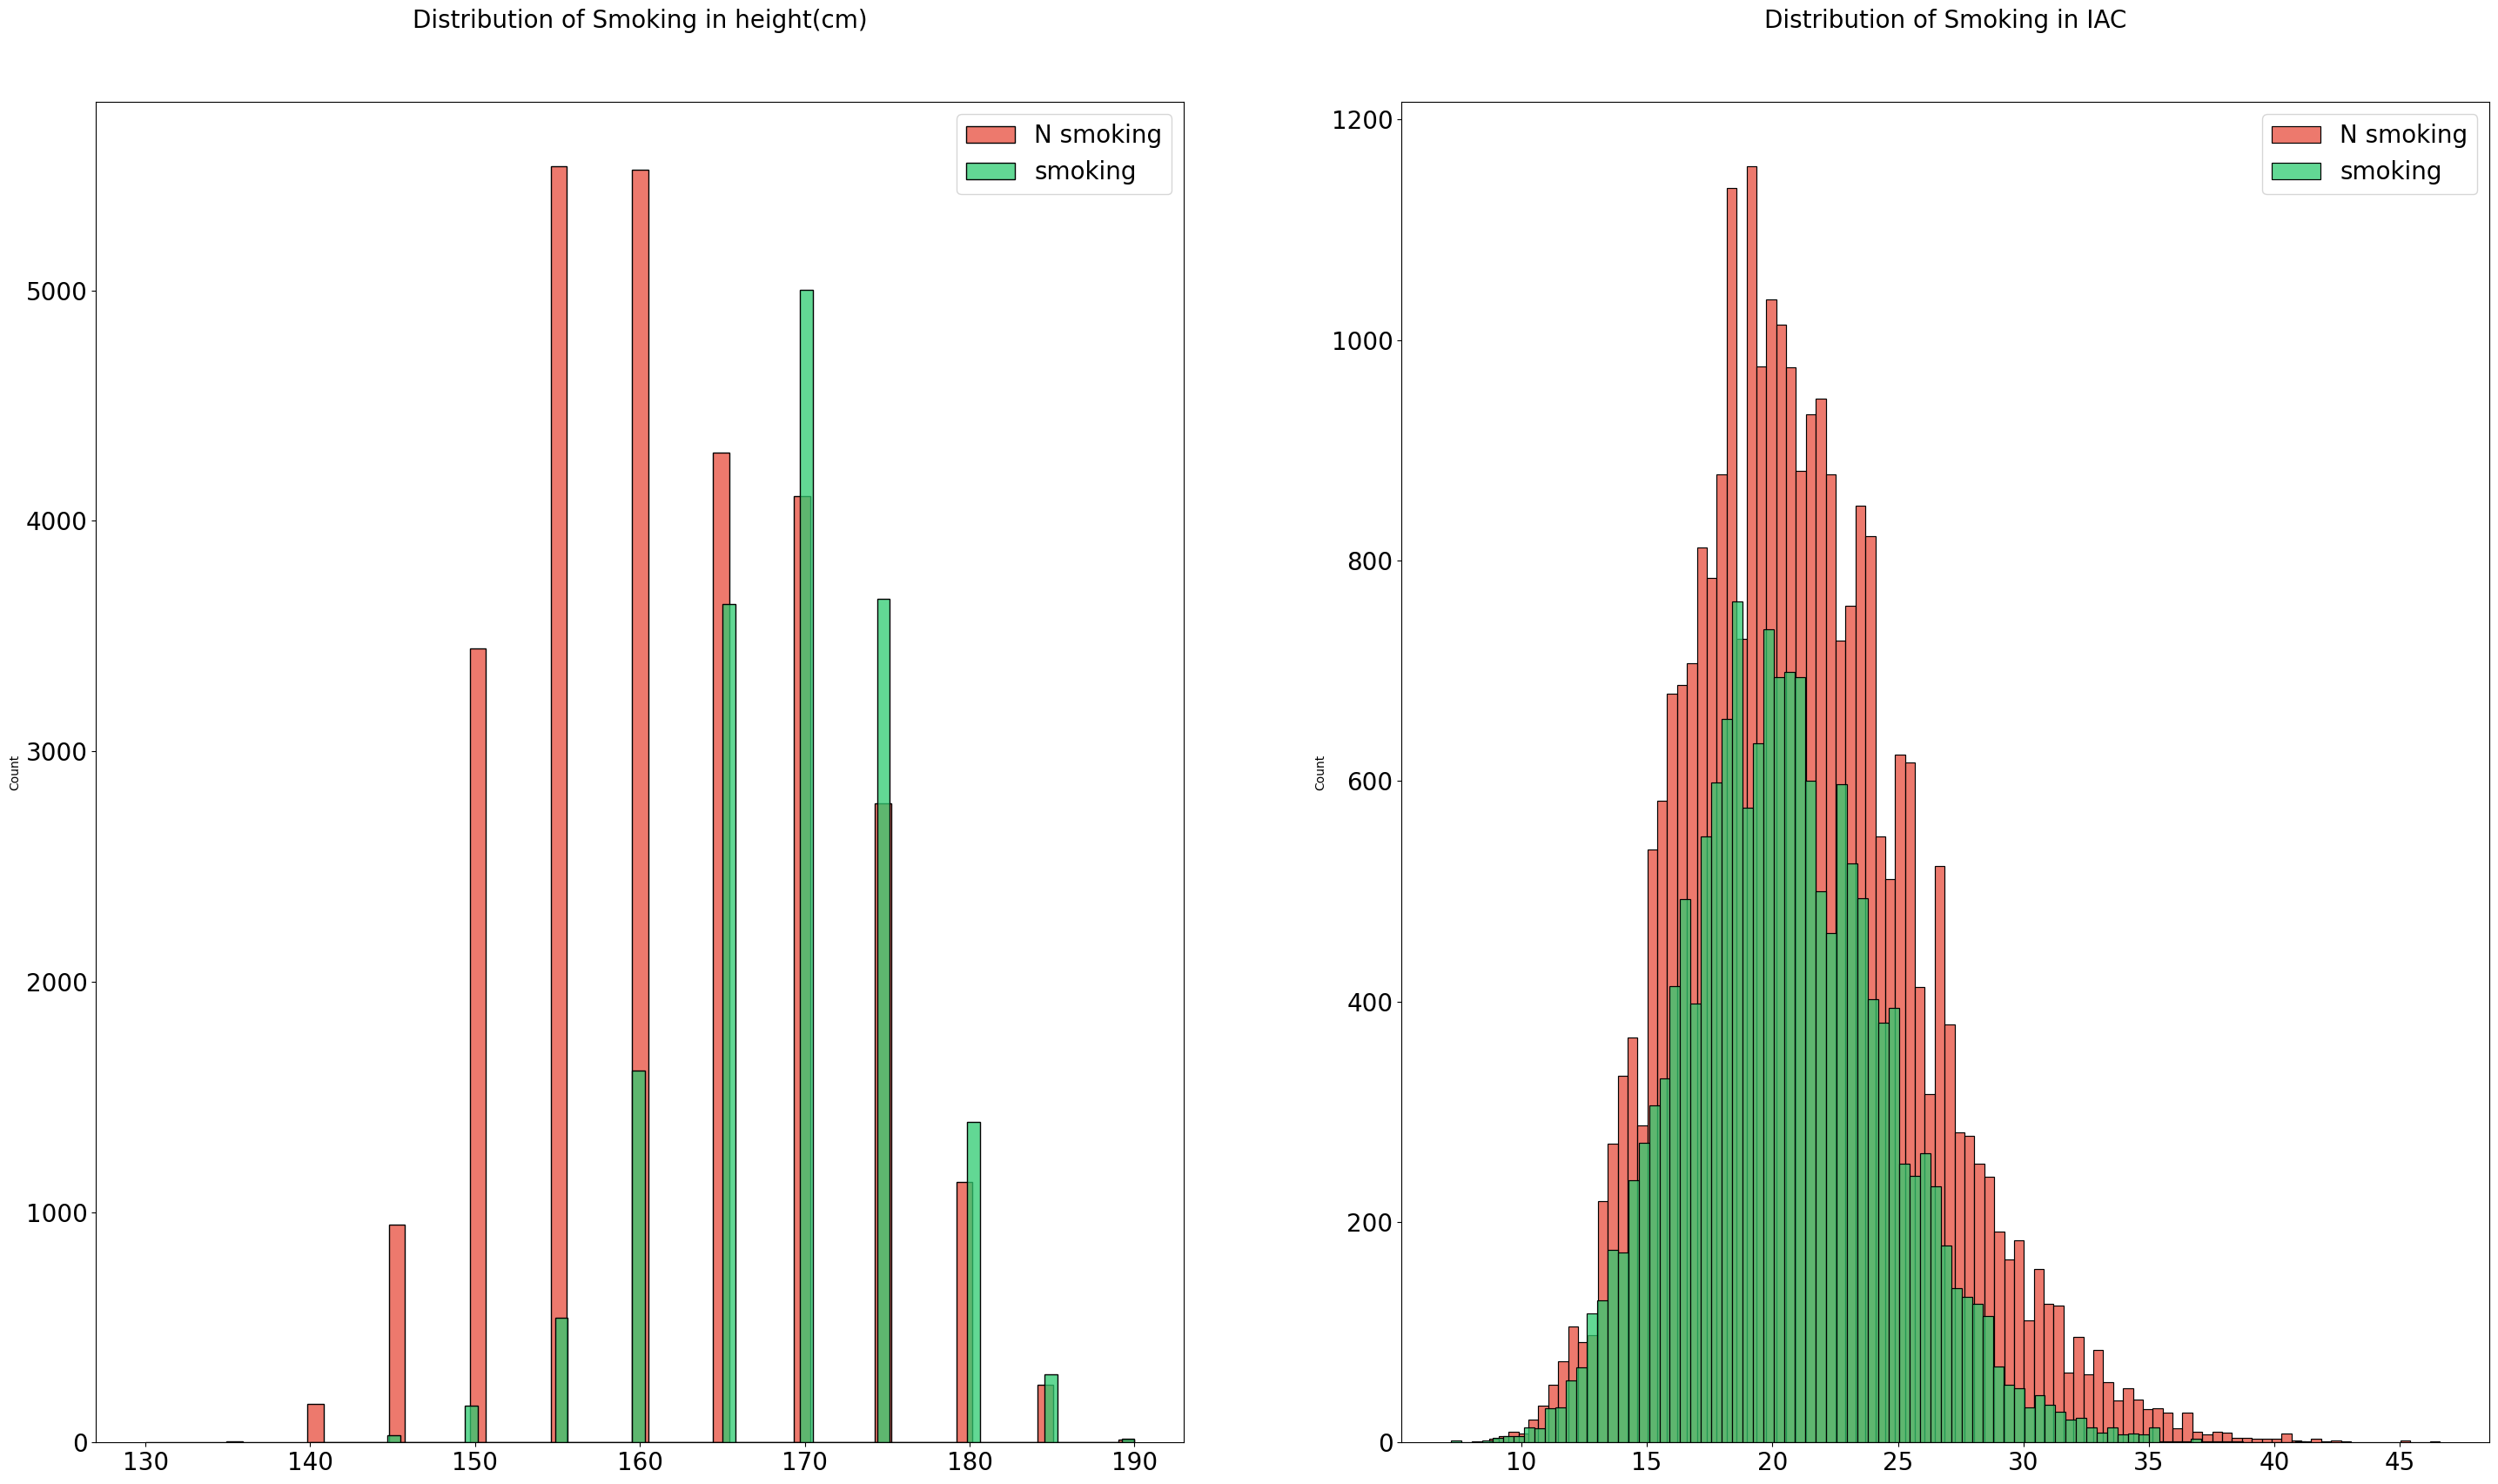

In [ ]:
# Criando a nova feature IAC
df_train_transformed['IAC'] = (df_train_transformed['waist(cm)'] / (df_train_transformed['height(cm)']/100)**(1.5)) - 18
df_train_transformed.round(2)
df_test_transformed['IAC'] = (df_test_transformed['waist(cm)'] / (df_test_transformed['height(cm)']/100)**(1.5)) - 18
df_test_transformed.round(2)

df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

j = df_plot.columns.get_loc('weight(kg)')
cont_features = ['height(cm)', 'IAC']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c', ax=axs[i])
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71', ax=axs[i])

    axs[i].set_xlabel('')

    for j in range(2):
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

    axs[i].legend(loc='upper right', prop={'size': 20})
    axs[i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

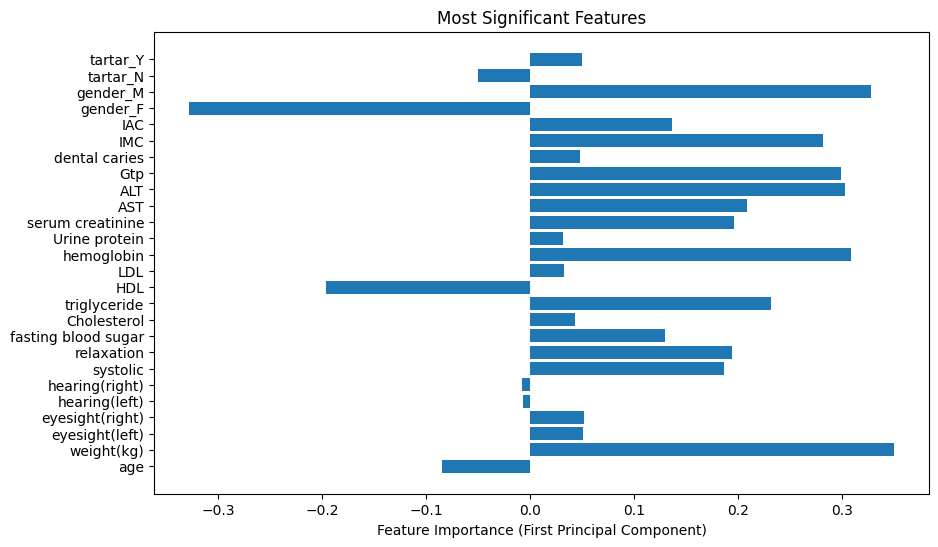

In [ ]:
# vamos verificar como ficou essa nova features IAC:
df_train_PCA_cp = df_train_transformed.copy()
df_train_PCA_cp = df_train_PCA_cp.drop(["waist(cm)", "height(cm)"], axis=1)
run_PCA(df_train_PCA_cp, 19)

É possível perceber visualmente que a nova feature IAC não conseguiu ser tão significante para representação dos dados como IMC mesmo removendo as features que compunham o IAC. Conclui-se que IAC não apresenta mudança significativa que valha a pena.

#### IP

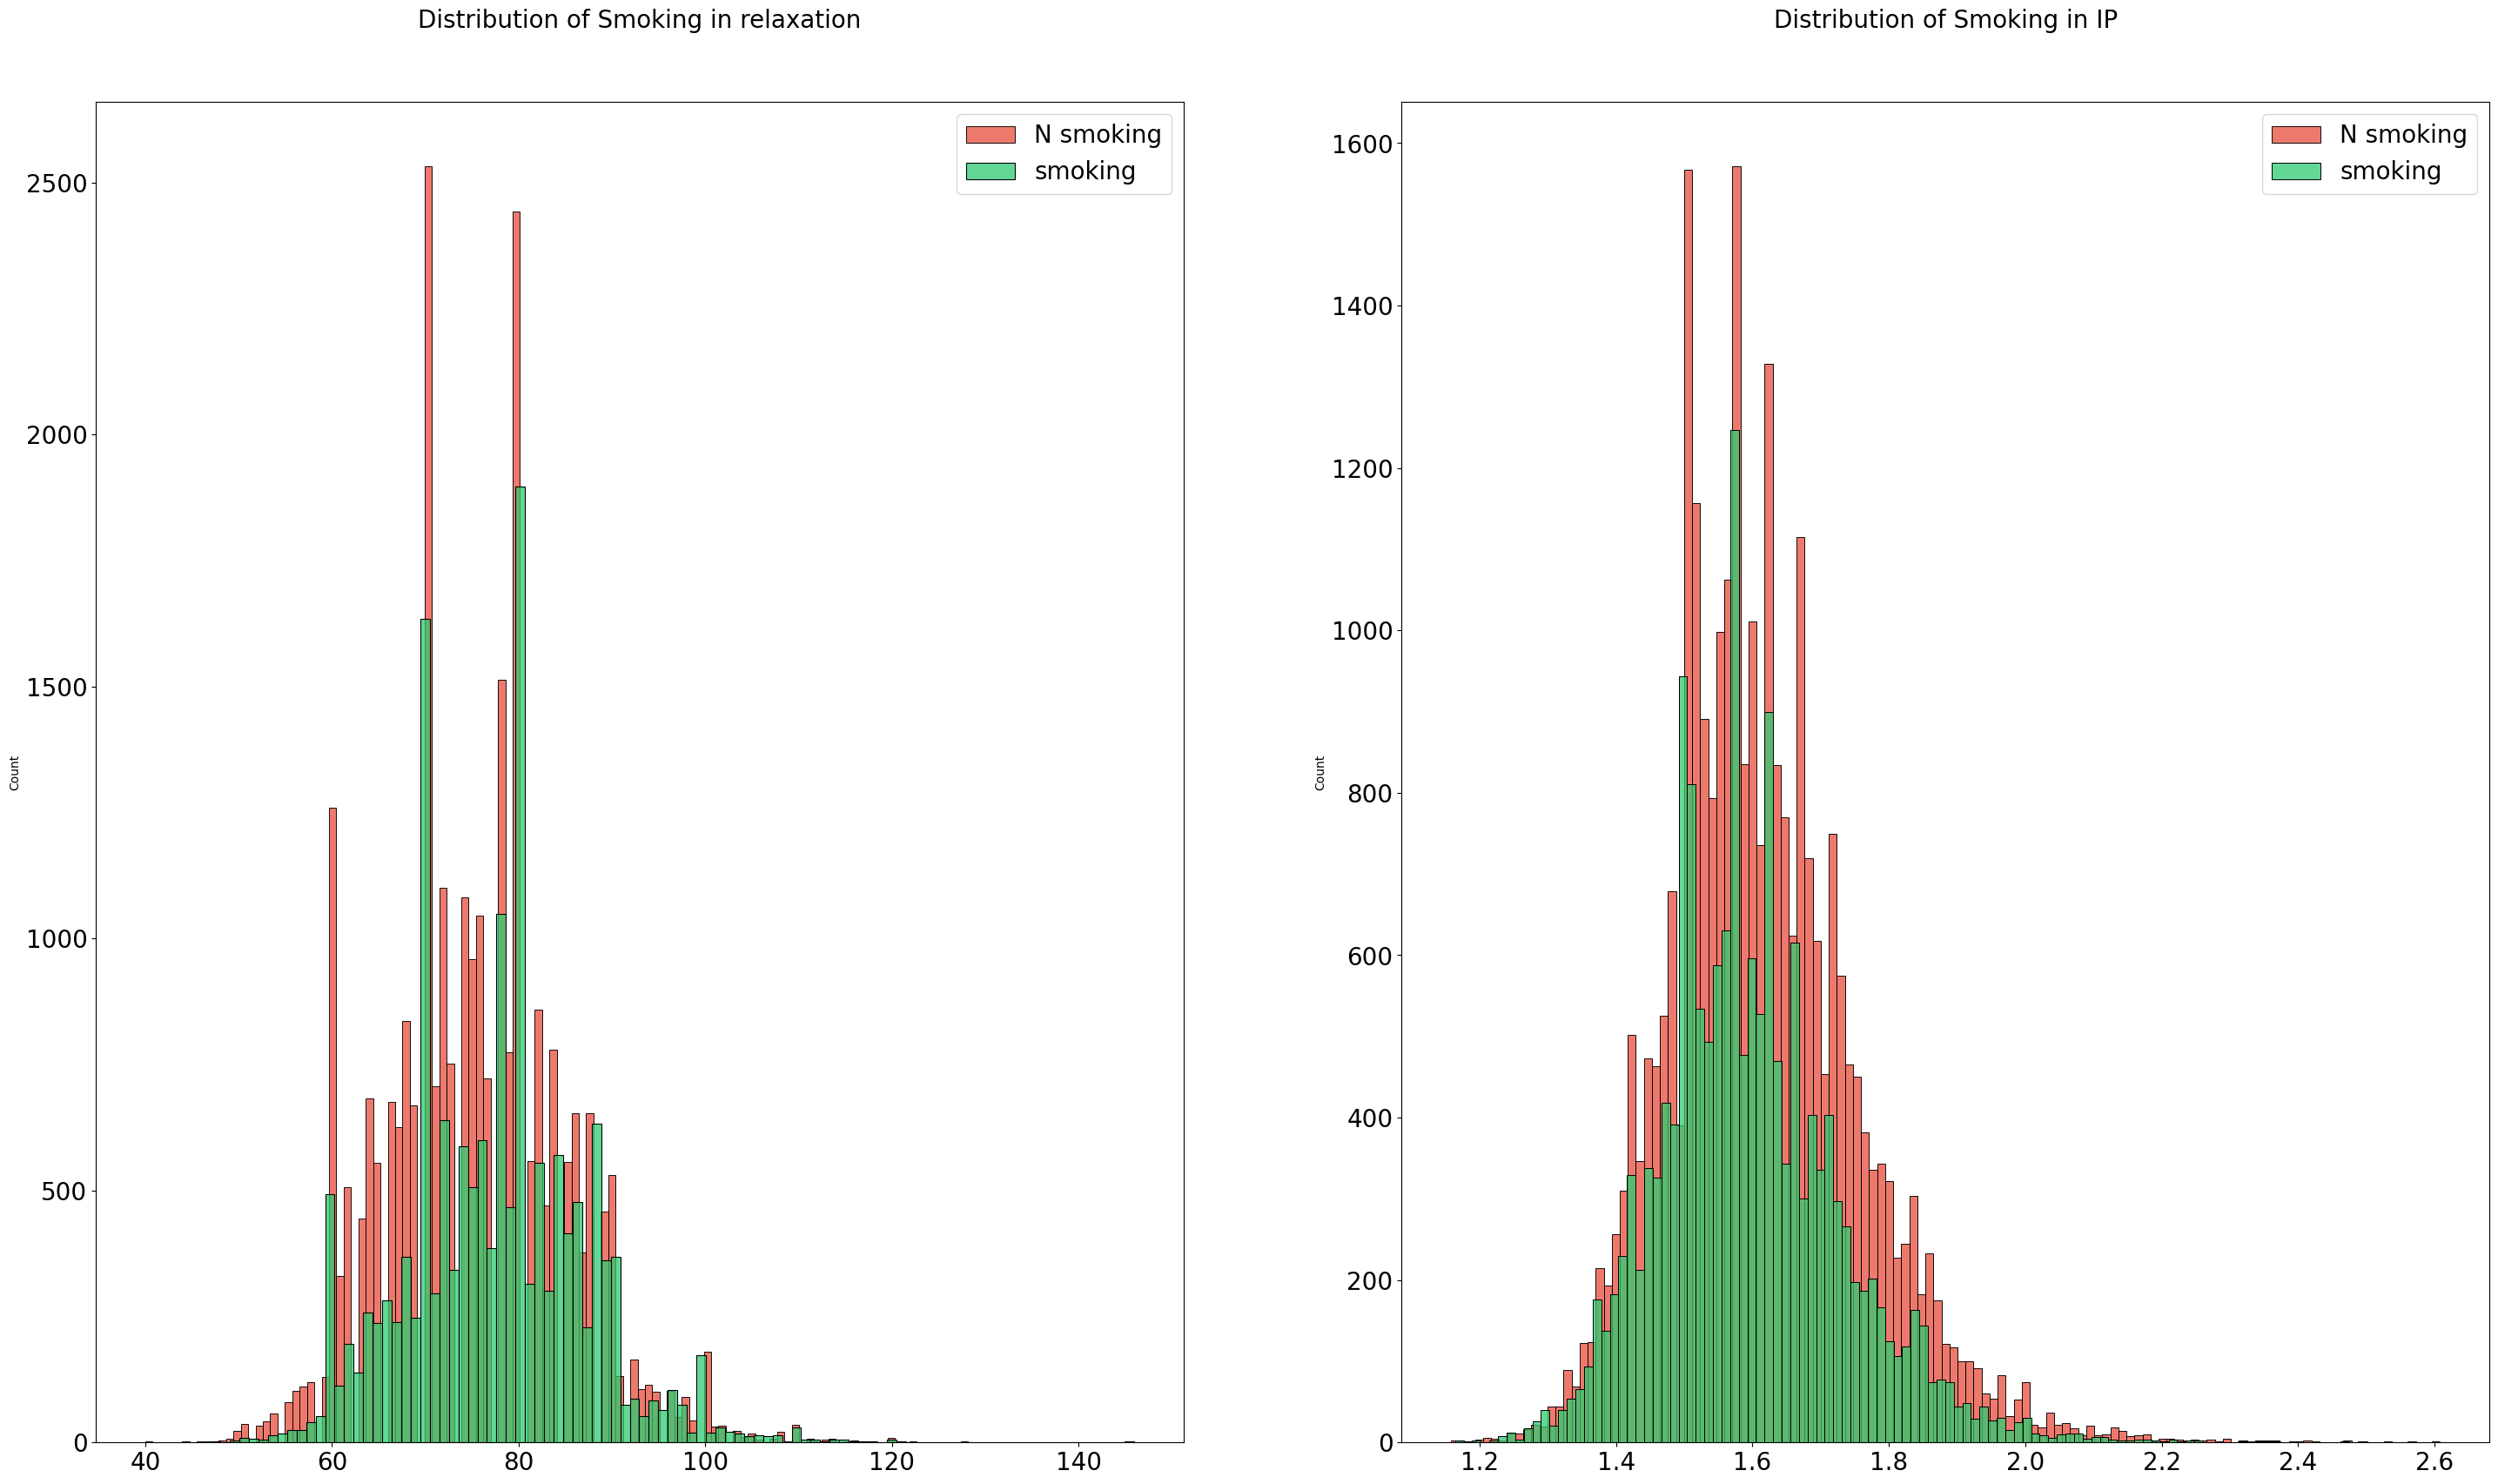

In [ ]:
# Criando a nova feature IP
df_train_transformed['IP'] = (df_train_transformed['systolic'] / (df_train_transformed['relaxation']))
df_train_transformed.round(2)
df_test_transformed['IP'] = (df_test_transformed['systolic'] / (df_test_transformed['relaxation']))
df_test_transformed.round(2)

df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

j = df_plot.columns.get_loc('systolic')
cont_features = ['relaxation', 'IP']
smoking = df_plot['smoking'] == 1

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.histplot(df_plot[~smoking][feature], label='N smoking', color='#e74c3c', ax=axs[i])
    sns.histplot(df_plot[smoking][feature], label='smoking', color='#2ecc71', ax=axs[i])

    axs[i].set_xlabel('')

    for j in range(2):
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

    axs[i].legend(loc='upper right', prop={'size': 20})
    axs[i].set_title('Distribution of Smoking in {}'.format(feature), size=20, y=1.05)

plt.show()

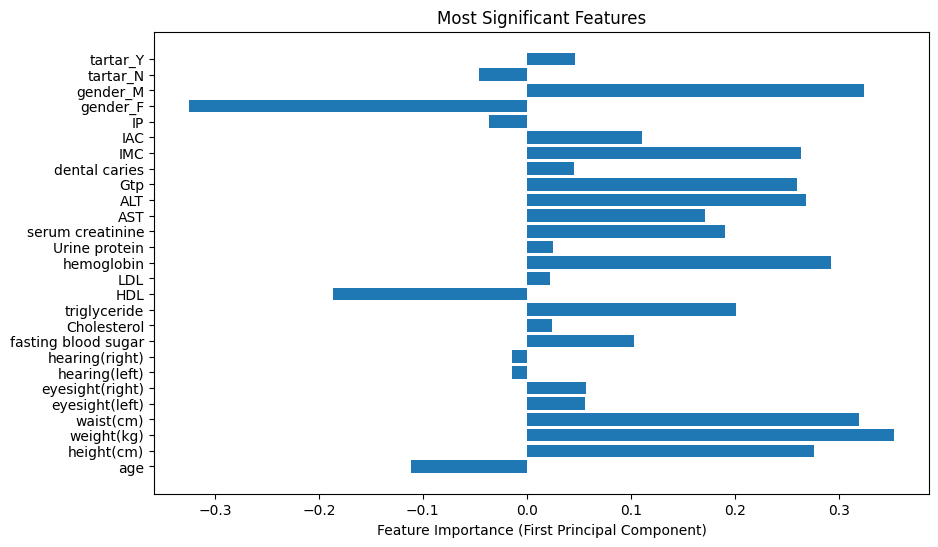

In [ ]:
df_train_PCA_cp = df_train_transformed.copy()
df_train_PCA_cp = df_train_PCA_cp.drop(["systolic","relaxation"],axis=1)
run_PCA(df_train_PCA_cp, 19)

Como é possível perceber visualmente, a importância das features relaxation e systolic eram bem maiores comparadas à nova feature IP. Conclui-se que a mudança piora o significado das features.

#### hearing

Transformação categórica: Alguns dos dados numéricos no dataset parecem bem discretizados. Nossa pretenção é transformá-los em categóricos, evitando más interepretações da informação através de métricas numéricas.

Entre eles estão visão esquerda e direita e audição esquerda e direita e cáries dentarias

Audição: Foi somado a audição do ouvido esquerdo e do direito, assim o valor 2 significaria audição boa em ambos ouvidos, 3 audição ruim em um deles e 4 surdez.

No final não teve números muito altos de meio surdos e surdos, mas ao menos como se pode ver no barplot, a distribuição de fumantes entre elas varia

In [ ]:
df_train_transformed["hearing"] = df_train_transformed["hearing(left)"] + df_train_transformed["hearing(right)"]
df_train_transformed['hearing'] = df_train_transformed['hearing'].apply(lambda x: 'boa' if x ==2 else ('meio surdo' if x == 3 else 'surdo'))
df_test_transformed["hearing"] = df_test_transformed["hearing(left)"] + df_test_transformed["hearing(right)"]
df_test_transformed['hearing'] = df_test_transformed['hearing'].apply(lambda x: 'boa' if x ==2 else ('meio surdo' if x == 3 else 'surdo'))

In [ ]:
value_counts = df_train_transformed['hearing'].value_counts()

value_counts

boa           42849
meio surdo     1107
surdo           597
Name: hearing, dtype: int64

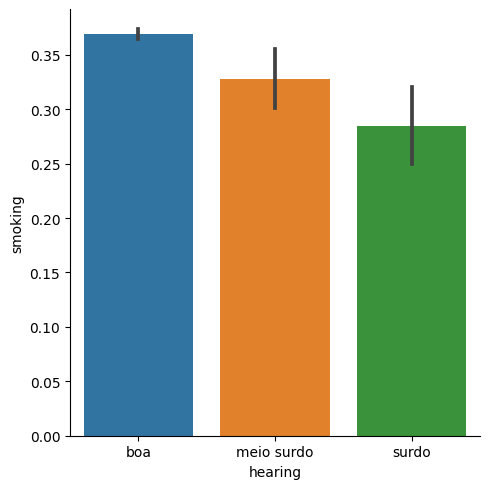

In [ ]:
df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

sns.catplot(data=df_plot, x="hearing", y="smoking" ,kind="bar")

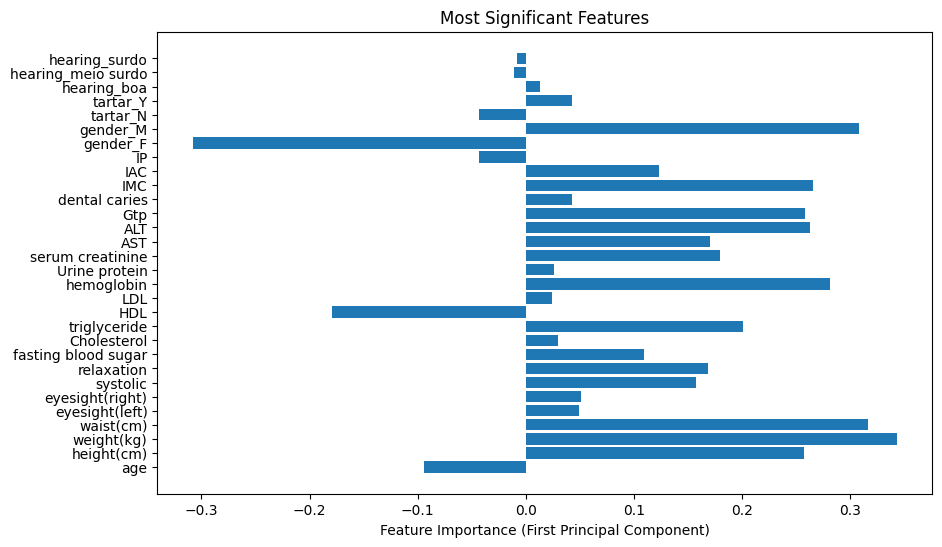

In [ ]:
df_train_PCA_cp = df_train_transformed.copy()
df_train_PCA_cp = df_train_PCA_cp.drop(["hearing(left)","hearing(right)"],axis=1)
run_PCA(df_train_PCA_cp, 19)

Aparentemente, a importância das features hearing(right) e hearing(left) que já era baixa, permaneceu baixa. A mudança não teve grandes impactos

#### Dental caries

Cárie foi só transformar mesmo para categórico ao invés de númerico, 1 vira Y, 0 vira N

No fim, esse tem uma distribuição melhor do que os surdos e também uma diferença na proproção de fumantes nas classes

In [ ]:
df_train_transformed['dental caries'] = df_train_transformed['dental caries'].apply(lambda x: 'Y' if x ==1  else 'N')
df_test_transformed['dental caries'] = df_test_transformed['dental caries'].apply(lambda x: 'Y' if x ==1  else 'N')

In [ ]:
value_counts = df_train_transformed['dental caries'].value_counts()

value_counts

N    35040
Y     9513
Name: dental caries, dtype: int64

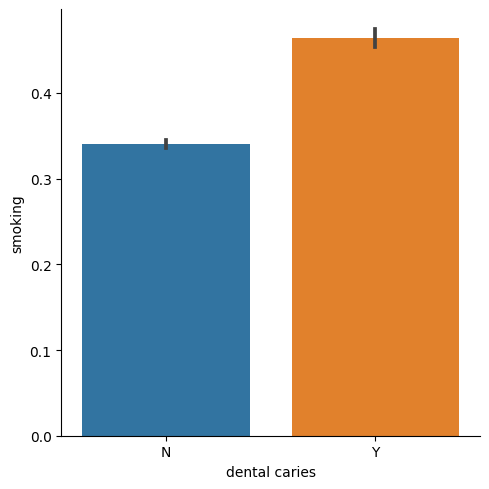

In [ ]:
df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

sns.catplot(data=df_plot, x="dental caries", y="smoking" ,kind="bar")

Nesse caso não o PCA para essa variável ficará inalterado (assim como na transformação logarítmica).

#### Eyesight

Já a visão não sabíamos com toda a certeza o significado dos valores então tentamos concluir um.

Primeiro que os valores variam de 0.1 até 2.5, dando de repente um salto para 9.9. Esse 9.9 já sabemos pelo kaggle que é cegueira, e então dividimos o range de 0 a 1 como visão boa, 1 a 2 como media, 2 a 2.5 como ruim acima disso como meio cego e 9.9 como cega e fizemos a média da visão dos dois olhos para gerar uma feature só, visão.

No fim, descobrimos que nos dados de teste não havia nenhum cego por completo, então juntamos o meio cego e o cego em uma só, cego tinha poucas amostras no dado de treino entao acreditamos que nao va afetar muito.

A proporção entre boa e mediana foi balanceada, mas no fim ficamos com pouquissimos meio cegos, e ainda com uma distribuição semelhante aos medianos,

In [ ]:
df_train_transformed["eyesight"] = (df_train_transformed["eyesight(left)"] + df_train_transformed["eyesight(right)"]) / 2
df_train_transformed['eyesight'] = df_train_transformed['eyesight'].apply(lambda x: 'boa' if x <= 1 else ('mediana' if x <= 2 else ('ruim' if x <= 2.5 else "meio cega")))
df_test_transformed["eyesight"] = (df_test_transformed["eyesight(left)"] + df_test_transformed["eyesight(right)"]) / 2
df_test_transformed['eyesight'] = df_test_transformed['eyesight'].apply(lambda x: 'boa' if x <= 1 else ('mediana' if x <= 2 else ('ruim' if x <= 2.5 else "meio cega")))

In [ ]:
value_counts = df_test_transformed['eyesight'].value_counts()
value_counts

boa          6150
mediana      4954
meio cega      35
Name: eyesight, dtype: int64

In [ ]:
# Abordagem antiga, com cegos
# boa          24732
# mediana      19682
# meio cega      129
# cega            10
value_counts = df_train_transformed['eyesight'].value_counts()
value_counts

boa          24732
mediana      19682
meio cega      139
Name: eyesight, dtype: int64

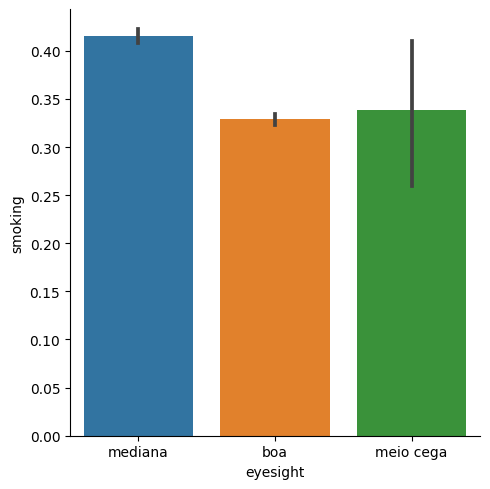

In [ ]:
df_plot = df_train_transformed.copy()
df_plot['smoking'] = y_train['smoking']

sns.catplot(data=df_plot, x="eyesight", y="smoking" ,kind="bar")

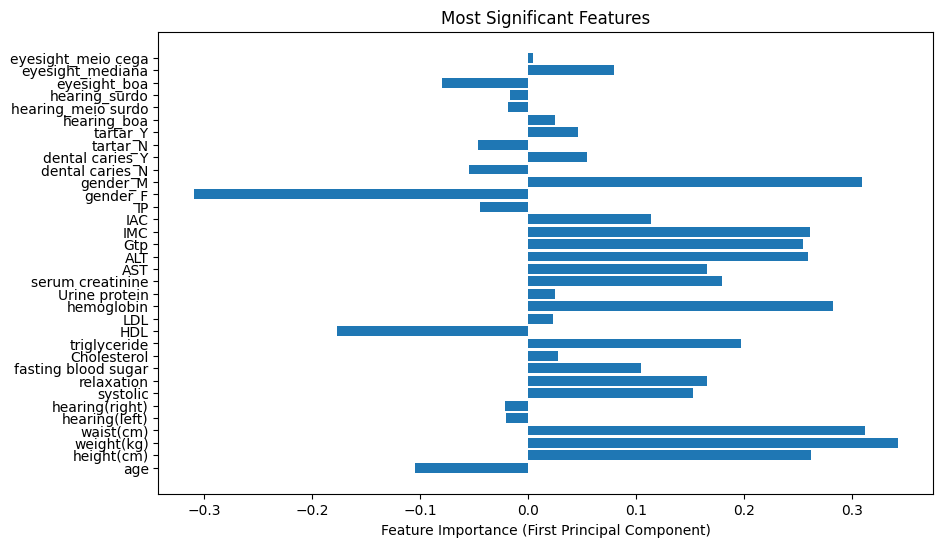

In [ ]:
df_train_PCA_cp = df_train_transformed.copy()
df_train_PCA_cp = df_train_PCA_cp.drop(["eyesight(left)", "eyesight(right)"], axis=1)
run_PCA(df_train_PCA_cp, 19)

É possível perceber que a mudança aumentou bastante a importância dos dados eyesight para representação dos dados. Conclui-se que a mudança será mantida.

#### Dropando as features em df_train_fransformed e df_test_transformed.

Por fim, dropamos as features originais utilizadas para gerar as novas

In [ ]:
df_train_transformed = df_train_transformed.drop(columns=["weight(kg)","height(cm)","hearing(left)","hearing(right)","eyesight(left)",	"eyesight(right)", "IP", "IAC"])
df_test_transformed = df_test_transformed.drop(columns=["weight(kg)","height(cm)","hearing(left)",	"hearing(right)","eyesight(left)",	"eyesight(right)", "IP", "IAC"])

#Caso manter o IP
#df_train_transformed = df_train_transformed.drop(columns=["weight(kg)","height(cm)","systolic","relaxation","hearing(left)",	"hearing(right)","eyesight(left)",	"eyesight(right)"])
#df_test_transformed = df_test_transformed.drop(columns=["weight(kg)","height(cm)","systolic",	"relaxation","hearing(left)",	"hearing(right)","eyesight(left)",	"eyesight(right)"])

# Caso IAC
#df_train_transformed = df_train_transformed.drop(columns=["waist(cm)"])
#df_test_transformed = df_test_transformed.drop(columns=["waist(cm)"])

In [ ]:
for col in df_train_transformed.columns:
  print(col)

gender
age
waist(cm)
systolic
relaxation
fasting blood sugar
Cholesterol
triglyceride
HDL
LDL
hemoglobin
Urine protein
serum creatinine
AST
ALT
Gtp
dental caries
tartar
IMC
hearing
eyesight


### Conclusão acerca das mudanças nas features

A mudança em relação ao IAC e em relação ao IP piorou a representação dos dados, no sentido de que a significância relativa dos dados que compunham essas novas features era maior do que quando essas antigas features foram compiladas em novas.
Nesse sentido, não é interessante para nossos modelos utilizar a mudança IAC e IP.
Somado a isso, as demais mudanças acarrentaram em ganho de significado em relação às antigas features. Desse modo, vamos continuar com as mudanças

# Testando modelos

##Selecionando dados

In [ ]:
#baseline
# df_train_modelo = df_train
# df_test_modelo =  df_test

# Primeira mudança
df_train_modelo = df_train_transformed
df_test_modelo = df_test_transformed

### Onehot encoding

In [ ]:
df_train_modelo = pd.get_dummies(df_train_modelo)
df_train_modelo

age  waist(cm)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0       40       81.3     114.0        73.0             4.553877        215.0   
1       40       81.0     119.0        70.0             4.875197        192.0   
2       55       80.0     138.0        86.0             4.499810        242.0   
3       40       88.0     100.0        60.0             4.574711        322.0   
4       40       86.0     120.0        74.0             4.394449        184.0   
...    ...        ...       ...         ...                  ...          ...   
44548   50       88.0     148.0        94.0             4.634729        182.0   
44549   35       84.0     105.0        74.0             4.488636        187.0   
44550   35       70.9     116.0        70.0             4.564348        145.0   
44551   50      106.8     122.0        75.0             4.521789        179.0   
44552   25       93.2     124.0        76.0             4.369448        197.0   

       triglyceride   HDL    LDL  hemoglobin  ...  dental caries_N  \
0              82.0  73.0  126.0        12.9  ...                1   
1             115.0  42.0  127.0        12.7  ...                1   
2             182.0  55.0  151.0        15.8  ...                1   
3             254.0  45.0  226.0        14.7  ...                1   
4              74.0  62.0  107.0        12.5  ...                1   
...             ...   ...    ...         ...  ...              ...   
44548         168.0  40.0  108.0        15.2  ...                1   
44549          60.0  57.0  118.0        15.2  ...                1   
44550          58.0  41.0   92.0        13.4  ...                1   
44551         139.0  47.0  104.0        14.5  ...                1   
44552          51.0  49.0  138.0        11.4  ...                1   

       dental caries_Y  tartar_N  tartar_Y  hearing_boa  hearing_meio surdo  \
0                    0         0         1            1                   0   
1                    0         0         1            1                   0   
2                    0         1         0            1                   0   
3                    0         0         1            1                   0   
4                    0         1         0            1                   0   
...                ...       ...       ...          ...                 ...   
44548                0         0         1            1                   0   
44549                0         0         1            1                   0   
44550                0         0         1            1                   0   
44551                0         0         1            1                   0   
44552                0         0         1            1                   0   

       hearing_surdo  eyesight_boa  eyesight_mediana  eyesight_meio cega  
0                  0             0                 1                   0  
1                  0             1                 0                   0  
2                  0             1                 0                   0  
3                  0             0                 1                   0  
4                  0             1                 0                   0  
...              ...           ...               ...                 ...  
44548              0             0                 1                   0  
44549              0             1                 0                   0  
44550              0             0                 1                   0  
44551              0             1                 0                   0  
44552              0             0                 1                   0  

[44553 rows x 28 columns]

In [ ]:
df_test_modelo = pd.get_dummies(df_test_modelo)
df_test_modelo

age  waist(cm)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0       80       91.0     120.0        80.0             4.727388        169.0   
1       30       98.0     136.0        83.0             4.574711        243.0   
2       40       81.0     138.0        86.0             4.532599        163.0   
3       35       80.0     160.0       100.0             4.615121        248.0   
4       35       93.0     125.0        80.0             4.770685        213.0   
...    ...        ...       ...         ...                  ...          ...   
11134   40       75.0     110.0        68.0             4.499810        213.0   
11135   45       70.0     101.0        62.0             4.499810        166.0   
11136   55       68.5     117.0        72.0             4.488636        158.0   
11137   60       78.0     133.0        76.0             4.682131        210.0   
11138   55       85.0     124.0        75.0             4.418841        213.0   

       triglyceride   HDL    LDL  hemoglobin  ...  dental caries_N  \
0              67.0  61.0   94.0        14.5  ...                1   
1             100.0  58.0  165.0        15.6  ...                1   
2             215.0  37.0   98.0        16.4  ...                1   
3             175.0  53.0  160.0        15.3  ...                1   
4             113.0  58.0  132.0        14.7  ...                1   
...             ...   ...    ...         ...  ...              ...   
11134          99.0  75.0  118.0        12.3  ...                0   
11135          69.0  73.0   79.0        14.0  ...                1   
11136          77.0  79.0   63.0        12.4  ...                1   
11137          79.0  48.0  146.0        14.4  ...                1   
11138         142.0  34.0  150.0        15.0  ...                1   

       dental caries_Y  tartar_N  tartar_Y  hearing_boa  hearing_meio surdo  \
0                    0         1         0            1                   0   
1                    0         1         0            1                   0   
2                    0         1         0            1                   0   
3                    0         1         0            1                   0   
4                    0         1         0            1                   0   
...                ...       ...       ...          ...                 ...   
11134                1         0         1            1                   0   
11135                0         0         1            1                   0   
11136                0         1         0            1                   0   
11137                0         1         0            1                   0   
11138                0         0         1            1                   0   

       hearing_surdo  eyesight_boa  eyesight_mediana  eyesight_meio cega  
0                  0             1                 0                   0  
1                  0             0                 1                   0  
2                  0             0                 1                   0  
3                  0             1                 0                   0  
4                  0             0                 1                   0  
...              ...           ...               ...                 ...  
11134              0             1                 0                   0  
11135              0             0                 1                   0  
11136              0             0                 1                   0  
11137              0             1                 0                   0  
11138              0             1                 0                   0  

[11139 rows x 28 columns]

### Label encoding

In [ ]:
# Abordagem no fim descartada pelo onehot ter se mostrado melhor e pra poupar tempo

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# obj_cols = ["tartar", "gender"]

# for obj_col in obj_cols:
#     values = df_train_modelo[obj_col].values
#     encoder.fit(values)
#     df_train_modelo[obj_col] = encoder.transform(values)


In [ ]:
# for obj_col in obj_cols:
#     values = df_test_modelo[obj_col].values
#     encoder.fit(values)
#     df_test_modelo[obj_col] = encoder.transform(values)

### Normalizando

In [ ]:
df_train_modelo=(df_train_modelo-df_train_modelo.min())/(df_train_modelo.max()-df_train_modelo.min())
df_test_modelo=(df_test_modelo-df_test_modelo.min())/(df_test_modelo.max()-df_test_modelo.min())
  #ou
#df_train_modelo=(df_train_modelo-df_train_modelo.mean())/df_train_modelo.std()
#df_test_modelo=(df_test_modelo-df_test_modelo.mean())/df_test_modelo.std()

Como os dados ja vem separados em csv, acho que nao precisa mas ta ai

In [ ]:
#from sklearn.model_selection import train_test_split

# Os originais estao com y minusculo
#X_train, X_test, Y_train, Y_test = train_test_split(
 #       df_train_modelo, y_train, test_size=0.20, random_state=42)

In [ ]:
X_train = df_train_modelo
X_test = df_test_modelo
Y_train = y_train['smoking']
Y_test = y_test['smoking']

## Modelos

Na baseline, seguimos mais ou menos a solução do titanic disponibilizada pelo professor, por isso apenas esses três modelos.

Com a primeira mudança, testamos um monte de modelos, fazendo um gráfico para comparar a performance deles e assim na próxima mudança, utilizarmos os que apresentaram melhor desempenho

### Knn

Nos primeiros testes, fomos percebendo que geralmente k maiores acabavam sendo selecionados, assim aumentamos o range. Antes também avaliávmaos três métricas de distância, mas deixamos só a euclidiana nos teste finais pois ela sempre estava demonstrando score superior nos outros testes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = [{'n_neighbors': np.arange(70, 85, 2)}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                    scoring='roc_auc', return_train_score=False,verbose=1)

# fitting the model for grid search
model.fit(X_train, Y_train)
print(model.best_params_)
model.score(X_train, Y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'n_neighbors': 80}


0.8421311303619925

### Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb = GaussianNB()
param={'var_smoothing': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

# defining parameter range
model = GridSearchCV(estimator = nb, param_grid = param, cv=10,
                    scoring='roc_auc', return_train_score=False,verbose=1)

# fitting the model for grid search
model.fit(X_train, Y_train)
print(model.best_params_)
model.score(X_train, Y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'var_smoothing': 0.001}


0.8004275561073982

### Decision tree

Nos primeiros teste, fomos percebendo que para n maiores, o modelo tendia a ter um desempenho melhor, por isso aumentamos o inicio do range

Melhor n: 73  AUC: 0.7449497485662178


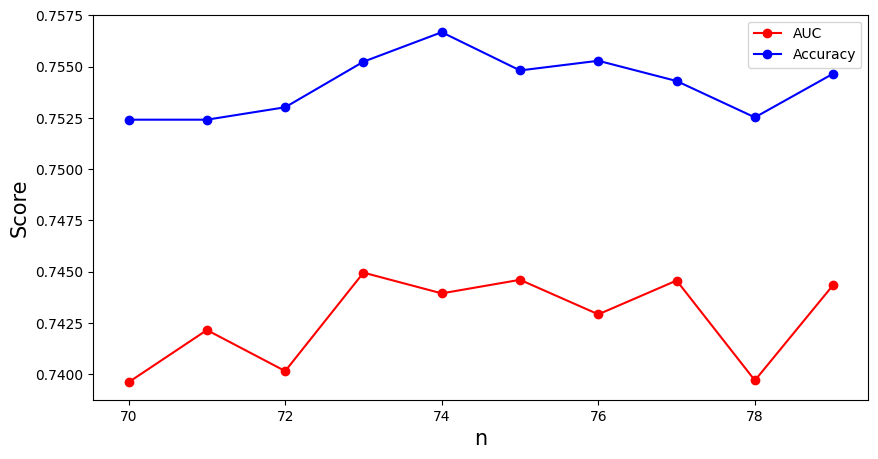

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
x = X_train.to_numpy()
y = Y_train.to_numpy()
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
ini = 70
fim = 80
for n in range(ini, fim):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(x, y):
        # select rows
        x_t, x_validation = x[train_index], x[test_index]
        y_t, y_validation = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation)
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+ini
print('Melhor n:', best_n, ' AUC:',mauc[best_n-ini])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x,y)

RandomForestClassifier(n_estimators=73)

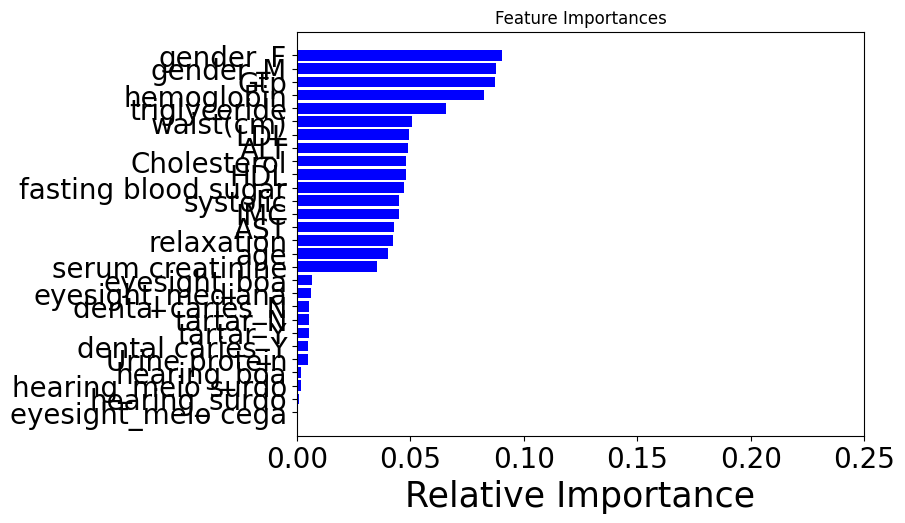

In [ ]:
importances = model.feature_importances_
attributes = X_train.columns[:len(X_train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

In [ ]:
importances_red = importances[importances > 0.05]
importances_red

array([0.05074077, 0.06560176, 0.08258513, 0.08740875, 0.09032594,
       0.08760234])

In [ ]:
X_test

age  waist(cm)  systolic  relaxation  fasting blood sugar  \
0      0.923077   0.534759     0.328    0.377358             0.410153   
1      0.153846   0.628342     0.456    0.405660             0.338769   
2      0.307692   0.401070     0.472    0.433962             0.319080   
3      0.230769   0.387701     0.648    0.566038             0.357662   
4      0.230769   0.561497     0.368    0.377358             0.430396   
...         ...        ...       ...         ...                  ...   
11134  0.307692   0.320856     0.248    0.264151             0.303749   
11135  0.384615   0.254011     0.176    0.207547             0.303749   
11136  0.538462   0.233957     0.304    0.301887             0.298525   
11137  0.615385   0.360963     0.432    0.339623             0.388993   
11138  0.538462   0.454545     0.360    0.330189             0.265892   

       Cholesterol  triglyceride       HDL       LDL  hemoglobin  ...  \
0         0.270358      0.113333  0.395833  0.056058     0.60000  ...   
1         0.511401      0.186667  0.375000  0.098855     0.66875  ...   
2         0.250814      0.442222  0.229167  0.058469     0.71875  ...   
3         0.527687      0.353333  0.340278  0.095841     0.65000  ...   
4         0.413681      0.215556  0.375000  0.078963     0.61250  ...   
...            ...           ...       ...       ...         ...  ...   
11134     0.413681      0.184444  0.493056  0.070524     0.46250  ...   
11135     0.260586      0.117778  0.479167  0.047016     0.56875  ...   
11136     0.234528      0.135556  0.520833  0.037372     0.46875  ...   
11137     0.403909      0.140000  0.305556  0.087402     0.59375  ...   
11138     0.413681      0.280000  0.208333  0.089813     0.63125  ...   

       dental caries_N  dental caries_Y  tartar_N  tartar_Y  hearing_boa  \
0                  1.0              0.0       1.0       0.0          1.0   
1                  1.0              0.0       1.0       0.0          1.0   
2                  1.0              0.0       1.0       0.0          1.0   
3                  1.0              0.0       1.0       0.0          1.0   
4                  1.0              0.0       1.0       0.0          1.0   
...                ...              ...       ...       ...          ...   
11134              0.0              1.0       0.0       1.0          1.0   
11135              1.0              0.0       0.0       1.0          1.0   
11136              1.0              0.0       1.0       0.0          1.0   
11137              1.0              0.0       1.0       0.0          1.0   
11138              1.0              0.0       0.0       1.0          1.0   

       hearing_meio surdo  hearing_surdo  eyesight_boa  eyesight_mediana  \
0                     0.0            0.0           1.0               0.0   
1                     0.0            0.0           0.0               1.0   
2                     0.0            0.0           0.0               1.0   
3                     0.0            0.0           1.0               0.0   
4                     0.0            0.0           0.0               1.0   
...                   ...            ...           ...               ...   
11134                 0.0            0.0           1.0               0.0   
11135                 0.0            0.0           0.0               1.0   
11136                 0.0            0.0           0.0               1.0   
11137                 0.0            0.0           1.0               0.0   
11138                 0.0            0.0           1.0               0.0   

       eyesight_meio cega  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
11134                 0.0  
11135                 0.0  
11136                 0.0  
11137                 0.0  
11138                 0.0  

[11139 rows x 28 columns]

In [ ]:
ns = importances_red.shape[0] #numero de atributos selecionados
print('Total maior que 0.05:', str(ns))
selected_attributes = []
for i in range(0,ns):
    selected_attributes.append(attributes_rank[::-1][i])
print('Selecionados:', selected_attributes)
data_train = df_train_modelo[selected_attributes]
data_train = data_train.to_numpy()
X_train = data_train

data_test = X_test[selected_attributes]
data_test = data_test.to_numpy()
X_test = data_test

Total maior que 0.05: 6
Selecionados: ['gender_F', 'gender_M', 'Gtp', 'hemoglobin', 'triglyceride', 'waist(cm)']


Melhor n: 73  AUC: 0.7000332704891503


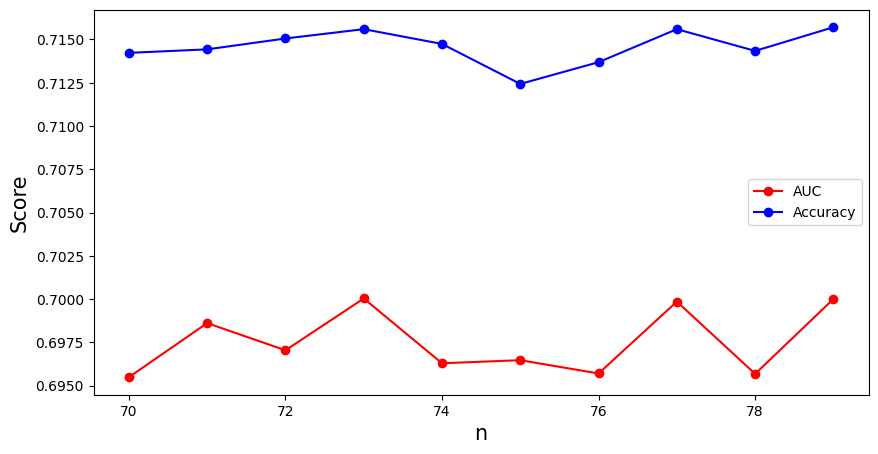

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(ini, fim):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X_train, Y_train):
        # select rows
        x_t, x_validation = X_train[train_index], X_train[test_index]
        y_t, y_validation = Y_train[train_index], Y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation)
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+ini
print('Melhor n:', best_n, ' AUC:',mauc[best_n-ini])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

# Predição

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
roc_auc_score(Y_test, y_pred)

0.6894940362415942

## Comparação entre alguns novos modelos

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
seed = 42
splits = 5
skf = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True)
np.random.seed(seed)

In [ ]:
def cross_val_score(estimator, cv = skf, label = ''):

    X = X_train.copy()
    y = y_train['smoking']
    #initiate prediction arrays and score lists
    val_predictions = np.zeros((len(X)))
    #train_predictions = np.zeros((len(sample)))
    train_scores, val_scores = [], []

    #training model, predicting prognosis probability, and evaluating metrics
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):

        model = clone(estimator)

        #define train set
        X_treino = X.iloc[train_idx].reset_index(drop = True)
        y_treino = y.iloc[train_idx].reset_index(drop = True)

        #define validation set
        X_val = X.iloc[val_idx].reset_index(drop = True)
        y_val = y.iloc[val_idx].reset_index(drop = True)


        model.fit(X_treino, y_treino)

        #make predictions
        train_preds = model.predict_proba(X_treino)[:, 1]
        val_preds = model.predict_proba(X_val)[:, 1]

        val_predictions[val_idx] += val_preds

        #evaluate model for a fold
        train_score = roc_auc_score(y_treino, train_preds)
        val_score = roc_auc_score(y_val, val_preds)

        #append model score for a fold to list
        train_scores.append(train_score)
        val_scores.append(val_score)

    print(f'Val Score: {np.mean(val_scores):.5f} ± {np.std(val_scores):.5f} | Train Score: {np.mean(train_scores):.5f} ± {np.std(train_scores):.5f} | {label}')

    return val_scores, val_predictions

In [ ]:
score_list, oof_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('log', LogisticRegression(random_state = seed, max_iter = 1000000, class_weight = 'balanced')),
    ('lda', LinearDiscriminantAnalysis()),
    ('gnb', GaussianNB()),
    ('bnb', BernoulliNB()),
    ('rf', RandomForestClassifier(random_state = seed)),
    ('et', ExtraTreesClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed)),
    ('lgb', LGBMClassifier(random_state = seed)),
    ('dart', LGBMClassifier(random_state = seed, boosting_type = 'dart')),
    ('cb', CatBoostClassifier(random_state = seed, verbose = 0)),
    ('gb', GradientBoostingClassifier(random_state = seed)),
    ('hgb', HistGradientBoostingClassifier(random_state = seed)),
    ('knn', KNeighborsClassifier(n_neighbors=78)),
]

for (label, model) in models:
    score_list[label], oof_list[label] = cross_val_score(make_pipeline(model),label = label)

Val Score: 0.83595 ± 0.00319 | Train Score: 0.83639 ± 0.00084 | log
Val Score: 0.83631 ± 0.00331 | Train Score: 0.83680 ± 0.00088 | lda
Val Score: 0.79850 ± 0.00434 | Train Score: 0.79915 ± 0.00044 | gnb
Val Score: 0.78162 ± 0.00534 | Train Score: 0.78175 ± 0.00134 | bnb
Val Score: 0.83580 ± 0.00133 | Train Score: 1.00000 ± 0.00000 | rf
Val Score: 0.83160 ± 0.00155 | Train Score: 1.00000 ± 0.00000 | et
Val Score: 0.83451 ± 0.00277 | Train Score: 0.93921 ± 0.00169 | xgb
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13082, number of negative: 22560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2452
[LightGBM] [Info] Number of data points in the train set: 35642, number of used features: 28
[LightGBM] [Info] [bin

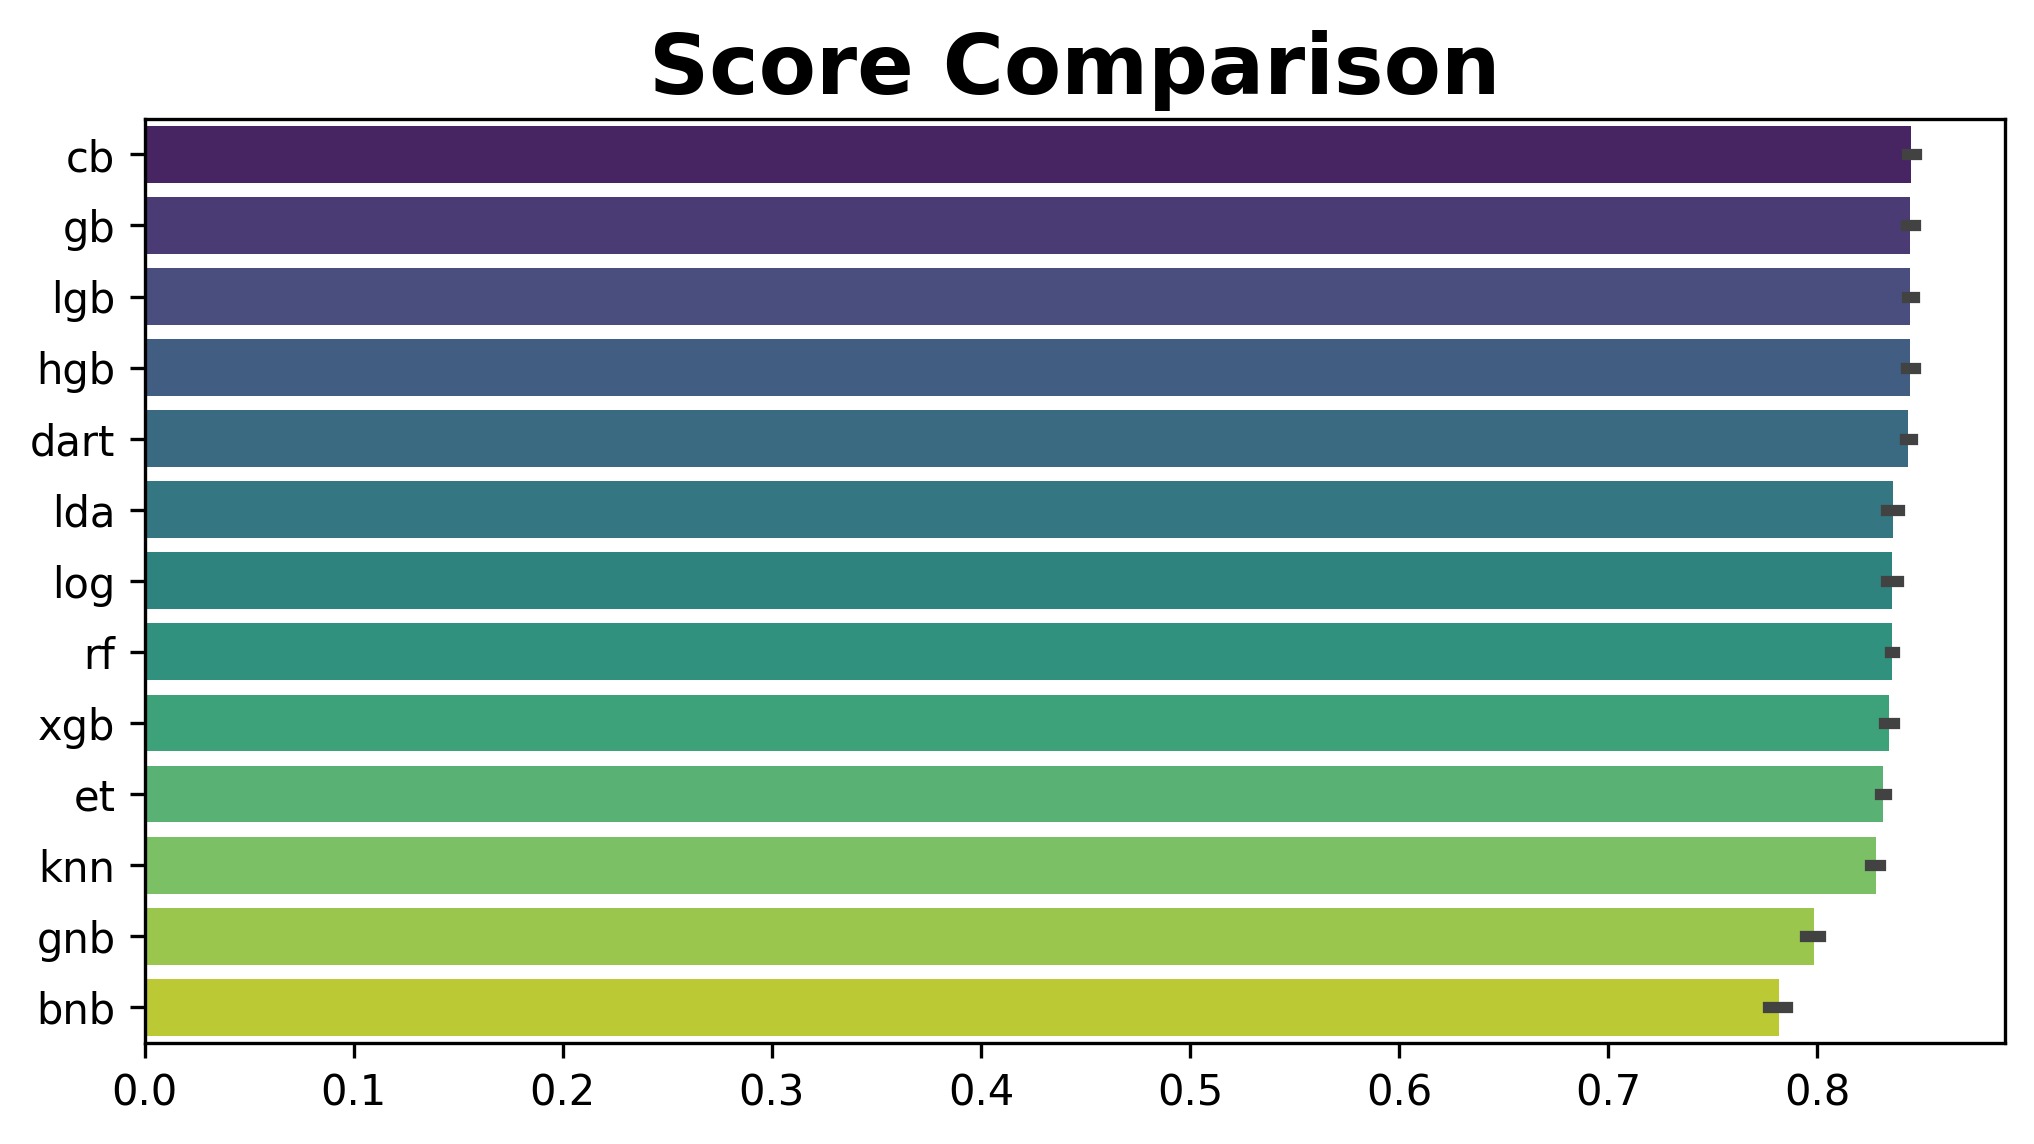

In [ ]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = score_list.reindex((-1 * score_list).mean().sort_values().index, axis = 1), palette = 'viridis', orient = 'h')
plt.title('Score Comparison', weight = 'bold', size = 20)
plt.show()

# Resultados e conclusões

## Baseline

Primeiro, cosntruímos uma baseline, sem nenhuma preparação nos dados a não ser transformar categóricos em númericos e normalizar os dados. Boa parte da baseline foi construida com o auxilio do exemlo do titanic dispoibilizado pelo professor

Resultados:

  <ol>
    <li>knn</li>
      <ul>
        <li>Onehot encoding</li>
          <dt>
            <dd>- Tempo de treino 33min 9s(750fits)</dd>
            <dd>- Treino best fit {'metric': 'euclidean', 'n_neighbors': 49}</dd>
            <dd>- Roc no treino 0.8333168402482014</dd>
            <dd>- Roc no teste 0.7509188842119294</dd>
          </dt>
        <li>Encoder</li>
          <dt>
            <dd>- Tempo de treino 31m 16s(750fits)</dd>
            <dd>- Treino best fit {'metric': 'euclidean', 'n_neighbors': 49}</dd>
            <dd>- Roc no treino 0.8332989509938128</dd>
            <dd>- Roc no teste 0.7507970221597724</dd>
          </dt>
      </ul>
    <li>Naive Bayes</li>
      <ul>
        <li>Onehot encoding</li>
          <dt>
            <dd>- Tempo de treino 2s(80fits)</dd>
            <dd>- Treino best fit {'var_smoothing': 0.001}</dd>
            <dd>- Roc no treino 0.7957779525069928</dd>
            <dd>- Roc no teste 0.7134436705653748</dd>
          </dt>
        <li>Encoder</li>
          <dt>
            <dd>- Tempo de treino 2s(80fits)</dd>
            <dd>- Treino best fit {'var_smoothing': 0.001}</dd>
            <dd>- Roc no treino 0.7925359043700202</dd>
            <dd>- Roc no teste 0.0.6873868584628035</dd>
          </dt>
      </ul>
    <li>Decision tree</li>
    <ul>
        <li>Onehot encoding</li>
          <ul type 'square'>
            <li>Todas as features</li>
              <dt>
                <dd>- Tempo de treino 19min 42s </dd>
                <dd>- Treino best fit n: 68</dd>
                <dd>- Roc no treino 0.7460885264912628 </dd>
                <dd>- Roc no teste 0.7403566172757021</dd>
              </dt>
            <li>Apenas as 5 melhores</li>
              <dt>
                <dd>- Tempo de treino 8min 47s</dd>
                <dd>- Treino best fit 69</dd>
                <dd>- Roc no treino 0.6828178632257174</dd>
                <dd>- Roc no teste 0.7081547431911397</dd>
              </dt>
          </ul>
        <li>Encoder</li>
          <ul type 'square'>
            <li>Todas as features</li>
              <dt>
                <dd>- Tempo de treino 15min 46s </dd>
                <dd>- Treino best fit n: 69</dd>
                <dd>- Roc no treino 0.7431850733214335 </dd>
                <dd>- Roc no teste 0.7433321054755897</dd>
              </dt>
            <li>Apenas as 5 melhores</li>
              <dt>
                <dd>- Tempo de treino 9min 6s</dd>
                <dd>- Treino best fit 69</dd>
                <dd>- Roc no treino 0.6931751008459857</dd>
                <dd>- Roc no teste 0.7075446015803686</dd>
              </dt>
          </ul>
      </ul>
  </ol>



## Primeira mudança

Fizemos uma análsie elaborada dos dados, juntando algumas features em features novas. Entre elas temos:

*   heigth(cm) e 	weight(kg) apra formar IMC
*   heigth(cm) e 	weight(kg) e	waist(cm) para formar IAC
*   systolic e relaxation apra formar IP
*   hearing(left) e	hearing(right) para formar hearing
*   eyesight(left) e	eyesight(right) para formar eyesight

Tambem encontramos features com comprtamenteo exponencial e aplicamos uma transformação logarítimica para amortizá-las


['fasting blood sugar', 'AST', 'ALT', 'Gtp'] foram amortizadas

Além disso, tornamos a feature dental caries de numerica para catégorica.

Por fim, adotamos só o label encoder por ter se demonstrado constantemente superior ao label encoder na baseline

Um exemplo de como ficou o dataset

In [ ]:
df_train_transformed

Detalhe que separamos IAC DE IMC pois ambos atuavam sob mesmas features, (altura,peso) e (altura,peso,cintura) respcetivamente


Resultados:

  <ol>
    <li>knn</li>
      <ul>
        <li>usando IMC ao inves de IAC</li>
          <dt>
            <dd>- Tempo de treino 2min(80fits)</dd>
            <dd>- Treino best fit {'metric': 'euclidean', 'n_neighbors': 63}</dd>
            <dd>- Roc no treino 0.8439320802769551</dd>
            <dd>- Roc no teste 0.7396032236704185</dd>
          </dt>
        <li>Usando IAC</li>
          <dt>
            <dd>- Tempo de treino 2m (80fits)</dd>
            <dd>- Treino best fit {'metric': 'euclidean', 'n_neighbors': 78}</dd>
            <dd>- Roc no treino 0.8418387501838043</dd>
            <dd>- Roc no teste 0.7336317059980655</dd>
          </dt>
      </ul>
    <li>Naive Bayes</li>
      <ul>
        <li>usando IMC ao inves de IAC</li>
          <dt>
            <dd>- Tempo de treino 2s(80fits)</dd>
            <dd>- Treino best fit {'var_smoothing': 0.001}</dd>
            <dd>- Roc no treino 0.8024773291893788</dd>
            <dd>- Roc no teste 0.6900472823376786
</dd>
          </dt>
        <li>Usando IAC</li>
          <dt>
            <dd>- Tempo de treino 2s(80fits)</dd>
            <dd>- Treino best fit {'var_smoothing': 0.001}</dd>
            <dd>- Roc no treino 0.8062304446671644</dd>
            <dd>- Roc no teste 0.6909994205490596</dd>
          </dt>
      </ul>
    <li>Decision tree</li>
    <ul>
        <li>usando IMC ao inves de IAC</li>
          <ul type 'square'>
            <li>Todas as features</li>
              <dt>
                <dd>- Tempo de treino 15min</dd>
                <dd>- Treino best fit n: 71</dd>
                <dd>- Roc no treino 0.7443451170633086</dd>
                <dd>- Roc no teste 0.7053927560596062
</dd>
              </dt>
            <li>Apenas as 7 melhores</li>
              <dt>
                <dd>- Tempo de treino 8min</dd>
                <dd>- Treino best fit 73</dd>
                <dd>- Roc no treino 0.7084490276833154</dd>
                <dd>- Roc no teste 0.0.7014007173441915</dd>
              </dt>
          </ul>
        <li>Usando IAC</li>
          <ul type 'square'>
            <li>Todas as features</li>
              <dt>
                <dd>- Tempo de treino 12min 46s </dd>
                <dd>- Treino best fit n: 77</dd>
                <dd>- Roc no treino 0.7420982729768777 </dd>
                <dd>- Roc no teste 0.7299136663822988</dd>
              </dt>
            <li>Apenas as 12 melhores</li>
              <dt>
                <dd>- Tempo de treino 9min 6s</dd>
                <dd>- Treino best fit 79</dd>
                <dd>- Roc no treino 0.7261022963215271</dd>
                <dd>- Roc no teste 0.700112696418558</dd>
              </dt>
          </ul>
      </ul>
  </ol>


No fim, também decidimos testar mais alguns modelos para ver o desempenho deles no geral e tentar escolher mais alguns para a próxima mudança, aqui está o gráfico do desempenho deles(P.S:tanto com IMC quanto com IAC foi parecido o resultado)

    ('log', LogisticRegression(random_state = seed, max_iter = 1000000, class_weight = 'balanced')),
    ('lda', LinearDiscriminantAnalysis()),
    ('gnb', GaussianNB()),
    ('bnb', BernoulliNB()),
    ('rf', RandomForestClassifier(random_state = seed)),
    ('et', ExtraTreesClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed)),
    ('lgb', LGBMClassifier(random_state = seed)),
    ('dart', LGBMClassifier(random_state = seed, boosting_type = 'dart')),
    ('cb', CatBoostClassifier(random_state = seed, verbose = 0)),
    ('gb', GradientBoostingClassifier(random_state = seed)),
    ('hgb', HistGradientBoostingClassifier(random_state = seed)),
    ('knn', KNeighborsClassifier(n_neighbors=78)),

In [ ]:
score_list

log       lda       gnb       bnb        rf        et       xgb  \
0  0.837523  0.838505  0.800874  0.782906  0.836647  0.831906  0.833500   
1  0.837918  0.838077  0.799759  0.781123  0.837861  0.832180  0.837615   
2  0.831163  0.831157  0.798624  0.787573  0.834596  0.832296  0.834261   
3  0.839803  0.840038  0.802930  0.784661  0.835637  0.833033  0.837192   
4  0.833322  0.833783  0.790288  0.771829  0.834250  0.828601  0.829993   

        lgb      dart        cb        gb       hgb       knn  
0  0.846159  0.845418  0.843704  0.844831  0.846284  0.828020  
1  0.847090  0.846425  0.849580  0.848924  0.847737  0.829768  
2  0.842666  0.842217  0.842752  0.842327  0.843948  0.829270  
3  0.844162  0.843293  0.845578  0.844850  0.843242  0.830699  
4  0.842377  0.840942  0.842374  0.841632  0.840975  0.822816

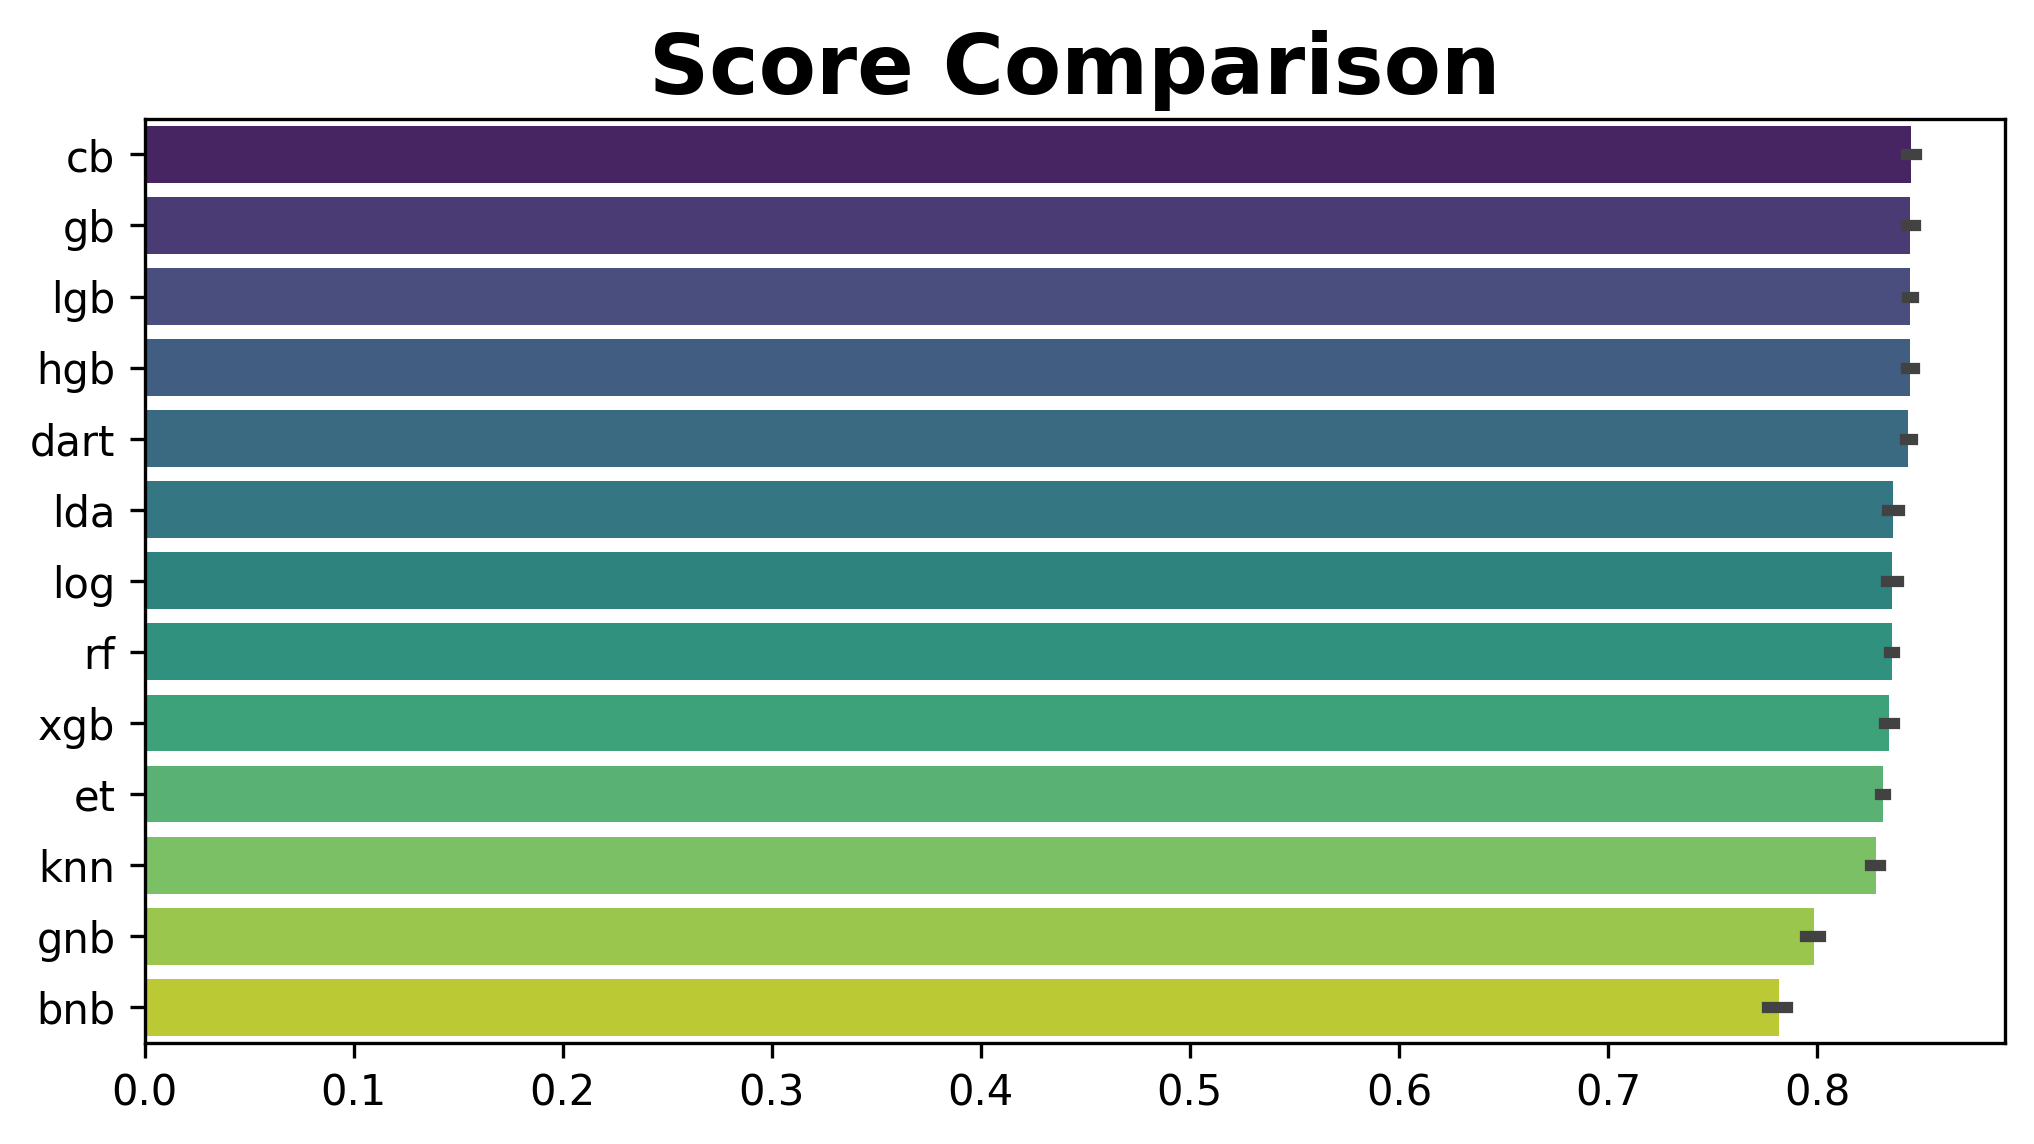

In [ ]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = score_list.reindex((-1 * score_list).mean().sort_values().index, axis = 1), palette = 'viridis', orient = 'h')
plt.title('Score Comparison', weight = 'bold', size = 20)
plt.show()

## Segunda mudança

Aplicamos o PCA para analisar as mudanças de features que fizemos e avaliamos os resultados dos modelos com base nas features que o PCA apontava como significantes.

No fim, concluímos que a mudança em relação ao IAC e em relação ao IP piorou a representação dos dados, enquanto as demais mudanças (IMC, EYESIGHT, HEARING) acarrentaram em ganho de significado em relação às antigas features. Desse modo, mantivemos as mudanças.
No fim, não houve grandes mudanças no resultado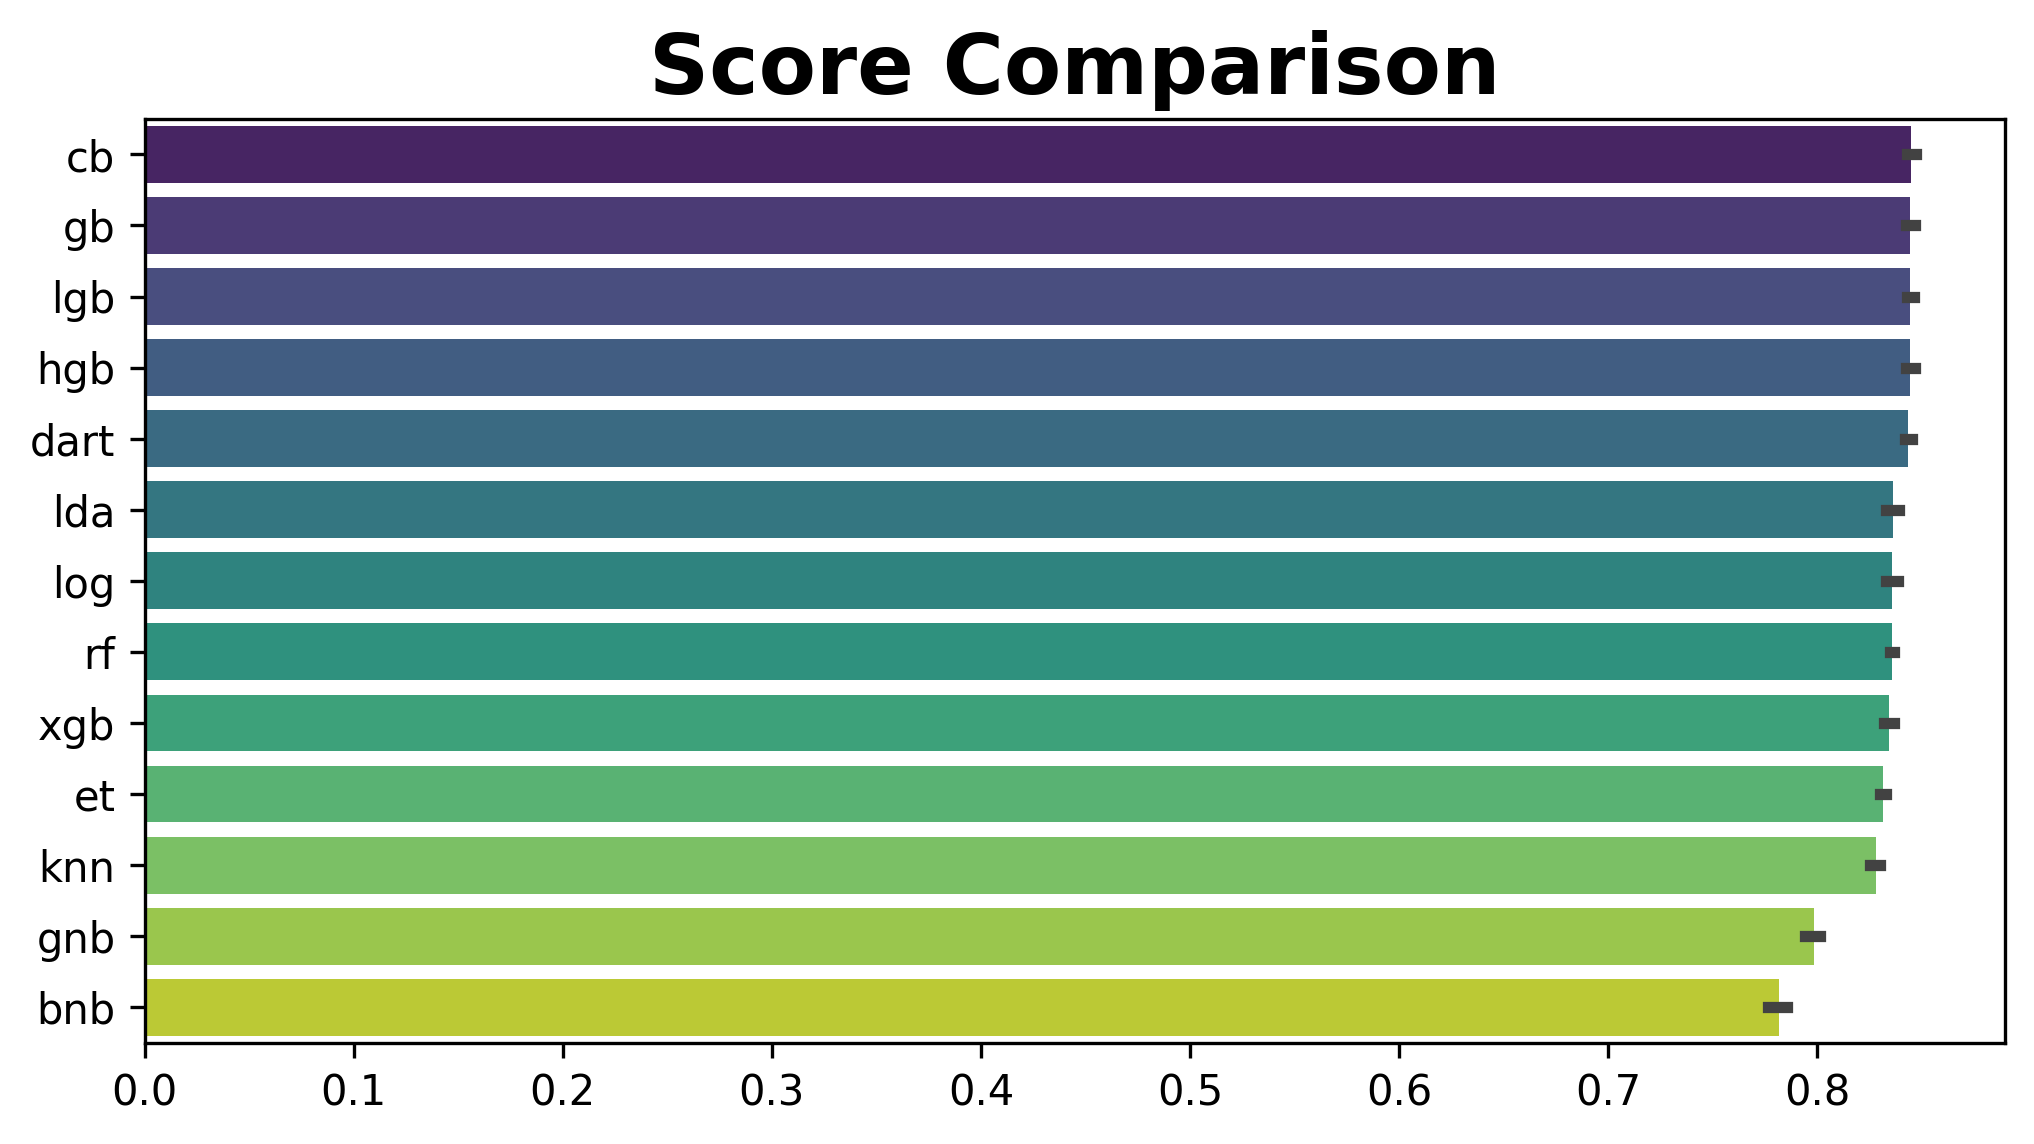

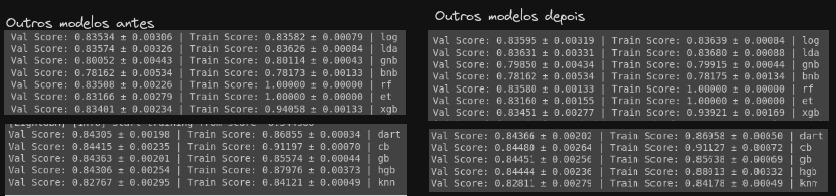